In [ ]:
from pandas import DataFrame

df = DataFrame({"test": [1,2.1231,3], "test2": [2,3,4.12312]})
df.applymap(lambda x: round(x, 3))

In [8]:
from cobra.io import read_sbml_model
read_sbml_model("D:/Users/Andrew Freiburger/Documents/Argonne/Dissemination/Publication/cheng_collab/AGORA2_annotatedSBML_all/Acinetobacter_pittii_ANC_4050.xml")

# systematically correct the polymeric formula
# from glob import glob
# import re
# for model in glob(r""):
#     # TODO - load the file as a string
#     model_str = 
#     polymer_formula = re.search(r"(\(C\d.+\)n?)", model_str)
#     if polymer_formula is None:  continue

Name,M_Acinetobacter_pittii_ANC_4050
Memory address,176ac216fa0
Number of metabolites,1888
Number of reactions,1944
Number of genes,1157
Number of groups,108
Objective expression,1.0*bio1 - 1.0*bio1_reverse_b18f7
Compartments,"Cytoplasm, Extracellular, Periplasm"


In [16]:
from pandas import read_csv

bad_models_df = read_csv("D:/Users/Andrew Freiburger/Documents/Argonne/Dissemination/Publication/cheng_collab/bad_AGORA2_models.txt", sep="\t\t")
print(bad_models.columns)
bad_models = list(bad_models["model"].unique())
print(bad_models)

bad_models_df

Index(['model', 'error'], dtype='object')
['Acinetobacter_pittii_ANC_4050.xml ', 'Aeromicrobium_massiliense_JC14.xml ', 'Alistipes_senegalensis_JC50.xml ', 'Alistipes_shahii_WAL_8301.xml ', 'Anaerococcus_tetradius_ATCC_35098.xml ', 'Anaerotruncus_sp_G3_2012.xml ', 'Bacillus_cereus_03BB102.xml ', 'Bacillus_cereus_03BB108.xml ', 'Bacillus_cereus_172560W.xml ', 'Bacillus_cereus_95.xml ', 'Bacillus_cereus_AH1134.xml ', 'Bacillus_cereus_AH1271.xml ', 'Bacillus_cereus_AH1272.xml ', 'Bacillus_cereus_AH676.xml ', 'Bacillus_cereus_AH820.xml ', 'Bacillus_cereus_AND1407.xml ', 'Bacillus_cereus_ATCC_10876.xml ', 'Bacillus_cereus_ATCC_10987.xml ', 'Bacillus_cereus_ATCC_14579.xml ', 'Bacillus_cereus_ATCC_4342.xml ', 'Bacillus_cereus_B4264.xml ', 'Bacillus_cereus_B5_2.xml ', 'Bacillus_cereus_BAG1O_1.xml ', 'Bacillus_cereus_BAG1O_3.xml ', 'Bacillus_cereus_BAG1X1_1.xml ', 'Bacillus_cereus_BAG1X1_2.xml ', 'Bacillus_cereus_BAG1X1_3.xml ', 'Bacillus_cereus_BAG1X2_1.xml ', 'Bacillus_cereus_BAG1X2_2.xml ', 

C:\Users\Andrew Freiburger\AppData\Local\Temp\ipykernel_10040\3116481987.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  bad_models_df = read_csv("D:/Users/Andrew Freiburger/Documents/Argonne/Dissemination/Publication/cheng_collab/bad_AGORA2_models.txt", sep="\t\t")


,model,error
0,Acinetobacter_pittii_ANC_4050.xml,"(None, {'SBML_FATAL': [], 'SBML_ERROR': ['E0 ..."
1,Aeromicrobium_massiliense_JC14.xml,"(None, {'SBML_FATAL': [], 'SBML_ERROR': ['E0 ..."
2,Alistipes_senegalensis_JC50.xml,"(None, {'SBML_FATAL': [], 'SBML_ERROR': ['E0 ..."
3,Alistipes_shahii_WAL_8301.xml,"(None, {'SBML_FATAL': [], 'SBML_ERROR': ['E0 ..."
4,Anaerococcus_tetradius_ATCC_35098.xml,"(None, {'SBML_FATAL': [], 'SBML_ERROR': ['E0 ..."
...,...,...
1741,Sulfolobus_solfataricus_P2.xml,"(None, {'SBML_FATAL': [], 'SBML_ERROR': ['E0 ..."
1742,Sutterella_wadsworthensis_HGA0223.xml,"(None, {'SBML_FATAL': [], 'SBML_ERROR': ['E0 ..."
1743,Syntrophus_aciditrophicus_SB.xml,"(None, {'SBML_FATAL': [], 'SBML_ERROR': ['E0 ..."
1744,Tannerella_sp_6_1_58FAA_CT1.xml,"(None, {'SBML_FATAL': [], 'SBML_ERROR': ['E0 ..."


In [20]:
def assign_values(param, var, next_dimension):
    dic = {var: {}}
    for dim1, dim2_list in next_dimension.items():
        if isinstance(dim2_list, dict):  print("1");dic[var].update(assign_values(param, dim1, dim2_list))
        elif isinstance(dim2_list, list):  print("2");dic[var][dim1] = {dim2: param for dim2 in dim2_list}
    return dic

time_ranges = list(range(5))
next_dimension = {}
for organism in ["ecoli_Maltose", "ecoli_Acetate", "ecoli_Stationary", "pf_Acetate", "pf_4HB", "pf_Stationary"]:
    species, pheno = organism.split("_")
    if species in next_dimension:  next_dimension[species].update({pheno: time_ranges})
    else:  next_dimension[species] = {pheno: time_ranges}

assign_values(0.33, "kcat", next_dimension)

1
2
2
2
1
2
2
2


{'kcat': {'ecoli': {'Maltose': {0: 0.33, 1: 0.33, 2: 0.33, 3: 0.33, 4: 0.33},
   'Acetate': {0: 0.33, 1: 0.33, 2: 0.33, 3: 0.33, 4: 0.33},
   'Stationary': {0: 0.33, 1: 0.33, 2: 0.33, 3: 0.33, 4: 0.33}},
  'pf': {'Acetate': {0: 0.33, 1: 0.33, 2: 0.33, 3: 0.33, 4: 0.33},
   '4HB': {0: 0.33, 1: 0.33, 2: 0.33, 3: 0.33, 4: 0.33},
   'Stationary': {0: 0.33, 1: 0.33, 2: 0.33, 3: 0.33, 4: 0.33}}}}

In [4]:
from numpy import array, mean

twoD = array([[1,2,13], [2,3,14], [3,4,15]])
mean(twoD, axis=0)

array([ 2.,  3., 14.])

In [2]:
assert None or False, "either must be provided"

AssertionError: either must be provided

In [16]:
for x in map(int, ["2", "3", '4']):
    print(x)

2
3
4


In [24]:
# from cobra.io import load_model
# model = load_model("iJO1366")

print(dir(model))
print(model._contexts)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_annotation', '_compartments', '_contexts', '_id', '_populate_solver', '_repr_html_', '_sbml', '_set_id_with_model', '_solver', '_tolerance', 'add_boundary', 'add_cons_vars', 'add_groups', 'add_metabolites', 'add_reactions', 'annotation', 'boundary', 'compartments', 'constraints', 'copy', 'demands', 'exchanges', 'genes', 'get_associated_groups', 'groups', 'id', 'medium', 'merge', 'metabolites', 'name', 'notes', 'objective', 'objective_direction', 'optimize', 'problem', 'reactions', 'remove_cons_vars', 'remove_groups', 'remove_metabolites', 'remove_reactions', 'repair', 'sinks', 'slim_optimi

In [37]:
# from cobra.io import load_model
# model = load_model("iJO1366")
# from optlang.symbolics import Zero
# from optlang import Constraint
# print(model.objective.expression)
# print(dir(model.objective.expression))
# cons = Constraint(model.objective.expression, lb=10)
# print(cons.expression, cons.ub, cons.name)

sol = model.optimize()
print(sol.objective_value)

0.9823718127269748


In [42]:
# from mdoelseedpy import MSModelUtil
%run ../../../ModelSEED/ModelSEEDpy/modelseedpy/core/msmodelutl.py

msutil = MSModelUtil(model)
msutil.costless_excreta()

0.9823718127269785
0.9823718127269868


['EX_co2_e', 'EX_h_e', 'EX_h2o_e', 'EX_meoh_e']

In [11]:
test_func([10, 10])

100

In [5]:
import concurrent.futures as cf
from multiprocess import Pool, Process, Queue

def test_func(queue, *args):
    param1, param2 = args
    print(param1)
    queue.put(param1*param2)

# Pool().map(calculate_scores, [{k: v} for k,v in pairs.items()])
pool_size = 5 # os.cpu_count()

args = [[10, 20], [11, 21], [12, 22], [13, 23], [14, 24]]

processes, results = [], []
q = Queue()
for jobNum in range(pool_size):
    print(jobNum)
    process = Process(target=test_func, args=[q, args[jobNum][0], args[jobNum][1]])
    process.start()
    processes.append(process)
for process in processes:
    results.append(q.get())
for process in processes:
    process.join()

print(results)
# with cf.ProcessPoolExecutor(max_workers=5) as executor:
#     results = executor.map(test_func, [10, 10, 10, 10])
#     # results = [executor.submit(calculate_scores, )]
#     print(list(results))
#     for result in cf.as_completed(results):
#         print(result.result())

0
1
2
3
4
[200, 264, 231, 299, 336]


In [1]:
import multiprocessing
import multiprocess

def func(num):
    lst = []
    for x in range(64):
        for y in range(64):
            lst.append(num**3)
    return lst


In [2]:
%%time
pool = multiprocess.Pool()
output = pool.map(func, range(0, 50))
print(output[0])

Exception in thread Thread-5:
Traceback (most recent call last):
  File "C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\multiprocess\pool.py", line 519, in _handle_workers
    cls._wait_for_updates(current_sentinels, change_notifier)
  File "C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\multiprocess\pool.py", line 499, in _wait_for_updates
    wait(sentinels, timeout=timeout)
  File "C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\multiprocess\connection.py", line 887, in wait
    ready_handles = _exhaustive_wait(waithandle_to_obj.keys(), timeout)
  File "C:\Users\Andrew Freiburger\AppDat

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [2]:
%%time
pool = multiprocessing.Pool()
# output = pool.map(cube, range(0, 100000))
# print(output)

CPU times: total: 0 ns
Wall time: 244 ms


Exception in thread Thread-5:
Traceback (most recent call last):
  File "C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\multiprocessing\pool.py", line 519, in _handle_workers
    cls._wait_for_updates(current_sentinels, change_notifier)
  File "C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\multiprocessing\pool.py", line 499, in _wait_for_updates
    wait(sentinels, timeout=timeout)
  File "C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\multiprocessing\connection.py", line 884, in wait
    ready_handles = _exhaustive_wait(waithandle_to_obj.keys(), timeout)
  File "C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\

In [ ]:
with multiprocessing.get_context("spawn").Pool() as pool:
    multiprocessing.set_start_method('fork')
    output = pool.map(cube, range(0, 100000))
    print(output)

Exception in thread Thread-5:
Traceback (most recent call last):
  File "C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\multiprocessing\pool.py", line 519, in _handle_workers
    cls._wait_for_updates(current_sentinels, change_notifier)
  File "C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\multiprocessing\pool.py", line 499, in _wait_for_updates
    wait(sentinels, timeout=timeout)
  File "C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\multiprocessing\connection.py", line 884, in wait
    ready_handles = _exhaustive_wait(waithandle_to_obj.keys(), timeout)
  File "C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\

In [3]:
%%time

output_standard = list(map(func, range(0, 50)))
print(len(output_standard))

50
CPU times: total: 2.42 s
Wall time: 2.61 s


In [ ]:
def calculate_sum(numbers):
    return sum(numbers)
if __name__ == '__main__':
    numbers_list = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]
    # create a pool of worker processes
    pool = multiprocessing.Pool(5)
    # use the pool to parallelize the calculation of sums
    results = pool.map(calculate_sum, numbers_list)
    # close the pool of worker processes
    pool.close()
    # print the results
    print("The sum of each sublist is:", results)

In [39]:
from itertools import combinations
from numpy import sort

ary = array(list(combinations([3,2,1], 2)))
print(ary)
sorted_ary = sort(ary, axis=1)
print(sorted_ary)

[[3 2]
 [3 1]
 [2 1]]
[[2 3]
 [1 3]
 [1 2]]


In [27]:
from numpy import array, where, unique
ary = array([[1,2], [2,3], [3,4], [4,5], [2,6]])

pairs = {first: ary[where(ary[:,0] == first)][:, 1] for first in unique(ary[:,0])}
print(pairs)

{1: array([2]), 2: array([3, 6]), 3: array([4]), 4: array([5])}


In [4]:
test1 = [1,2,3]
test2 = [2,3,4]

test3 = [*test1, *test2]
print(test3)

[1, 2, 3, 2, 3, 4]


In [12]:
from cobra.io import load_model
model = load_model("iJO1366")
from collections import Counter

def counted_components(*ele_dics):
    ele_dic = {}
    for dic in ele_dics:
        # print(dic, ele_dics)
        for ele, count in dic.items():
            if not isinstance(ele, str):  ele = ele.id
            if ele in ele_dic:  ele_dic[ele] += abs(count)
            else:  ele_dic[ele] = abs(count)
    return dict(sorted(ele_dic.items(), key=lambda x: x[1], reverse=True))

# %time print(Counter([ele*count for rxn in model.reactions for met in rxn.metabolites for ele, count in met.elements.items()]))
# %time print(combine_elements(*[met.elements for rxn in model.reactions for met in rxn.metabolites]))
%time counted_metabolites = counted_components(*[rxn.metabolites for rxn in model.reactions])
print(sorted_counted_metabolites)

CPU times: total: 15.6 ms
Wall time: 8 ms
{'h_c': 1380.9, 'h2o_c': 703.354443, 'atp_c': 470.244806, 'pi_c': 422.891536, 'adp_c': 388.9, 'h_p': 362.0, 'h2o_p': 178.0, 'ppi_c': 155.523734, 'nad_c': 129.00361800000002, 'nadh_c': 123.000045, 'nadp_c': 101.000559, 'nadph_c': 99.000335, 'amp_c': 96.0, 'co2_c': 86.0, 'coa_c': 71.000744, 'pyr_c': 63.0, 'pi_p': 61.0, 'ACP_c': 61.0, 'nh4_c': 56.025392, 'fe2_c': 55.013103, 'glu__L_c': 48.518872, 'o2_c': 41.5, 'glyc3p_c': 41.0, 'accoa_c': 37.000279, 'cmp_c': 31.0, 'pep_c': 28.0, 'succ_c': 28.0, 'amet_c': 26.000446, 'fad_c': 26.000446, 'mql8_c': 26.000223, 'q8h2_c': 25.000223, 'fadh2_c': 25.0, 'mqn8_c': 25.0, 'akg_c': 24.0, 'q8_c': 24.0, 'gtp_c': 23.424217, 'gthrd_c': 23.000223, 'asp__L_c': 22.475287, 'ser__L_c': 21.425476, 'glc__D_c': 20.0, 'ahcys_c': 18.0, 'met__L_c': 17.303022, 'malACP_c': 17.0, 'h2o2_c': 17.0, 'na1_p': 17.0, 'fum_c': 17.0, 'ipdp_c': 17.0, 'ctp_c': 16.263307, 'ala__L_c': 16.012838000000002, 'ac_c': 16.0, 'udp_c': 16.0, 'na1_c': 

In [59]:
from optlang import Model
from json import load, dump
with open("../../../ModelSEED/ModelSEEDDatabase/correct_MSDB.json") as jsonIn:
    model = load(jsonIn)
    
optlang_model = Model.from_json(model)
proposed_changes = {}
for rxn in optlang_model.reactions:
    for met in rxn.metabolites:
        for ele in met.elements:
            varName = f"{rxn.id}_{met.id}~{ele}"
            original_stoich = met.elements[ele]
            proposed_stoich = optlang_model.primal_values[varName]
            if original_stoich == proposed_stoich:  continue
            proposed_changes[varName] = {"Original": original_stoich, "Proposed": proposed_stoich}
print(proposed_changes)
with open("proposed_changes.json", "w") as out:
    dump(proposed_changes, out, indent=3)
# print([index for index, val in enumerate(primals.values()) if val != 0])

AttributeError: 'Model' object has no attribute 'reactions'

In [58]:
from pandas import DataFrame
DataFrame({"test": {"test12": 12, "test13": 13}}).T

,test12,test13
test,12,13


In [56]:
tuple(sorted((-1,-4)))

(-4, -1)

In [54]:
from jupyterlab_h5web import H5Web

H5Web('test.h5')

<jupyterlab_h5web.widget.H5Web object>

In [49]:
from json import load

with open("C:\\Users\\Andrew Freiburger\\Documents\\Argonne\\ModelSEED\\ModelSEEDDatabase\\MSDB_justification_primals.json") as jsonIn:
    msdb_primals = load(jsonIn)

In [50]:
print(any(x != 0 for x in msdb_primals.values()))

False


In [48]:
str1 = "string1"
str2 = "string2"
print("diff:\t", set(str1).symmetric_difference(set(str2)))

diff:	 {'1', '2'}


In [47]:
from pandas import DataFrame

dic = {'ecoli': {'Acetate': 0.00061875, 'Maltose': 0.18562499999999998},
 'pf': {'4~Hydroxybenzoate': 266.40358593749994, 'Acetate': 0.2784375}}

df = DataFrame(dic).T.to_csv("transpose_test.csv")
display(df)

None

In [13]:
from modelseedpy.biochem import from_local

msdb = from_local("../../../ModelSEED/ModelSEEDDatabase")
# print(len(msdb.reactions))

msdb_ele_counted = counted_components(*[met.elements for rxn in msdb.reactions for met in rxn.metabolites])
msdb_mets_counted = counted_components(*[rxn.metabolites for rxn in msdb.reactions])

In [14]:
print(msdb_ele_counted)
print(msdb_mets_counted)

{'H': 3949717, 'C': 2601523, 'O': 1392274, 'N': 389061, 'P': 151526, 'R': 41790, 'S': 29428, 'Fe': 3896, 'Cl': 2493, 'I': 545, 'Co': 453, 'Mg': 445, 'Br': 344, 'Se': 263, 'Na': 241, 'F': 174, 'As': 118, 'X': 104, 'Cu': 93, 'Ca': 82, 'Ni': 66, 'K': 41, 'Mo': 36, 'Mn': 35, 'Zn': 29, 'Hg': 28, 'Cd': 22, 'Cr': 18, 'M': 15, 'Y': 15, 'W': 8, 'B': 8, 'Te': 7, 'Ag': 6, 'Pb': 6, 'U': 4, 'Li': 4, 'Sb': 3, 'Al': 2}
{'cpd00067_0': 79512.44, 'cpd00001_0': 42200.99, 'cpd00009_0': 26230.670000000002, 'cpd00031_0': 20331.66, 'cpd00038_0': 20168.410600000003, 'cpd00046_0': 10448, 'cpd00402_0': 10078, 'cpd00002_0': 8291.906599999998, 'cpd00014_0': 7416.93, 'cpd00007_0': 6482.5, 'cpd00005_0': 6277, 'cpd00006_0': 6275.139999999999, 'cpd00012_0': 5574.0409, 'cpd00008_0': 5104.67, 'cpd00011_0': 4092, 'cpd00018_0': 4081.2, 'cpd00010_0': 4000.16, 'cpd00003_0': 3746.64, 'cpd00004_0': 3681.5, 'cpd00026_0': 3513.17, 'cpd00117_0': 2871.88, 'cpd00037_0': 2839, 'cpd00067_1': 1886.8999999999999, 'cpd00089_0': 1664, 

In [5]:
ary = [[{0.1635970599062918: 0.0631234245552831, 0.3271941198125836: 0.060512895435943785, 0.4907911797188754: 0.06110615947657651, 0.6543882396251672: 0.06234543274393639, 0.817985299531459: 0.06441797337008535, 0.9815823594377509: 0.0632306566869591, 1.1451794193440428: 0.06766158775949283, 1.3087764792503345: 0.0696745756541103, 1.4723735391566262: 0.06892852664847265, 1.635970599062918: 0.07171649498392832, 1.79956765896921: 0.07595243253760847, 1.9631647188755017: 0.07855506298020422, 2.1267617787817934: 0.07916312438159541, 2.2903588386880855: 0.07960236042828701, 2.4539558985943772: 0.0843626055619774, 2.617552958500669: 0.08711241847866952, 2.7811500184069606: 0.08778958697249944, 2.9447470783132523: 0.09036742898774398, 3.1083441382195445: 0.09303953360871713, 3.271941198125836: 0.09442182862093418, 3.435538258032128: 0.09697753915153391, 3.59913531793842: 0.09816527481895546, 3.7627323778447117: 0.10256367068502414, 3.9263294377510034: 0.10615643443439775, 4.089926497657295: 0.1096774404776945, 4.253523557563587: 0.11178806310541928, 4.4171206174698785: 0.11623115738065011, 4.580717677376171: 0.1213844920611339, 4.744314737282463: 0.12547223702147983, 4.9079117971887545: 0.131225536959693, 5.071508857095046: 0.13612335957402927, 5.235105917001338: 0.14102199484068462, 5.39870297690763: 0.1493144484678615, 5.562300036813921: 0.1553708702526186, 5.725897096720213: 0.16470928589455097, 5.889494156626505: 0.1710435208491202, 6.053091216532797: 0.17732513086988536, 6.216688276439089: 0.18877583748184074, 6.380285336345381: 0.20125988847877924, 6.543882396251672: 0.21168401268190076, 6.707479456157964: 0.2209150215098822, 6.871076516064256: 0.2313098978244075, 7.034673575970547: 0.24463977051922814, 7.19827063587684: 0.25625729110810425, 7.361867695783132: 0.2703195787304851, 7.525464755689423: 0.28333616256408056, 7.689061815595715: 0.29878279961411935, 7.852658875502007: 0.3158779360698385, 8.0162559354083: 0.3314261166853215, 8.17985299531459: 0.34745347862666265, 8.343450055220883: 0.36723763350442024, 8.507047115127174: 0.38266430107941013, 8.670644175033466: 0.4005849353301595, 8.834241234939757: 0.41653317379619825, 8.99783829484605: 0.43455177695484004, 9.161435354752342: 0.45440210350334265, 9.325032414658633: 0.47390994140294035, 9.488629474564926: 0.49688981481583777, 9.652226534471216: 0.5175580493411412, 9.815823594377509: 0.5374357275894952, 9.9794206542838: 0.5611660968111395, 10.143017714190092: 0.5856078532651414, 10.306614774096383: 0.6066925303319882, 10.470211834002676: 0.6294373978587464, 10.633808893908968: 0.6543675355717111, 10.79740595381526: 0.6769054071352433, 10.961003013721552: 0.6982024978474417, 11.124600073627843: 0.7194977252820489, 11.288197133534135: 0.7330199155658131, 11.451794193440426: 0.759286884064616, 11.615391253346719: 0.7569531288821391, 11.77898831325301: 0.7668848946400272, 11.942585373159302: 0.7760808682797222, 12.106182433065594: 0.797877742699618, 12.269779492971885: 0.8114720235984305, 12.433376552878178: 0.8364686215876367, 12.596973612784469: 0.8863023149283674, 12.760570672690761: 0.908678456022322, 12.924167732597052: 0.929243005225602}],
       [0.8494731143699096],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.0007397509519466092, 0.6543882396251672: 0.0003507991250872866, 0.817985299531459: 0.0, 0.9815823594377509: 0.002486209648917506, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0, 1.4723735391566262: 0.0015575237171181755, 1.635970599062918: 0.0007776570750342576, 1.79956765896921: 0.0, 1.9631647188755017: 0.0, 2.1267617787817934: 0.0002345040881158028, 2.2903588386880855: 0.0012716018161713222, 2.4539558985943772: 0.0, 2.617552958500669: 0.0, 2.7811500184069606: 0.00020194592554853563, 2.9447470783132523: 0.0, 3.1083441382195445: 0.0, 3.271941198125836: 0.00021305809072506843, 3.435538258032128: 0.0, 3.59913531793842: 0.0012981305276404398, 3.7627323778447117: 0.0, 3.9263294377510034: 0.0, 4.089926497657295: 0.0, 4.253523557563587: 0.00029436273827167236, 4.4171206174698785: 0.0, 4.580717677376171: 8.949841492623956e-05, 4.744314737282463: 0.0, 4.9079117971887545: 0.0, 5.071508857095046: 0.0, 5.235105917001338: 0.0007546166272630606, 5.39870297690763: 0.0, 5.562300036813921: 0.0011782152451013383, 5.725897096720213: 0.0, 5.889494156626505: 0.0, 6.053091216532797: 0.001171258723987878, 6.216688276439089: 0.0007381375419347469, 6.380285336345381: 0.0, 6.543882396251672: 0.0005052141050450598, 6.707479456157964: 0.0, 6.871076516064256: 0.0, 7.034673575970547: 0.0, 7.19827063587684: 0.0013358097808846003, 7.361867695783132: 0.0, 7.525464755689423: 2.408353199478963e-06, 7.689061815595715: 0.0, 7.852658875502007: 0.0, 8.0162559354083: 0.0, 8.17985299531459: 0.0016725059079474303, 8.343450055220883: 0.0, 8.507047115127174: 0.000754489752753329, 8.670644175033466: 0.0, 8.834241234939757: 0.0012479583667985295, 8.99783829484605: 0.0, 9.161435354752342: 0.0, 9.325032414658633: 0.0, 9.488629474564926: 0.0, 9.652226534471216: 0.0, 9.815823594377509: 0.0, 9.9794206542838: 0.0, 10.143017714190092: 0.0, 10.306614774096383: 0.0, 10.470211834002676: 0.0, 10.633808893908968: 0.0, 10.79740595381526: 0.0, 10.961003013721552: 0.0, 11.124600073627843: 0.0, 11.288197133534135: 0.0, 11.451794193440426: 0.0, 11.615391253346719: 0.0, 11.77898831325301: 0.0, 11.942585373159302: 0.009813478919462937, 12.106182433065594: 0.0, 12.269779492971885: 0.0009827551150866087, 12.433376552878178: 0.004646939655500337, 12.596973612784469: 0.0, 12.760570672690761: 0.0, 12.924167732597052: 0.007649295577164206}],
       [{0.1635970599062918: 0.00516962882083364, 0.3271941198125836: 6.938893903907228e-18, 0.4907911797188754: -0.0, 0.6543882396251672: -0.0, 0.817985299531459: -1.3877787807814457e-17, 0.9815823594377509: -0.0, 1.1451794193440428: -0.0, 1.3087764792503345: -0.0, 1.4723735391566262: -0.0, 1.635970599062918: -0.0, 1.79956765896921: 1.3877787807814457e-17, 1.9631647188755017: -0.0, 2.1267617787817934: -0.0, 2.2903588386880855: -0.0, 2.4539558985943772: -0.0, 2.617552958500669: 1.3877787807814457e-17, 2.7811500184069606: -0.0, 2.9447470783132523: -0.0, 3.1083441382195445: 2.7755575615628914e-17, 3.271941198125836: -0.0, 3.435538258032128: -1.3877787807814457e-17, 3.59913531793842: -0.0, 3.7627323778447117: -1.3877787807814457e-17, 3.9263294377510034: -0.0, 4.089926497657295: 2.7755575615628914e-17, 4.253523557563587: 1.3877787807814457e-17, 4.4171206174698785: -1.3877787807814457e-17, 4.580717677376171: -0.0, 4.744314737282463: 2.7755575615628914e-17, 4.9079117971887545: -0.0, 5.071508857095046: -0.0, 5.235105917001338: -0.0, 5.39870297690763: -0.0, 5.562300036813921: -0.0, 5.725897096720213: -0.0, 5.889494156626505: -0.0, 6.053091216532797: -0.0, 6.216688276439089: -0.0, 6.380285336345381: 2.7755575615628914e-17, 6.543882396251672: -0.0, 6.707479456157964: 2.7755575615628914e-17, 6.871076516064256: -2.7755575615628914e-17, 7.034673575970547: -0.0, 7.19827063587684: -0.0, 7.361867695783132: -0.0, 7.525464755689423: -0.0, 7.689061815595715: 5.551115123125783e-17, 7.852658875502007: -1.1102230246251565e-16, 8.0162559354083: 1.1102230246251565e-16, 8.17985299531459: -0.0, 8.343450055220883: -0.0, 8.507047115127174: -0.0, 8.670644175033466: -5.551115123125783e-17, 8.834241234939757: 5.551115123125783e-17, 8.99783829484605: -0.0, 9.161435354752342: 0.005309502203504346, 9.325032414658633: 0.008895244425494053, 9.488629474564926: 0.013534047163930474, 9.652226534471216: 0.01798958895003666, 9.815823594377509: 0.024786687697099685, 9.9794206542838: 0.03356181227600552, 10.143017714190092: 0.03543636250542859, 10.306614774096383: 0.03270233047481241, 10.470211834002676: 0.038007120977675335, 10.633808893908968: 0.04439941782623136, 10.79740595381526: 0.042467879611384096, 10.961003013721552: 0.043997320480947955, 11.124600073627843: 0.048050936500894426, 11.288197133534135: 0.03677467755971986, 11.451794193440426: 0.034851560617370825, 11.615391253346719: 0.010534222072450694, 11.77898831325301: -0.0, 11.942585373159302: -0.0, 12.106182433065594: -1.1102230246251565e-16, 12.269779492971885: -0.0, 12.433376552878178: -0.0, 12.596973612784469: 0.012276618995927802, 12.760570672690761: 0.010213075158842733, 12.924167732597052: -0.0}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.0, 0.6543882396251672: 0.0, 0.817985299531459: 0.0, 0.9815823594377509: 0.0, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0, 1.4723735391566262: 0.0, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.0, 2.1267617787817934: 0.0, 2.2903588386880855: 0.0, 2.4539558985943772: 0.0, 2.617552958500669: 0.0, 2.7811500184069606: 0.0, 2.9447470783132523: 0.0, 3.1083441382195445: 0.0, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.0, 3.7627323778447117: 0.0, 3.9263294377510034: 0.0, 4.089926497657295: 0.0, 4.253523557563587: 0.0, 4.4171206174698785: 0.0, 4.580717677376171: 0.0, 4.744314737282463: 0.0, 4.9079117971887545: 0.0, 5.071508857095046: 0.0, 5.235105917001338: 0.0, 5.39870297690763: 0.0, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.0, 6.053091216532797: 0.0, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.0, 6.707479456157964: 0.0, 6.871076516064256: 0.0, 7.034673575970547: 0.0, 7.19827063587684: 0.0, 7.361867695783132: 0.0, 7.525464755689423: 0.0, 7.689061815595715: 0.0, 7.852658875502007: 0.0, 8.0162559354083: 0.0, 8.17985299531459: 0.0, 8.343450055220883: 0.0, 8.507047115127174: 0.0, 8.670644175033466: 0.0, 8.834241234939757: 0.0, 8.99783829484605: 0.0, 9.161435354752342: 0.0, 9.325032414658633: 0.0, 9.488629474564926: 0.0, 9.652226534471216: 0.0, 9.815823594377509: 0.0, 9.9794206542838: 0.0, 10.143017714190092: 0.0, 10.306614774096383: 0.0, 10.470211834002676: 0.0, 10.633808893908968: 0.0, 10.79740595381526: 0.0, 10.961003013721552: 0.0, 11.124600073627843: 0.0, 11.288197133534135: 0.0, 11.451794193440426: 0.0, 11.615391253346719: 0.0, 11.77898831325301: 0.0, 11.942585373159302: 0.0, 12.106182433065594: 0.0, 12.269779492971885: 0.0, 12.433376552878178: 0.0, 12.596973612784469: 0.0, 12.760570672690761: 0.0, 12.924167732597052: 0.0, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.04138235878168798, 0.3271941198125836: 0.0439414584831823, 0.4907911797188754: 0.0, 0.6543882396251672: 0.027642448483813864, 0.817985299531459: 0.02935186727351329, 0.9815823594377509: 0.013351763037011806, 1.1451794193440428: 0.05109015080673135, 1.3087764792503345: 0.015608964229867605, 1.4723735391566262: 0.01054824077943001, 1.635970599062918: 0.0559227151062011, 1.79956765896921: 0.05938099558484698, 1.9631647188755017: 0.02700554969539986, 2.1267617787817934: 0.0, 2.2903588386880855: 0.04834760294888546, 2.4539558985943772: 0.06779116860921593, 2.617552958500669: 0.02336712919106693, 2.7811500184069606: 0.00467799210004356, 2.9447470783132523: 0.07379599203498251, 3.1083441382195445: 0.0146082289865779, 3.271941198125836: 0.037444328312283205, 3.435538258032128: 0.03975989881690659, 3.59913531793842: 0.04221866502041298, 3.7627323778447117: 0.06041219231718785, 3.9263294377510034: 0.05874852083829238, 4.089926497657295: 0.044302032315230735, 4.253523557563587: 0.002744039612366947, 4.4171206174698785: 0.09718750554678784, 4.580717677376171: 0.037189023485167914, 4.744314737282463: 0.052636806837089545, 4.9079117971887545: 0.0936129410598914, 5.071508857095046: 0.02086894010820325, 5.235105917001338: 0.11598401988870498, 5.39870297690763: 0.08109451171102315, 5.562300036813921: 0.10223046053271576, 5.725897096720213: 0.10855242836478309, 5.889494156626505: 0.036704413914333094, 6.053091216532797: 0.1420767054771588, 6.216688276439089: 0.1523956235961787, 6.380285336345381: 0.1618198228524714, 6.543882396251672: 0.11976677348430166, 6.707479456157964: 0.08215903910364075, 6.871076516064256: 0.17035944765239897, 7.034673575970547: 0.17503955227354004, 7.19827063587684: 0.20579568344151472, 7.361867695783132: 0.218522161283011, 7.525464755689423: 0.2058468310967096, 7.689061815595715: 0.24478275068269914, 7.852658875502007: 0.21206076378376407, 8.0162559354083: 0.18521402753684474, 8.17985299531459: 0.27674791310697444, 8.343450055220883: 0.19074155373976637, 8.507047115127174: 0.20282302547087103, 8.670644175033466: 0.21459685353586003, 8.834241234939757: 0.21030356615965257, 8.99783829484605: 0.2071384391192359, 9.161435354752342: 0.11683458144509289, 9.325032414658633: 0.22717656846880901, 9.488629474564926: 0.23527140672662195, 9.652226534471216: 0.1467044014338529, 9.815823594377509: 0.17009137255242884, 9.9794206542838: 0.2614528668621232, 10.143017714190092: 0.31616662068198453, 10.306614774096383: 0.2325938643771269, 10.470211834002676: 0.1637265898003008, 10.633808893908968: 0.27697436303430517, 10.79740595381526: 0.2932759448448496, 10.961003013721552: 0.20828998089713563, 11.124600073627843: 0.21270611835153347, 11.288197133534135: 0.3289838010059177, 11.451794193440426: 0.3267286292949814, 11.615391253346719: 0.24380794247911577, 11.77898831325301: 0.21405765886561, 11.942585373159302: 0.1241809748711674, 12.106182433065594: 0.02875555052326263, 12.269779492971885: 0.20997767637851117, 12.433376552878178: 0.4213166548606577, 12.596973612784469: 0.344235573725427, 12.760570672690761: 0.26239571771806164, 12.924167732597052: 0.6914188188686232, 13.087764792503345: 0.7437743528327485}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.0, 0.6543882396251672: 0.0, 0.817985299531459: 0.0, 0.9815823594377509: 0.0, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0, 1.4723735391566262: 0.0, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.0, 2.1267617787817934: 0.0, 2.2903588386880855: 0.0, 2.4539558985943772: 0.0, 2.617552958500669: 0.0, 2.7811500184069606: 0.0, 2.9447470783132523: 0.0, 3.1083441382195445: 0.0, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.0, 3.7627323778447117: 0.0, 3.9263294377510034: 0.0, 4.089926497657295: 0.0, 4.253523557563587: 0.0, 4.4171206174698785: 0.0, 4.580717677376171: 0.0, 4.744314737282463: 0.0, 4.9079117971887545: 0.0, 5.071508857095046: 0.0, 5.235105917001338: 0.0, 5.39870297690763: 0.0, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.0, 6.053091216532797: 0.0, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.0, 6.707479456157964: 0.0, 6.871076516064256: 0.0, 7.034673575970547: 0.0, 7.19827063587684: 0.0, 7.361867695783132: 0.0, 7.525464755689423: 0.0, 7.689061815595715: 0.0, 7.852658875502007: 0.0, 8.0162559354083: 0.0, 8.17985299531459: 0.0, 8.343450055220883: 0.0, 8.507047115127174: 0.0, 8.670644175033466: 0.0, 8.834241234939757: 0.0, 8.99783829484605: 0.0, 9.161435354752342: 0.0, 9.325032414658633: 0.0, 9.488629474564926: 0.0, 9.652226534471216: 0.0, 9.815823594377509: 0.0, 9.9794206542838: 0.0, 10.143017714190092: 0.0, 10.306614774096383: 0.0, 10.470211834002676: 0.0, 10.633808893908968: 0.0, 10.79740595381526: 0.0, 10.961003013721552: 0.0, 11.124600073627843: 0.0, 11.288197133534135: 0.0, 11.451794193440426: 0.0, 11.615391253346719: 0.0, 11.77898831325301: 0.0, 11.942585373159302: 0.0, 12.106182433065594: 0.20005995176063193, 12.269779492971885: 0.126035659742889, 12.433376552878178: 0.03365853750704806, 12.596973612784469: 0.23371825668213408, 12.760570672690761: 0.4097194151380701, 12.924167732597052: 0.0, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.0, 0.6543882396251672: 0.0, 0.817985299531459: 0.0, 0.9815823594377509: 0.0, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0, 1.4723735391566262: 0.0, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.0, 2.1267617787817934: 0.0, 2.2903588386880855: 0.0, 2.4539558985943772: 0.0, 2.617552958500669: 0.0, 2.7811500184069606: 0.0, 2.9447470783132523: 0.0, 3.1083441382195445: 0.0, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.0, 3.7627323778447117: 0.0, 3.9263294377510034: 0.0, 4.089926497657295: 0.0, 4.253523557563587: 0.0, 4.4171206174698785: 0.0, 4.580717677376171: 0.0, 4.744314737282463: 0.0, 4.9079117971887545: 0.0, 5.071508857095046: 0.0, 5.235105917001338: 0.0, 5.39870297690763: 0.0, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.0, 6.053091216532797: 0.0, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.0, 6.707479456157964: 0.0, 6.871076516064256: 0.0, 7.034673575970547: 0.0, 7.19827063587684: 0.0, 7.361867695783132: 0.0, 7.525464755689423: 0.0, 7.689061815595715: 0.0, 7.852658875502007: 0.0, 8.0162559354083: 0.0, 8.17985299531459: 0.0, 8.343450055220883: 0.0, 8.507047115127174: 0.0, 8.670644175033466: 0.0, 8.834241234939757: 0.0, 8.99783829484605: 0.0, 9.161435354752342: 0.0, 9.325032414658633: 0.0, 9.488629474564926: 0.0, 9.652226534471216: 0.0, 9.815823594377509: 0.0, 9.9794206542838: 0.0, 10.143017714190092: 0.0, 10.306614774096383: 0.0, 10.470211834002676: 0.0, 10.633808893908968: 0.0, 10.79740595381526: 0.0, 10.961003013721552: 0.0, 11.124600073627843: 0.0, 11.288197133534135: 0.0, 11.451794193440426: 0.0, 11.615391253346719: 0.0, 11.77898831325301: 0.0, 11.942585373159302: 0.0, 12.106182433065594: 0.0, 12.269779492971885: 0.0, 12.433376552878178: 0.0, 12.596973612784469: 0.0, 12.760570672690761: 0.0, 12.924167732597052: 0.0, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.0, 0.6543882396251672: 0.0, 0.817985299531459: 0.0, 0.9815823594377509: 0.0, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0, 1.4723735391566262: 0.0, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.0, 2.1267617787817934: 0.0, 2.2903588386880855: 0.0, 2.4539558985943772: 0.0, 2.617552958500669: 0.0, 2.7811500184069606: 0.0, 2.9447470783132523: 0.0, 3.1083441382195445: 0.0, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.0, 3.7627323778447117: 0.0, 3.9263294377510034: 0.0, 4.089926497657295: 0.013316147906915935, 4.253523557563587: 0.017922611182538024, 4.4171206174698785: 0.019043651833862276, 4.580717677376171: 0.020234812409628454, 4.744314737282463: 0.021500478838034548, 4.9079117971887545: 0.02284531138251652, 5.071508857095046: 0.024274261801131528, 5.235105917001338: 0.025792591579242713, 5.39870297690763: 0.02740589130263939, 5.562300036813921: 0.029120101242425738, 5.725897096720213: 0.030941533227472815, 5.889494156626505: 0.03287689388496967, 6.053091216532797: 0.03493330933464667, 6.216688276439089: 0.03711835142759678, 6.380285336345381: 0.039440065626307814, 6.543882396251672: 0.041907000628561564, 6.707479456157964: 0.044528239844277014, 6.871076516064256: 0.04731343484119723, 7.034673575970547: 0.05027284088256918, 7.19827063587684: 0.0, 7.361867695783132: 0.0, 7.525464755689423: 0.009315810587894423, 7.689061815595715: 0.05400004893142017, 7.852658875502007: 0.05737769571564553, 8.0162559354083: 0.06096661078619183, 8.17985299531459: 0.06478000875419407, 8.343450055220883: 0.06883193079094212, 8.507047115127174: 0.07313729632835689, 8.670644175033466: 0.07771195799327762, 8.834241234939757: 0.06653287038385716, 8.99783829484605: 0.07069443208878666, 9.161435354752342: 0.084172626134123, 9.325032414658633: 0.09642109477908473, 9.488629474564926: 0.04783613465274974, 9.652226534471216: 0.10466066250803219, 9.815823594377509: 0.008068836595993539, 9.9794206542838: 0.054001303257653815, 10.143017714190092: 0.11587307206995623, 10.306614774096383: 0.12312081197020057, 10.470211834002676: 0.0543130611334893, 10.633808893908968: 0.11563482452916664, 10.79740595381526: 0.12286766229402554, 10.961003013721552: 0.027412787602658483, 11.124600073627843: 0.11806259083608155, 11.288197133534135: 0.15823653112677466, 11.451794193440426: 0.11798695303193989, 11.615391253346719: 0.03647344497565706, 11.77898831325301: 0.17779539816538045, 11.942585373159302: 0.1051739762680512, 12.106182433065594: 0.1293713737176555, 12.269779492971885: 0.10803850610962248, 12.433376552878178: 0.20772948874474736, 12.596973612784469: 0.1175738812750889, 12.760570672690761: 0.0875240509358061, 12.924167732597052: 0.23616650315391893, 13.087764792503345: 0.25093847180403334}],
       [{0.1635970599062918: 0.016571436952761476, 0.3271941198125836: 0.016571436952761476, 0.4907911797188754: 0.016571436952761476, 0.6543882396251672: 0.016571436952761476, 0.817985299531459: 0.016571436952761476, 0.9815823594377509: 0.016571436952761476, 1.1451794193440428: 0.016571436952761476, 1.3087764792503345: 0.016571436952761476, 1.4723735391566262: 0.016571436952761476, 1.635970599062918: 0.016571436952761476, 1.79956765896921: 0.016571436952761476, 1.9631647188755017: 0.016571436952761476, 2.1267617787817934: 0.016571436952761476, 2.2903588386880855: 0.016571436952761476, 2.4539558985943772: 0.016571436952761476, 2.617552958500669: 0.016571436952761476, 2.7811500184069606: 0.016571436952761476, 2.9447470783132523: 0.016571436952761476, 3.1083441382195445: 0.016571436952761476, 3.271941198125836: 0.016571436952761476, 3.435538258032128: 0.016571436952761476, 3.59913531793842: 0.016571436952761476, 3.7627323778447117: 0.016571436952761476, 3.9263294377510034: 0.016571436952761476, 4.089926497657295: 0.003659115180937325, 4.253523557563587: 0.0, 4.4171206174698785: 0.0, 4.580717677376171: 0.0, 4.744314737282463: 0.0, 4.9079117971887545: 0.0, 5.071508857095046: 0.0, 5.235105917001338: 0.0, 5.39870297690763: 0.0, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.0, 6.053091216532797: 0.0, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.0, 6.707479456157964: 0.0, 6.871076516064256: 0.0, 7.034673575970547: 0.0, 7.19827063587684: 0.05179741744747411, 7.361867695783132: 0.05179741744747411, 7.525464755689423: 0.04276411857477344, 7.689061815595715: 0.0, 7.852658875502007: 0.0, 8.0162559354083: 0.0, 8.17985299531459: 0.0, 8.343450055220883: 0.0, 8.507047115127174: 0.0, 8.670644175033466: 0.0, 8.834241234939757: 0.015553463138867851, 8.99783829484605: 0.015553463138867851, 9.161435354752342: 0.006771774870754865, 9.325032414658633: 0.0, 9.488629474564926: 0.05295971173075736, 9.652226534471216: 0.0007598090029361515, 9.815823594377509: 0.10077027506918695, 9.9794206542838: 0.05672015042241872, 10.143017714190092: 0.0, 10.306614774096383: 0.0, 10.470211834002676: 0.07418861891588113, 10.633808893908968: 0.01802070318800617, 10.79740595381526: 0.01802070318800617, 10.961003013721552: 0.11803298995423557, 11.124600073627843: 0.03179487996998552, 11.288197133534135: 0.0, 11.451794193440426: 0.04862634461989463, 11.615391253346719: 0.1348240260563598, 11.77898831325301: 0.0, 11.942585373159302: 0.08120276461187237, 12.106182433065594: 0.0641182006070877, 12.269779492971885: 0.09265077152822834, 12.433376552878178: 0.0025357841312980273, 12.596973612784469: 0.10255655708017251, 12.760570672690761: 0.13882619707154137, 12.924167732597052: 0.0, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.0, 0.6543882396251672: 0.0, 0.817985299531459: 0.0, 0.9815823594377509: 0.0, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0, 1.4723735391566262: 0.0, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.0, 2.1267617787817934: 0.0, 2.2903588386880855: 0.0, 2.4539558985943772: 0.0, 2.617552958500669: 0.0, 2.7811500184069606: 0.0, 2.9447470783132523: 0.0, 3.1083441382195445: 0.0, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.0, 3.7627323778447117: 0.0, 3.9263294377510034: 0.0, 4.089926497657295: 0.0, 4.253523557563587: 0.0, 4.4171206174698785: 0.0, 4.580717677376171: 0.0, 4.744314737282463: 0.0, 4.9079117971887545: 0.0, 5.071508857095046: 0.0, 5.235105917001338: 0.0, 5.39870297690763: 0.0, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.0, 6.053091216532797: 0.0, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.0, 6.707479456157964: 0.0, 6.871076516064256: 0.0, 7.034673575970547: 0.0, 7.19827063587684: 0.0, 7.361867695783132: 0.0, 7.525464755689423: 0.0, 7.689061815595715: 0.0, 7.852658875502007: 0.0, 8.0162559354083: 0.0, 8.17985299531459: 0.0, 8.343450055220883: 0.0, 8.507047115127174: 0.0, 8.670644175033466: 0.0, 8.834241234939757: 0.0, 8.99783829484605: 0.0, 9.161435354752342: 0.0, 9.325032414658633: 0.0, 9.488629474564926: 0.0, 9.652226534471216: 0.0, 9.815823594377509: 0.0, 9.9794206542838: 0.0, 10.143017714190092: 0.0, 10.306614774096383: 0.0, 10.470211834002676: 0.0, 10.633808893908968: 0.0, 10.79740595381526: 0.0, 10.961003013721552: 0.0, 11.124600073627843: 0.0, 11.288197133534135: 0.0, 11.451794193440426: 0.0, 11.615391253346719: 0.0, 11.77898831325301: 0.0, 11.942585373159302: 0.0, 12.106182433065594: 0.0, 12.269779492971885: 0.0, 12.433376552878178: 0.0, 12.596973612784469: 0.0, 12.760570672690761: 0.0, 12.924167732597052: 0.0, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.0, 0.6543882396251672: 0.0, 0.817985299531459: 0.0, 0.9815823594377509: 0.0, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0, 1.4723735391566262: 0.0, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.0, 2.1267617787817934: 0.0, 2.2903588386880855: 0.0, 2.4539558985943772: 0.0, 2.617552958500669: 0.0, 2.7811500184069606: 0.0, 2.9447470783132523: 0.0, 3.1083441382195445: 0.0, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.0, 3.7627323778447117: 0.0, 3.9263294377510034: 0.0, 4.089926497657295: 0.0, 4.253523557563587: 0.0, 4.4171206174698785: 0.0, 4.580717677376171: 0.0, 4.744314737282463: 0.0, 4.9079117971887545: 0.0, 5.071508857095046: 0.0, 5.235105917001338: 0.0, 5.39870297690763: 0.0, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.0, 6.053091216532797: 0.0, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.0, 6.707479456157964: 0.0, 6.871076516064256: 0.0, 7.034673575970547: 0.0, 7.19827063587684: 0.0, 7.361867695783132: 0.0, 7.525464755689423: 0.0, 7.689061815595715: 0.0, 7.852658875502007: 0.0, 8.0162559354083: 0.0, 8.17985299531459: 0.0, 8.343450055220883: 0.0, 8.507047115127174: 0.0, 8.670644175033466: 0.0, 8.834241234939757: 0.0, 8.99783829484605: 0.0, 9.161435354752342: 0.0, 9.325032414658633: 0.0, 9.488629474564926: 0.0, 9.652226534471216: 0.0, 9.815823594377509: 0.0, 9.9794206542838: 0.0, 10.143017714190092: 0.0, 10.306614774096383: 0.0, 10.470211834002676: 0.0, 10.633808893908968: 0.0, 10.79740595381526: 0.0, 10.961003013721552: 0.0, 11.124600073627843: 0.0, 11.288197133534135: 0.0, 11.451794193440426: 0.0, 11.615391253346719: 0.0, 11.77898831325301: 0.0, 11.942585373159302: 0.0, 12.106182433065594: 0.0, 12.269779492971885: 0.0, 12.433376552878178: 0.0, 12.596973612784469: 0.0, 12.760570672690761: 0.0, 12.924167732597052: 0.0, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.0, 0.6543882396251672: 0.0, 0.817985299531459: 0.0, 0.9815823594377509: 0.0, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0, 1.4723735391566262: 0.0, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.0, 2.1267617787817934: 0.0, 2.2903588386880855: 0.0, 2.4539558985943772: 0.0, 2.617552958500669: 0.0, 2.7811500184069606: 0.0, 2.9447470783132523: 0.0, 3.1083441382195445: 0.0, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.0, 3.7627323778447117: 0.0, 3.9263294377510034: 0.0, 4.089926497657295: 0.0, 4.253523557563587: 0.0, 4.4171206174698785: 0.0, 4.580717677376171: 0.0, 4.744314737282463: 0.0, 4.9079117971887545: 0.0, 5.071508857095046: 0.0, 5.235105917001338: 0.0, 5.39870297690763: 0.0, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.0, 6.053091216532797: 0.0, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.0, 6.707479456157964: 0.0, 6.871076516064256: 0.0, 7.034673575970547: 0.0, 7.19827063587684: 0.0, 7.361867695783132: 0.0, 7.525464755689423: 0.0, 7.689061815595715: 0.0, 7.852658875502007: 0.0, 8.0162559354083: 0.0, 8.17985299531459: 0.0, 8.343450055220883: 0.0, 8.507047115127174: 0.0, 8.670644175033466: 0.0, 8.834241234939757: 0.0, 8.99783829484605: 0.0, 9.161435354752342: 0.0, 9.325032414658633: 0.0, 9.488629474564926: 0.0, 9.652226534471216: 0.0, 9.815823594377509: 0.0, 9.9794206542838: 0.0, 10.143017714190092: 0.0, 10.306614774096383: 0.0, 10.470211834002676: 0.0, 10.633808893908968: 0.0, 10.79740595381526: 0.0, 10.961003013721552: 0.0, 11.124600073627843: 0.0, 11.288197133534135: 0.0, 11.451794193440426: 0.0, 11.615391253346719: 0.0, 11.77898831325301: 0.0, 11.942585373159302: 0.0, 12.106182433065594: 0.0, 12.269779492971885: 0.0, 12.433376552878178: 0.0, 12.596973612784469: 0.0, 12.760570672690761: 0.0, 12.924167732597052: 0.0, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.0, 0.6543882396251672: 0.0, 0.817985299531459: 0.0, 0.9815823594377509: 0.0, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0, 1.4723735391566262: 0.0, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.0, 2.1267617787817934: 0.0, 2.2903588386880855: 0.0, 2.4539558985943772: 0.0, 2.617552958500669: 0.0, 2.7811500184069606: 0.0, 2.9447470783132523: 0.0, 3.1083441382195445: 0.0, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.0, 3.7627323778447117: 0.0, 3.9263294377510034: 0.0, 4.089926497657295: 0.0, 4.253523557563587: 0.0, 4.4171206174698785: 0.0, 4.580717677376171: 0.0, 4.744314737282463: 0.0, 4.9079117971887545: 0.0, 5.071508857095046: 0.0, 5.235105917001338: 0.0, 5.39870297690763: 0.0, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.0, 6.053091216532797: 0.0, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.0, 6.707479456157964: 0.0, 6.871076516064256: 0.0, 7.034673575970547: 0.0, 7.19827063587684: 0.0, 7.361867695783132: 0.0, 7.525464755689423: 0.0, 7.689061815595715: 0.0, 7.852658875502007: 0.0, 8.0162559354083: 0.0, 8.17985299531459: 0.0, 8.343450055220883: 0.0, 8.507047115127174: 0.0, 8.670644175033466: 0.0, 8.834241234939757: 0.0, 8.99783829484605: 0.0, 9.161435354752342: 0.0, 9.325032414658633: 0.0, 9.488629474564926: 0.0, 9.652226534471216: 0.0, 9.815823594377509: 0.0, 9.9794206542838: 0.0, 10.143017714190092: 0.0, 10.306614774096383: 0.0, 10.470211834002676: 0.0, 10.633808893908968: 0.0, 10.79740595381526: 0.0, 10.961003013721552: 0.0, 11.124600073627843: 0.0, 11.288197133534135: 0.0, 11.451794193440426: 0.0, 11.615391253346719: 0.0, 11.77898831325301: 0.0, 11.942585373159302: 0.0, 12.106182433065594: 0.0, 12.269779492971885: 0.0, 12.433376552878178: 0.0, 12.596973612784469: 0.0, 12.760570672690761: 0.0, 12.924167732597052: 0.0, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.0, 0.6543882396251672: 0.0, 0.817985299531459: 0.0, 0.9815823594377509: 0.0, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0, 1.4723735391566262: 0.0, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.0, 2.1267617787817934: 0.0, 2.2903588386880855: 0.0, 2.4539558985943772: 0.0, 2.617552958500669: 0.0, 2.7811500184069606: 0.0, 2.9447470783132523: 0.0, 3.1083441382195445: 0.0, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.0, 3.7627323778447117: 0.0, 3.9263294377510034: 0.0, 4.089926497657295: 0.0, 4.253523557563587: 0.0, 4.4171206174698785: 0.0, 4.580717677376171: 0.0, 4.744314737282463: 0.0, 4.9079117971887545: 0.0, 5.071508857095046: 0.0, 5.235105917001338: 0.0, 5.39870297690763: 0.0, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.0, 6.053091216532797: 0.0, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.0, 6.707479456157964: 0.0, 6.871076516064256: 0.0, 7.034673575970547: 0.0, 7.19827063587684: 0.0, 7.361867695783132: 0.0, 7.525464755689423: 0.0, 7.689061815595715: 0.0, 7.852658875502007: 0.0, 8.0162559354083: 0.0, 8.17985299531459: 0.0, 8.343450055220883: 0.0, 8.507047115127174: 0.0, 8.670644175033466: 0.0, 8.834241234939757: 0.0, 8.99783829484605: 0.0, 9.161435354752342: 0.0, 9.325032414658633: 0.0, 9.488629474564926: 0.0, 9.652226534471216: 0.0, 9.815823594377509: 0.0, 9.9794206542838: 0.0, 10.143017714190092: 0.0, 10.306614774096383: 0.0, 10.470211834002676: 0.0, 10.633808893908968: 0.0, 10.79740595381526: 0.0, 10.961003013721552: 0.0, 11.124600073627843: 0.0, 11.288197133534135: 0.0, 11.451794193440426: 0.0, 11.615391253346719: 0.0, 11.77898831325301: 0.0, 11.942585373159302: 0.0, 12.106182433065594: 0.0, 12.269779492971885: 0.0, 12.433376552878178: 0.0, 12.596973612784469: 0.0, 12.760570672690761: 0.0, 12.924167732597052: 0.0, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.005523812317587158, 0.3271941198125836: 0.005523812317587158, 0.4907911797188754: 0.005523812317587158, 0.6543882396251672: 0.005523812317587158, 0.817985299531459: 0.005523812317587158, 0.9815823594377509: 0.005523812317587158, 1.1451794193440428: 0.005523812317587158, 1.3087764792503345: 0.005523812317587158, 1.4723735391566262: 0.005523812317587158, 1.635970599062918: 0.005523812317587158, 1.79956765896921: 0.005523812317587158, 1.9631647188755017: 0.005523812317587158, 2.1267617787817934: 0.005523812317587158, 2.2903588386880855: 0.005523812317587158, 2.4539558985943772: 0.005523812317587158, 2.617552958500669: 0.005523812317587158, 2.7811500184069606: 0.005523812317587158, 2.9447470783132523: 0.005523812317587158, 3.1083441382195445: 0.005523812317587158, 3.271941198125836: 0.005523812317587158, 3.435538258032128: 0.005523812317587158, 3.59913531793842: 0.005523812317587158, 3.7627323778447117: 0.005523812317587158, 3.9263294377510034: 0.005523812317587158, 4.089926497657295: 0.0012197050603124416, 4.253523557563587: 0.0, 4.4171206174698785: 0.0, 4.580717677376171: 0.0, 4.744314737282463: 0.0, 4.9079117971887545: 0.0, 5.071508857095046: 0.0, 5.235105917001338: 0.0, 5.39870297690763: 0.0, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.0, 6.053091216532797: 0.0, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.0, 6.707479456157964: 0.0, 6.871076516064256: 0.0, 7.034673575970547: 0.0, 7.19827063587684: 0.0172658058158247, 7.361867695783132: 0.0172658058158247, 7.525464755689423: 0.014254706191591146, 7.689061815595715: 0.0, 7.852658875502007: 0.0, 8.0162559354083: 0.0, 8.17985299531459: 0.0, 8.343450055220883: 0.0, 8.507047115127174: 0.0, 8.670644175033466: 0.0, 8.834241234939757: 0.00518448771295595, 8.99783829484605: 0.00518448771295595, 9.161435354752342: 0.0022572582902516216, 9.325032414658633: 0.0, 9.488629474564926: 0.017653237243585786, 9.652226534471216: 0.00025326966764538383, 9.815823594377509: 0.033590091689728985, 9.9794206542838: 0.018906716807472905, 10.143017714190092: 0.0, 10.306614774096383: 0.0, 10.470211834002676: 0.024729539638627042, 10.633808893908968: 0.006006901062668723, 10.79740595381526: 0.006006901062668723, 10.961003013721552: 0.039344329984745186, 11.124600073627843: 0.010598293323328506, 11.288197133534135: 0.0, 11.451794193440426: 0.016208781539964877, 11.615391253346719: 0.04494134201878659, 11.77898831325301: 0.0, 11.942585373159302: 0.027067588203957455, 12.106182433065594: 0.0213727335356959, 12.269779492971885: 0.030883590509409448, 12.433376552878178: 0.0008452613770993423, 12.596973612784469: 0.03418551902672417, 12.760570672690761: 0.04627539902384712, 12.924167732597052: 0.0, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.0, 0.6543882396251672: 0.0, 0.817985299531459: 0.0, 0.9815823594377509: 0.0, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0, 1.4723735391566262: 0.0, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.0, 2.1267617787817934: 0.0, 2.2903588386880855: 0.0, 2.4539558985943772: 0.0, 2.617552958500669: 0.0, 2.7811500184069606: 0.0, 2.9447470783132523: 0.0, 3.1083441382195445: 0.0, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.0, 3.7627323778447117: 0.0, 3.9263294377510034: 0.0, 4.089926497657295: 0.0, 4.253523557563587: 0.0, 4.4171206174698785: 0.0, 4.580717677376171: 0.0, 4.744314737282463: 0.0, 4.9079117971887545: 0.0, 5.071508857095046: 0.0, 5.235105917001338: 0.0, 5.39870297690763: 0.0, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.0, 6.053091216532797: 0.0, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.0, 6.707479456157964: 0.0, 6.871076516064256: 0.0, 7.034673575970547: 0.0, 7.19827063587684: 0.0, 7.361867695783132: 0.0, 7.525464755689423: 0.0, 7.689061815595715: 0.0, 7.852658875502007: 0.0, 8.0162559354083: 0.0, 8.17985299531459: 0.0, 8.343450055220883: 0.0, 8.507047115127174: 0.0, 8.670644175033466: 0.0, 8.834241234939757: 0.0, 8.99783829484605: 0.0, 9.161435354752342: 0.0, 9.325032414658633: 0.0, 9.488629474564926: 0.0, 9.652226534471216: 0.0, 9.815823594377509: 0.0, 9.9794206542838: 0.0, 10.143017714190092: 0.0, 10.306614774096383: 0.0, 10.470211834002676: 0.0, 10.633808893908968: 0.0, 10.79740595381526: 0.0, 10.961003013721552: 0.0, 11.124600073627843: 0.0, 11.288197133534135: 0.0, 11.451794193440426: 0.0, 11.615391253346719: 0.0, 11.77898831325301: 0.0, 11.942585373159302: 0.0, 12.106182433065594: 0.0, 12.269779492971885: 0.0, 12.433376552878178: 0.0, 12.596973612784469: 0.0, 12.760570672690761: 0.0, 12.924167732597052: 0.0, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.004598039864631997, 0.3271941198125836: 0.0048823842759091445, 0.4907911797188754: 0.0, 0.6543882396251672: 0.0030713831648682068, 0.817985299531459: 0.0032613185859459207, 0.9815823594377509: 0.001483529226334645, 1.1451794193440428: 0.005676683422970149, 1.3087764792503345: 0.0017343293588741784, 1.4723735391566262: 0.0011720267532700011, 1.635970599062918: 0.006213635011800122, 1.79956765896921: 0.006597888398316331, 1.9631647188755017: 0.0030006166328222063, 2.1267617787817934: 0.0, 2.2903588386880855: 0.005371955883209495, 2.4539558985943772: 0.007532352067690658, 2.617552958500669: 0.0025963476878963256, 2.7811500184069606: 0.00051977690000484, 2.9447470783132523: 0.008199554670553612, 3.1083441382195445: 0.001623136554064211, 3.271941198125836: 0.004160480923587022, 3.435538258032128: 0.004417766535211844, 3.59913531793842: 0.004690962780045886, 3.7627323778447117: 0.006712465813020872, 3.9263294377510034: 0.006527613426476931, 4.089926497657295: 0.004922448035025637, 4.253523557563587: 0.00030489329026299407, 4.4171206174698785: 0.010798611727420871, 4.580717677376171: 0.004132113720574213, 4.744314737282463: 0.005848534093009949, 4.9079117971887545: 0.010401437895543488, 5.071508857095046: 0.0023187711231336945, 5.235105917001338: 0.012887113320967218, 5.39870297690763: 0.009010501301224794, 5.562300036813921: 0.011358940059190638, 5.725897096720213: 0.012061380929420343, 5.889494156626505: 0.004078268212703677, 6.053091216532797: 0.015786300608573202, 6.216688276439089: 0.016932847066242075, 6.380285336345381: 0.017979980316941264, 6.543882396251672: 0.013307419276033516, 6.707479456157964: 0.00912878212262675, 6.871076516064256: 0.018928827516933217, 7.034673575970547: 0.019448839141504446, 7.19827063587684: 0.02286618704905719, 7.361867695783132: 0.024280240142556777, 7.525464755689423: 0.02287187012185662, 7.689061815595715: 0.027198083409188792, 7.852658875502007: 0.023562307087084896, 8.0162559354083: 0.020579336392982747, 8.17985299531459: 0.030749768122997158, 8.343450055220883: 0.02119350597108515, 8.507047115127174: 0.02253589171898567, 8.670644175033466: 0.02384409483731778, 8.834241234939757: 0.023367062906628062, 8.99783829484605: 0.023015382124359544, 9.161435354752342: 0.012981620160565876, 9.325032414658633: 0.02524184094097878, 9.488629474564926: 0.026141267414069105, 9.652226534471216: 0.016300489048205878, 9.815823594377509: 0.01889904139471431, 9.9794206542838: 0.02905031854023591, 10.143017714190092: 0.035129624520220504, 10.306614774096383: 0.025843762708569654, 10.470211834002676: 0.018191843311144533, 10.633808893908968: 0.030774929226033906, 10.79740595381526: 0.032586216093872175, 10.961003013721552: 0.023143331210792848, 11.124600073627843: 0.023634013150170385, 11.288197133534135: 0.03655375566732418, 11.451794193440426: 0.03630318103277571, 11.615391253346719: 0.027089771386568418, 11.77898831325301: 0.02378418431840111, 11.942585373159302: 0.013797886096796377, 12.106182433065594: 0.003195061169251403, 12.269779492971885: 0.023330852930945684, 12.433376552878178: 0.04681296165118419, 12.596973612784469: 0.038248397080603, 12.760570672690761: 0.02915507974645129, 12.924167732597052: 0.0768243132076248, 13.087764792503345: 0.08264159475919428}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.0, 0.6543882396251672: 0.0, 0.817985299531459: 0.0, 0.9815823594377509: 0.0, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0, 1.4723735391566262: 0.0, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.0, 2.1267617787817934: 0.0, 2.2903588386880855: 0.0, 2.4539558985943772: 0.0, 2.617552958500669: 0.0, 2.7811500184069606: 0.0, 2.9447470783132523: 0.0, 3.1083441382195445: 0.0, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.0, 3.7627323778447117: 0.0, 3.9263294377510034: 0.0, 4.089926497657295: 0.0, 4.253523557563587: 0.0, 4.4171206174698785: 0.0, 4.580717677376171: 0.0, 4.744314737282463: 0.0, 4.9079117971887545: 0.0, 5.071508857095046: 0.0, 5.235105917001338: 0.0, 5.39870297690763: 0.0, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.0, 6.053091216532797: 0.0, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.0, 6.707479456157964: 0.0, 6.871076516064256: 0.0, 7.034673575970547: 0.0, 7.19827063587684: 0.0, 7.361867695783132: 0.0, 7.525464755689423: 0.0, 7.689061815595715: 0.0, 7.852658875502007: 0.0, 8.0162559354083: 0.0, 8.17985299531459: 0.0, 8.343450055220883: 0.0, 8.507047115127174: 0.0, 8.670644175033466: 0.0, 8.834241234939757: 0.0, 8.99783829484605: 0.0, 9.161435354752342: 0.0, 9.325032414658633: 0.0, 9.488629474564926: 0.0, 9.652226534471216: 0.0, 9.815823594377509: 0.0, 9.9794206542838: 0.0, 10.143017714190092: 0.0, 10.306614774096383: 0.0, 10.470211834002676: 0.0, 10.633808893908968: 0.0, 10.79740595381526: 0.0, 10.961003013721552: 0.0, 11.124600073627843: 0.0, 11.288197133534135: 0.0, 11.451794193440426: 0.0, 11.615391253346719: 0.0, 11.77898831325301: 0.0, 11.942585373159302: 0.0, 12.106182433065594: 0.0, 12.269779492971885: 0.0, 12.433376552878178: 0.0, 12.596973612784469: 0.0, 12.760570672690761: 0.0, 12.924167732597052: 0.0, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.0, 0.6543882396251672: 0.0, 0.817985299531459: 0.0, 0.9815823594377509: 0.0, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0, 1.4723735391566262: 0.0, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.0, 2.1267617787817934: 0.0, 2.2903588386880855: 0.0, 2.4539558985943772: 0.0, 2.617552958500669: 0.0, 2.7811500184069606: 0.0, 2.9447470783132523: 0.0, 3.1083441382195445: 0.0, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.0, 3.7627323778447117: 0.0, 3.9263294377510034: 0.0, 4.089926497657295: 0.0, 4.253523557563587: 0.0, 4.4171206174698785: 0.0, 4.580717677376171: 0.0, 4.744314737282463: 0.0, 4.9079117971887545: 0.0, 5.071508857095046: 0.0, 5.235105917001338: 0.0, 5.39870297690763: 0.0, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.0, 6.053091216532797: 0.0, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.0, 6.707479456157964: 0.0, 6.871076516064256: 0.0, 7.034673575970547: 0.0, 7.19827063587684: 0.0, 7.361867695783132: 0.0, 7.525464755689423: 0.0, 7.689061815595715: 0.0, 7.852658875502007: 0.0, 8.0162559354083: 0.0, 8.17985299531459: 0.0, 8.343450055220883: 0.0, 8.507047115127174: 0.0, 8.670644175033466: 0.0, 8.834241234939757: 0.0, 8.99783829484605: 0.0, 9.161435354752342: 0.0, 9.325032414658633: 0.0, 9.488629474564926: 0.0, 9.652226534471216: 0.0, 9.815823594377509: 0.0, 9.9794206542838: 0.0, 10.143017714190092: 0.0, 10.306614774096383: 0.0, 10.470211834002676: 0.0, 10.633808893908968: 0.0, 10.79740595381526: 0.0, 10.961003013721552: 0.0, 11.124600073627843: 0.0, 11.288197133534135: 0.0, 11.451794193440426: 0.0, 11.615391253346719: 0.0, 11.77898831325301: 0.0, 11.942585373159302: 0.0, 12.106182433065594: 0.0, 12.269779492971885: 0.0, 12.433376552878178: 0.0, 12.596973612784469: 0.0, 12.760570672690761: 0.0, 12.924167732597052: 0.0, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.0, 0.6543882396251672: 0.0, 0.817985299531459: 0.0, 0.9815823594377509: 0.0, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0, 1.4723735391566262: 0.0, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.0, 2.1267617787817934: 0.0, 2.2903588386880855: 0.0, 2.4539558985943772: 0.0, 2.617552958500669: 0.0, 2.7811500184069606: 0.0, 2.9447470783132523: 0.0, 3.1083441382195445: 0.0, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.0, 3.7627323778447117: 0.0, 3.9263294377510034: 0.0, 4.089926497657295: 0.001479571989657326, 4.253523557563587: 0.001991401242504225, 4.4171206174698785: 0.002115961314873586, 4.580717677376171: 0.002248312489958717, 4.744314737282463: 0.0023889420931149496, 4.9079117971887545: 0.0025383679313907242, 5.071508857095046: 0.0026971402001257252, 5.235105917001338: 0.0028658435088047456, 5.39870297690763: 0.003045099033626599, 5.562300036813921: 0.003235566804713971, 5.725897096720213: 0.003437948136385868, 5.889494156626505: 0.0036529882094410745, 6.053091216532797: 0.0038814788149607407, 6.216688276439089: 0.004124261269732975, 6.380285336345381: 0.004382229514034201, 6.543882396251672: 0.004656333403173507, 6.707479456157964: 0.004947582204919668, 6.871076516064256: 0.005257048315688581, 7.034673575970547: 0.005585871209174352, 7.19827063587684: 0.0, 7.361867695783132: 0.0, 7.525464755689423: 0.0010350900653216025, 7.689061815595715: 0.006000005436824463, 7.852658875502007: 0.006375299523960614, 8.0162559354083: 0.006774067865132426, 8.17985299531459: 0.007197778750466007, 8.343450055220883: 0.007647992310104679, 8.507047115127174: 0.00812636625870632, 8.670644175033466: 0.00863466199925307, 8.834241234939757: 0.007392541153761907, 8.99783829484605: 0.007854936898754073, 9.161435354752342: 0.009352514014902556, 9.325032414658633: 0.010713454975453857, 9.488629474564926: 0.0053151260725277484, 9.652226534471216: 0.011628962500892464, 9.815823594377509: 0.0008965373995548365, 9.9794206542838: 0.006000144806405979, 10.143017714190092: 0.012874785785550692, 10.306614774096383: 0.013680090218911173, 10.470211834002676: 0.006034784570387699, 10.633808893908968: 0.012848313836574072, 10.79740595381526: 0.01365196247711395, 10.961003013721552: 0.0030458652891842755, 11.124600073627843: 0.013118065648453504, 11.288197133534135: 0.01758183679186385, 11.451794193440426: 0.013109661447993321, 11.615391253346719: 0.004052604997295229, 11.77898831325301: 0.019755044240597826, 11.942585373159302: 0.011685997363116799, 12.106182433065594: 0.014374597079739499, 12.269779492971885: 0.012004278456624719, 12.433376552878178: 0.02308105430497193, 12.596973612784469: 0.013063764586120989, 12.760570672690761: 0.0097248945484229, 12.924167732597052: 0.02624072257265766, 13.087764792503345: 0.02788205242267037}],
       [{0.1635970599062918: 0.0018412707725290528, 0.3271941198125836: 0.0018412707725290528, 0.4907911797188754: 0.0018412707725290528, 0.6543882396251672: 0.0018412707725290528, 0.817985299531459: 0.0018412707725290528, 0.9815823594377509: 0.0018412707725290528, 1.1451794193440428: 0.0018412707725290528, 1.3087764792503345: 0.0018412707725290528, 1.4723735391566262: 0.0018412707725290528, 1.635970599062918: 0.0018412707725290528, 1.79956765896921: 0.0018412707725290528, 1.9631647188755017: 0.0018412707725290528, 2.1267617787817934: 0.0018412707725290528, 2.2903588386880855: 0.0018412707725290528, 2.4539558985943772: 0.0018412707725290528, 2.617552958500669: 0.0018412707725290528, 2.7811500184069606: 0.0018412707725290528, 2.9447470783132523: 0.0018412707725290528, 3.1083441382195445: 0.0018412707725290528, 3.271941198125836: 0.0018412707725290528, 3.435538258032128: 0.0018412707725290528, 3.59913531793842: 0.0018412707725290528, 3.7627323778447117: 0.0018412707725290528, 3.9263294377510034: 0.0018412707725290528, 4.089926497657295: 0.00040656835343748056, 4.253523557563587: 0.0, 4.4171206174698785: 0.0, 4.580717677376171: 0.0, 4.744314737282463: 0.0, 4.9079117971887545: 0.0, 5.071508857095046: 0.0, 5.235105917001338: 0.0, 5.39870297690763: 0.0, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.0, 6.053091216532797: 0.0, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.0, 6.707479456157964: 0.0, 6.871076516064256: 0.0, 7.034673575970547: 0.0, 7.19827063587684: 0.005755268605274901, 7.361867695783132: 0.005755268605274901, 7.525464755689423: 0.004751568730530382, 7.689061815595715: 0.0, 7.852658875502007: 0.0, 8.0162559354083: 0.0, 8.17985299531459: 0.0, 8.343450055220883: 0.0, 8.507047115127174: 0.0, 8.670644175033466: 0.0, 8.834241234939757: 0.0017281625709853166, 8.99783829484605: 0.0017281625709853166, 9.161435354752342: 0.0007524194300838738, 9.325032414658633: 0.0, 9.488629474564926: 0.005884412414528595, 9.652226534471216: 8.442322254846127e-05, 9.815823594377509: 0.011196697229909661, 9.9794206542838: 0.006302238935824302, 10.143017714190092: 0.0, 10.306614774096383: 0.0, 10.470211834002676: 0.008243179879542348, 10.633808893908968: 0.0020023003542229073, 10.79740595381526: 0.0020023003542229073, 10.961003013721552: 0.013114776661581729, 11.124600073627843: 0.003532764441109502, 11.288197133534135: 0.0, 11.451794193440426: 0.005402927179988292, 11.615391253346719: 0.014980447339595531, 11.77898831325301: 0.0, 11.942585373159302: 0.009022529401319151, 12.106182433065594: 0.007124244511898633, 12.269779492971885: 0.010294530169803149, 12.433376552878178: 0.00028175379236644745, 12.596973612784469: 0.011395173008908056, 12.760570672690761: 0.01542513300794904, 12.924167732597052: 0.0, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.0, 0.6543882396251672: 0.0, 0.817985299531459: 0.0, 0.9815823594377509: 0.0, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0, 1.4723735391566262: 0.0, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.0, 2.1267617787817934: 0.0, 2.2903588386880855: 0.0, 2.4539558985943772: 0.0, 2.617552958500669: 0.0, 2.7811500184069606: 0.0, 2.9447470783132523: 0.0, 3.1083441382195445: 0.0, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.0, 3.7627323778447117: 0.0, 3.9263294377510034: 0.0, 4.089926497657295: 0.0, 4.253523557563587: 0.0, 4.4171206174698785: 0.0, 4.580717677376171: 0.0, 4.744314737282463: 0.0, 4.9079117971887545: 0.0, 5.071508857095046: 0.0, 5.235105917001338: 0.0, 5.39870297690763: 0.0, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.0, 6.053091216532797: 0.0, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.0, 6.707479456157964: 0.0, 6.871076516064256: 0.0, 7.034673575970547: 0.0, 7.19827063587684: 0.0, 7.361867695783132: 0.0, 7.525464755689423: 0.0, 7.689061815595715: 0.0, 7.852658875502007: 0.0, 8.0162559354083: 0.0, 8.17985299531459: 0.0, 8.343450055220883: 0.0, 8.507047115127174: 0.0, 8.670644175033466: 0.0, 8.834241234939757: 0.0, 8.99783829484605: 0.0, 9.161435354752342: 0.0, 9.325032414658633: 0.0, 9.488629474564926: 0.0, 9.652226534471216: 0.0, 9.815823594377509: 0.0, 9.9794206542838: 0.0, 10.143017714190092: 0.0, 10.306614774096383: 0.0, 10.470211834002676: 0.0, 10.633808893908968: 0.0, 10.79740595381526: 0.0, 10.961003013721552: 0.0, 11.124600073627843: 0.0, 11.288197133534135: 0.0, 11.451794193440426: 0.0, 11.615391253346719: 0.0, 11.77898831325301: 0.0, 11.942585373159302: 0.0, 12.106182433065594: 0.0, 12.269779492971885: 0.0, 12.433376552878178: 0.0, 12.596973612784469: 0.0, 12.760570672690761: 0.0, 12.924167732597052: 0.0, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.0, 0.6543882396251672: 0.0, 0.817985299531459: 0.0, 0.9815823594377509: 0.0, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0, 1.4723735391566262: 0.0, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.0, 2.1267617787817934: 0.0, 2.2903588386880855: 0.0, 2.4539558985943772: 0.0, 2.617552958500669: 0.0, 2.7811500184069606: 0.0, 2.9447470783132523: 0.0, 3.1083441382195445: 0.0, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.0, 3.7627323778447117: 0.0, 3.9263294377510034: 0.0, 4.089926497657295: 0.0, 4.253523557563587: 0.0, 4.4171206174698785: 0.0, 4.580717677376171: 0.0, 4.744314737282463: 0.0, 4.9079117971887545: 0.0, 5.071508857095046: 0.0, 5.235105917001338: 0.0, 5.39870297690763: 0.0, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.0, 6.053091216532797: 0.0, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.0, 6.707479456157964: 0.0, 6.871076516064256: 0.0, 7.034673575970547: 0.0, 7.19827063587684: 0.0, 7.361867695783132: 0.0, 7.525464755689423: 0.0, 7.689061815595715: 0.0, 7.852658875502007: 0.0, 8.0162559354083: 0.0, 8.17985299531459: 0.0, 8.343450055220883: 0.0, 8.507047115127174: 0.0, 8.670644175033466: 0.0, 8.834241234939757: 0.0, 8.99783829484605: 0.0, 9.161435354752342: 0.0, 9.325032414658633: 0.0, 9.488629474564926: 0.0, 9.652226534471216: 0.0, 9.815823594377509: 0.0, 9.9794206542838: 0.0, 10.143017714190092: 0.0, 10.306614774096383: 0.0, 10.470211834002676: 0.0, 10.633808893908968: 0.0, 10.79740595381526: 0.0, 10.961003013721552: 0.0, 11.124600073627843: 0.0, 11.288197133534135: 0.0, 11.451794193440426: 0.0, 11.615391253346719: 0.0, 11.77898831325301: 0.0, 11.942585373159302: 0.0, 12.106182433065594: 0.0, 12.269779492971885: 0.0, 12.433376552878178: 0.0, 12.596973612784469: 0.0, 12.760570672690761: 0.0, 12.924167732597052: 0.0, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.0, 0.6543882396251672: 0.0, 0.817985299531459: 0.0, 0.9815823594377509: 0.0, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0, 1.4723735391566262: 0.0, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.0, 2.1267617787817934: 0.0, 2.2903588386880855: 0.0, 2.4539558985943772: 0.0, 2.617552958500669: 0.0, 2.7811500184069606: 0.0, 2.9447470783132523: 0.0, 3.1083441382195445: 0.0, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.0, 3.7627323778447117: 0.0, 3.9263294377510034: 0.0, 4.089926497657295: 0.0, 4.253523557563587: 0.0, 4.4171206174698785: 0.0, 4.580717677376171: 0.0, 4.744314737282463: 0.0, 4.9079117971887545: 0.0, 5.071508857095046: 0.0, 5.235105917001338: 0.0, 5.39870297690763: 0.0, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.0, 6.053091216532797: 0.0, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.0, 6.707479456157964: 0.0, 6.871076516064256: 0.0, 7.034673575970547: 0.0, 7.19827063587684: 0.0, 7.361867695783132: 0.0, 7.525464755689423: 0.0, 7.689061815595715: 0.0, 7.852658875502007: 0.0, 8.0162559354083: 0.0, 8.17985299531459: 0.0, 8.343450055220883: 0.0, 8.507047115127174: 0.0, 8.670644175033466: 0.0, 8.834241234939757: 0.0, 8.99783829484605: 0.0, 9.161435354752342: 0.0, 9.325032414658633: 0.0, 9.488629474564926: 0.0, 9.652226534471216: 0.0, 9.815823594377509: 0.0, 9.9794206542838: 0.0, 10.143017714190092: 0.0, 10.306614774096383: 0.0, 10.470211834002676: 0.0, 10.633808893908968: 0.0, 10.79740595381526: 0.0, 10.961003013721552: 0.0, 11.124600073627843: 0.0, 11.288197133534135: 0.0, 11.451794193440426: 0.0, 11.615391253346719: 0.0, 11.77898831325301: 0.0, 11.942585373159302: 0.0, 12.106182433065594: 0.0, 12.269779492971885: 0.0, 12.433376552878178: 0.0, 12.596973612784469: 0.0, 12.760570672690761: 0.0, 12.924167732597052: 0.0, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.0, 0.6543882396251672: 0.0, 0.817985299531459: 0.0, 0.9815823594377509: 0.0, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0, 1.4723735391566262: 0.0, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.0, 2.1267617787817934: 0.0, 2.2903588386880855: 0.0, 2.4539558985943772: 0.0, 2.617552958500669: 0.0, 2.7811500184069606: 0.0, 2.9447470783132523: 0.0, 3.1083441382195445: 0.0, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.0, 3.7627323778447117: 0.0, 3.9263294377510034: 0.0, 4.089926497657295: 0.0, 4.253523557563587: 0.0, 4.4171206174698785: 0.0, 4.580717677376171: 0.0, 4.744314737282463: 0.0, 4.9079117971887545: 0.0, 5.071508857095046: 0.0, 5.235105917001338: 0.0, 5.39870297690763: 0.0, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.0, 6.053091216532797: 0.0, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.0, 6.707479456157964: 0.0, 6.871076516064256: 0.0, 7.034673575970547: 0.0, 7.19827063587684: 0.0, 7.361867695783132: 0.0, 7.525464755689423: 0.0, 7.689061815595715: 0.0, 7.852658875502007: 0.0, 8.0162559354083: 0.0, 8.17985299531459: 0.0, 8.343450055220883: 0.0, 8.507047115127174: 0.0, 8.670644175033466: 0.0, 8.834241234939757: 0.0, 8.99783829484605: 0.0, 9.161435354752342: 0.0, 9.325032414658633: 0.0, 9.488629474564926: 0.0, 9.652226534471216: 0.0, 9.815823594377509: 0.0, 9.9794206542838: 0.0, 10.143017714190092: 0.0, 10.306614774096383: 0.0, 10.470211834002676: 0.0, 10.633808893908968: 0.0, 10.79740595381526: 0.0, 10.961003013721552: 0.0, 11.124600073627843: 0.0, 11.288197133534135: 0.0, 11.451794193440426: 0.0, 11.615391253346719: 0.0, 11.77898831325301: 0.0, 11.942585373159302: 0.0, 12.106182433065594: 0.0, 12.269779492971885: 0.0, 12.433376552878178: 0.0, 12.596973612784469: 0.0, 12.760570672690761: 0.0, 12.924167732597052: 0.0, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.0, 0.6543882396251672: 0.0, 0.817985299531459: 0.0, 0.9815823594377509: 0.0, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0, 1.4723735391566262: 0.0, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.0, 2.1267617787817934: 0.0, 2.2903588386880855: 0.0, 2.4539558985943772: 0.0, 2.617552958500669: 0.0, 2.7811500184069606: 0.0, 2.9447470783132523: 0.0, 3.1083441382195445: 0.0, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.0, 3.7627323778447117: 0.0, 3.9263294377510034: 0.0, 4.089926497657295: 0.0, 4.253523557563587: 0.0, 4.4171206174698785: 0.0, 4.580717677376171: 0.0, 4.744314737282463: 0.0, 4.9079117971887545: 0.0, 5.071508857095046: 0.0, 5.235105917001338: 0.0, 5.39870297690763: 0.0, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.0, 6.053091216532797: 0.0, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.0, 6.707479456157964: 0.0, 6.871076516064256: 0.0, 7.034673575970547: 0.0, 7.19827063587684: 0.0, 7.361867695783132: 0.0, 7.525464755689423: 0.0, 7.689061815595715: 0.0, 7.852658875502007: 0.0, 8.0162559354083: 0.0, 8.17985299531459: 0.0, 8.343450055220883: 0.0, 8.507047115127174: 0.0, 8.670644175033466: 0.0, 8.834241234939757: 0.0, 8.99783829484605: 0.0, 9.161435354752342: 0.0, 9.325032414658633: 0.0, 9.488629474564926: 0.0, 9.652226534471216: 0.0, 9.815823594377509: 0.0, 9.9794206542838: 0.0, 10.143017714190092: 0.0, 10.306614774096383: 0.0, 10.470211834002676: 0.0, 10.633808893908968: 0.0, 10.79740595381526: 0.0, 10.961003013721552: 0.0, 11.124600073627843: 0.0, 11.288197133534135: 0.0, 11.451794193440426: 0.0, 11.615391253346719: 0.0, 11.77898831325301: 0.0, 11.942585373159302: 0.0, 12.106182433065594: 0.0, 12.269779492971885: 0.0, 12.433376552878178: 0.0, 12.596973612784469: 0.0, 12.760570672690761: 0.0, 12.924167732597052: 0.0, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.0006137569241763509, 0.3271941198125836: 0.0006137569241763509, 0.4907911797188754: 0.0006137569241763509, 0.6543882396251672: 0.0006137569241763509, 0.817985299531459: 0.0006137569241763509, 0.9815823594377509: 0.0006137569241763509, 1.1451794193440428: 0.0006137569241763509, 1.3087764792503345: 0.0006137569241763509, 1.4723735391566262: 0.0006137569241763509, 1.635970599062918: 0.0006137569241763509, 1.79956765896921: 0.0006137569241763509, 1.9631647188755017: 0.0006137569241763509, 2.1267617787817934: 0.0006137569241763509, 2.2903588386880855: 0.0006137569241763509, 2.4539558985943772: 0.0006137569241763509, 2.617552958500669: 0.0006137569241763509, 2.7811500184069606: 0.0006137569241763509, 2.9447470783132523: 0.0006137569241763509, 3.1083441382195445: 0.0006137569241763509, 3.271941198125836: 0.0006137569241763509, 3.435538258032128: 0.0006137569241763509, 3.59913531793842: 0.0006137569241763509, 3.7627323778447117: 0.0006137569241763509, 3.9263294377510034: 0.0006137569241763509, 4.089926497657295: 0.0001355227844791602, 4.253523557563587: 0.0, 4.4171206174698785: 0.0, 4.580717677376171: 0.0, 4.744314737282463: 0.0, 4.9079117971887545: 0.0, 5.071508857095046: 0.0, 5.235105917001338: 0.0, 5.39870297690763: 0.0, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.0, 6.053091216532797: 0.0, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.0, 6.707479456157964: 0.0, 6.871076516064256: 0.0, 7.034673575970547: 0.0, 7.19827063587684: 0.001918422868424967, 7.361867695783132: 0.001918422868424967, 7.525464755689423: 0.0015838562435101274, 7.689061815595715: 0.0, 7.852658875502007: 0.0, 8.0162559354083: 0.0, 8.17985299531459: 0.0, 8.343450055220883: 0.0, 8.507047115127174: 0.0, 8.670644175033466: 0.0, 8.834241234939757: 0.0005760541903284389, 8.99783829484605: 0.0005760541903284389, 9.161435354752342: 0.00025080647669462465, 9.325032414658633: 0.0, 9.488629474564926: 0.001961470804842865, 9.652226534471216: 2.8141074182820423e-05, 9.815823594377509: 0.003732232409969887, 9.9794206542838: 0.002100746311941434, 10.143017714190092: 0.0, 10.306614774096383: 0.0, 10.470211834002676: 0.002747726626514116, 10.633808893908968: 0.0006674334514076358, 10.79740595381526: 0.0006674334514076358, 10.961003013721552: 0.004371592220527243, 11.124600073627843: 0.0011775881470365006, 11.288197133534135: 0.0, 11.451794193440426: 0.001800975726662764, 11.615391253346719: 0.004993482446531844, 11.77898831325301: 0.0, 11.942585373159302: 0.0030075098004397173, 12.106182433065594: 0.0023747481706328775, 12.269779492971885: 0.0034315100566010494, 12.433376552878178: 9.391793078881582e-05, 12.596973612784469: 0.003798391002969352, 12.760570672690761: 0.00514171100264968, 12.924167732597052: 0.0, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.0005589441169847115, 0.6543882396251672: 0.00022817711644997941, 0.817985299531459: 0.00022832924868901975, 0.9815823594377509: 0.0004418971153839916, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0004628910428577927, 1.4723735391566262: 0.0005353873164617202, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.0004318281028647269, 2.1267617787817934: 0.0007756319940364165, 2.2903588386880855: 0.00019697434991125184, 2.4539558985943772: 0.0, 2.617552958500669: 0.0005823932387017419, 2.7811500184069606: 0.0008239765906820116, 2.9447470783132523: 0.0, 3.1083441382195445: 0.0007637020699923176, 3.271941198125836: 0.0005014706351433897, 3.435538258032128: 0.0005018049800230352, 3.59913531793842: 0.0005021395478200176, 3.7627323778447117: 0.0003158029804330226, 3.9263294377510034: 0.0003806972425104184, 4.089926497657295: 0.0005975326552421046, 4.253523557563587: 0.0011285898154171107, 4.4171206174698785: 0.0, 4.580717677376171: 0.0007907426491514045, 4.744314737282463: 0.0006337648314364903, 4.9079117971887545: 0.00018231215453438362, 5.071508857095046: 0.0011232118230209193, 5.235105917001338: 0.0, 5.39870297690763: 0.0005038771043728263, 5.562300036813921: 0.0003110928854639314, 5.725897096720213: 0.00031130030002833413, 5.889494156626505: 0.0012526199141952767, 6.053091216532797: 1.835030595145385e-05, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.000623647563877563, 6.707479456157964: 0.0011633054637279557, 6.871076516064256: 0.00016835821396063362, 7.034673575970547: 0.00023860959707554225, 7.19827063587684: 0.0, 7.361867695783132: 0.0, 7.525464755689423: 0.00031372605750496987, 7.689061815595715: 0.0, 7.852658875502007: 0.0005733268712398637, 8.0162559354083: 0.001052413313114628, 8.17985299531459: 9.3803242881994e-05, 8.343450055220883: 0.0013291870243668119, 8.507047115127174: 0.0013266477658387106, 8.670644175033466: 0.0013367422691484179, 8.834241234939757: 0.0015480399071681379, 8.99783829484605: 0.0017427832420734521, 9.161435354752342: 0.0029791804796279937, 9.325032414658633: 0.001745889305303118, 9.488629474564926: 0.0018183767227380031, 9.652226534471216: 0.0030548591042751025, 9.815823594377509: 0.0028854142675899534, 9.9794206542838: 0.0019188884443572614, 10.143017714190092: 0.0014584172593552114, 10.306614774096383: 0.0026947595495043007, 10.470211834002676: 0.0036938519386592577, 10.633808893908968: 0.0024609657653580463, 10.79740595381526: 0.0024725088542836768, 10.961003013721552: 0.0037094989989193083, 11.124600073627843: 0.003813372834858691, 11.288197133534135: 0.002580554393498777, 11.451794193440426: 0.002853004895067027, 11.615391253346719: 0.004090290040722909, 11.77898831325301: 0.004630022686531317, 11.942585373159302: 0.005868353474667828, 12.106182433065594: 0.004636699581370127, 12.269779492971885: 0.0034043477154847668, 12.433376552878178: 0.0021712974814738976, 12.596973612784469: 0.0009375484835755194, 12.760570672690761: 0.0, 12.924167732597052: 0.00011490097259535839, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.0, 0.6543882396251672: 0.0, 0.817985299531459: 0.0, 0.9815823594377509: 0.0, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0, 1.4723735391566262: 0.0, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.0, 2.1267617787817934: 0.0, 2.2903588386880855: 0.0, 2.4539558985943772: 0.0, 2.617552958500669: 0.0, 2.7811500184069606: 0.0, 2.9447470783132523: 0.0, 3.1083441382195445: 0.0, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.0, 3.7627323778447117: 0.0, 3.9263294377510034: 0.0, 4.089926497657295: 0.0, 4.253523557563587: 0.0, 4.4171206174698785: 0.0, 4.580717677376171: 0.0, 4.744314737282463: 0.0, 4.9079117971887545: 0.0, 5.071508857095046: 0.0, 5.235105917001338: 0.0, 5.39870297690763: 0.0, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.0, 6.053091216532797: 0.0, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.0, 6.707479456157964: 0.0, 6.871076516064256: 0.0, 7.034673575970547: 0.0, 7.19827063587684: 0.0, 7.361867695783132: 0.0, 7.525464755689423: 0.0, 7.689061815595715: 0.0, 7.852658875502007: 0.0, 8.0162559354083: 0.0, 8.17985299531459: 0.0, 8.343450055220883: 0.0, 8.507047115127174: 0.0, 8.670644175033466: 0.0, 8.834241234939757: 0.0, 8.99783829484605: 0.0, 9.161435354752342: 0.0, 9.325032414658633: 0.0, 9.488629474564926: 0.0, 9.652226534471216: 0.0, 9.815823594377509: 0.0, 9.9794206542838: 0.0, 10.143017714190092: 0.0, 10.306614774096383: 0.0, 10.470211834002676: 0.0, 10.633808893908968: 0.0, 10.79740595381526: 0.0, 10.961003013721552: 0.0, 11.124600073627843: 0.0, 11.288197133534135: 0.0, 11.451794193440426: 0.0, 11.615391253346719: 0.0, 11.77898831325301: 0.0, 11.942585373159302: 0.0, 12.106182433065594: 0.0, 12.269779492971885: 0.0, 12.433376552878178: 0.0, 12.596973612784469: 0.0, 12.760570672690761: 0.0, 12.924167732597052: 0.0, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.0, 0.6543882396251672: 0.0, 0.817985299531459: 0.0, 0.9815823594377509: 0.0, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0, 1.4723735391566262: 0.0, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.0, 2.1267617787817934: 0.0, 2.2903588386880855: 0.0, 2.4539558985943772: 0.0, 2.617552958500669: 0.0, 2.7811500184069606: 0.0, 2.9447470783132523: 0.0, 3.1083441382195445: 0.0, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.0, 3.7627323778447117: 0.0, 3.9263294377510034: 0.0, 4.089926497657295: 0.0, 4.253523557563587: 0.0, 4.4171206174698785: 0.0, 4.580717677376171: 0.0, 4.744314737282463: 0.0, 4.9079117971887545: 0.0, 5.071508857095046: 0.0, 5.235105917001338: 0.0, 5.39870297690763: 0.0, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.0, 6.053091216532797: 0.0, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.0, 6.707479456157964: 0.0, 6.871076516064256: 0.0, 7.034673575970547: 0.0, 7.19827063587684: 0.0, 7.361867695783132: 0.0, 7.525464755689423: 0.0, 7.689061815595715: 0.0, 7.852658875502007: 0.0, 8.0162559354083: 0.0, 8.17985299531459: 0.0, 8.343450055220883: 0.0, 8.507047115127174: 0.0, 8.670644175033466: 0.0, 8.834241234939757: 0.0, 8.99783829484605: 0.0, 9.161435354752342: 0.0, 9.325032414658633: 0.0, 9.488629474564926: 0.0, 9.652226534471216: 0.0, 9.815823594377509: 0.0, 9.9794206542838: 0.0, 10.143017714190092: 0.0, 10.306614774096383: 0.0, 10.470211834002676: 0.0, 10.633808893908968: 0.0, 10.79740595381526: 0.0, 10.961003013721552: 0.0, 11.124600073627843: 0.0, 11.288197133534135: 0.0, 11.451794193440426: 0.0, 11.615391253346719: 0.0, 11.77898831325301: 0.0, 11.942585373159302: 0.0, 12.106182433065594: 0.0, 12.269779492971885: 0.0, 12.433376552878178: 0.0, 12.596973612784469: 0.0, 12.760570672690761: 0.0, 12.924167732597052: 0.0, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.0, 0.6543882396251672: 0.0, 0.817985299531459: 0.0, 0.9815823594377509: 0.0, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0, 1.4723735391566262: 0.0, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.0, 2.1267617787817934: 0.0, 2.2903588386880855: 0.0, 2.4539558985943772: 0.0, 2.617552958500669: 0.0, 2.7811500184069606: 0.0, 2.9447470783132523: 0.0, 3.1083441382195445: 0.0, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.0, 3.7627323778447117: 0.0, 3.9263294377510034: 0.0, 4.089926497657295: 0.0, 4.253523557563587: 0.0, 4.4171206174698785: 0.0, 4.580717677376171: 0.0, 4.744314737282463: 0.0, 4.9079117971887545: 0.0, 5.071508857095046: 0.0, 5.235105917001338: 0.0, 5.39870297690763: 0.0, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.0, 6.053091216532797: 0.0, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.0, 6.707479456157964: 0.0, 6.871076516064256: 0.0, 7.034673575970547: 0.0, 7.19827063587684: 0.0, 7.361867695783132: 0.0, 7.525464755689423: 0.0, 7.689061815595715: 0.0, 7.852658875502007: 0.0, 8.0162559354083: 0.0, 8.17985299531459: 0.0, 8.343450055220883: 0.0, 8.507047115127174: 0.0, 8.670644175033466: 0.0, 8.834241234939757: 0.0, 8.99783829484605: 0.0, 9.161435354752342: 0.0, 9.325032414658633: 0.0, 9.488629474564926: 0.0, 9.652226534471216: 0.0, 9.815823594377509: 0.0, 9.9794206542838: 0.0, 10.143017714190092: 0.0, 10.306614774096383: 0.0, 10.470211834002676: 0.0, 10.633808893908968: 0.0, 10.79740595381526: 0.0, 10.961003013721552: 0.0, 11.124600073627843: 0.0, 11.288197133534135: 0.0, 11.451794193440426: 0.0, 11.615391253346719: 0.0, 11.77898831325301: 0.0, 11.942585373159302: 0.0, 12.106182433065594: 0.0, 12.269779492971885: 0.0, 12.433376552878178: 0.0, 12.596973612784469: 0.0, 12.760570672690761: 0.0, 12.924167732597052: 0.0, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.0, 0.6543882396251672: 0.0, 0.817985299531459: 0.0, 0.9815823594377509: 0.0, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0, 1.4723735391566262: 0.0, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.0, 2.1267617787817934: 0.0, 2.2903588386880855: 0.0, 2.4539558985943772: 0.0, 2.617552958500669: 0.0, 2.7811500184069606: 0.0, 2.9447470783132523: 0.0, 3.1083441382195445: 0.0, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.0, 3.7627323778447117: 0.0, 3.9263294377510034: 0.0, 4.089926497657295: 0.0001643968877397029, 4.253523557563587: 0.00022126680472269166, 4.4171206174698785: 0.0002351068127637318, 4.580717677376171: 0.0002498124988843019, 4.744314737282463: 0.00026543801034610554, 4.9079117971887545: 0.000282040881265636, 5.071508857095046: 0.0002996822444584139, 5.235105917001338: 0.00031842705653386063, 5.39870297690763: 0.0003383443370696221, 5.562300036813921: 0.00035950742274599675, 5.725897096720213: 0.0003819942373762076, 5.889494156626505: 0.00040588757882678605, 6.053091216532797: 0.0004312754238845267, 6.216688276439089: 0.00045825125219255277, 6.380285336345381: 0.0004869143904482446, 6.543882396251672: 0.0005173703781303897, 6.707479456157964: 0.0005497313561021853, 6.871076516064256: 0.0005841164795209534, 7.034673575970547: 0.0006206523565749281, 7.19827063587684: 0.0, 7.361867695783132: 0.0, 7.525464755689423: 0.00011501000725795583, 7.689061815595715: 0.0006666672707582737, 7.852658875502007: 0.0007083666137734016, 8.0162559354083: 0.0007526742072369361, 8.17985299531459: 0.000799753194496223, 8.343450055220883: 0.0008497769233449644, 8.507047115127174: 0.0009029295843007022, 8.670644175033466: 0.0009594068888058965, 8.834241234939757: 0.0008213934615291008, 8.99783829484605: 0.0008727707665282304, 9.161435354752342: 0.0010391682238780617, 9.325032414658633: 0.0011903838861615397, 9.488629474564926: 0.0005905695636141943, 9.652226534471216: 0.001292106944543607, 9.815823594377509: 9.961526661720405e-05, 9.9794206542838: 0.000666682756267331, 10.143017714190092: 0.001430531753950077, 10.306614774096383: 0.0015200100243234638, 10.470211834002676: 0.0006705316189319666, 10.633808893908968: 0.001427590426286008, 10.79740595381526: 0.0015168847196793277, 10.961003013721552: 0.00033842947657603065, 11.124600073627843: 0.0014575628498281672, 11.288197133534135: 0.0019535374213182056, 11.451794193440426: 0.0014566290497770357, 11.615391253346719: 0.00045028944414391434, 11.77898831325301: 0.002195004915621981, 11.942585373159302: 0.001298444151457422, 12.106182433065594: 0.0015971774533043888, 12.269779492971885: 0.0013338087174027467, 12.433376552878178: 0.0025645615894413255, 12.596973612784469: 0.0014515293984578876, 12.760570672690761: 0.0010805438387136556, 12.924167732597052: 0.0029156358414064065, 13.087764792503345: 0.003098005824741152}],
       [{0.1635970599062918: 0.00020458564139211698, 0.3271941198125836: 0.00020458564139211698, 0.4907911797188754: 0.00020458564139211698, 0.6543882396251672: 0.00020458564139211698, 0.817985299531459: 0.00020458564139211698, 0.9815823594377509: 0.00020458564139211698, 1.1451794193440428: 0.00020458564139211698, 1.3087764792503345: 0.00020458564139211698, 1.4723735391566262: 0.00020458564139211698, 1.635970599062918: 0.00020458564139211698, 1.79956765896921: 0.00020458564139211698, 1.9631647188755017: 0.00020458564139211698, 2.1267617787817934: 0.00020458564139211698, 2.2903588386880855: 0.00020458564139211698, 2.4539558985943772: 0.00020458564139211698, 2.617552958500669: 0.00020458564139211698, 2.7811500184069606: 0.00020458564139211698, 2.9447470783132523: 0.00020458564139211698, 3.1083441382195445: 0.00020458564139211698, 3.271941198125836: 0.00020458564139211698, 3.435538258032128: 0.00020458564139211698, 3.59913531793842: 0.00020458564139211698, 3.7627323778447117: 0.00020458564139211698, 3.9263294377510034: 0.00020458564139211698, 4.089926497657295: 4.517426149305339e-05, 4.253523557563587: 0.0, 4.4171206174698785: 0.0, 4.580717677376171: 0.0, 4.744314737282463: 0.0, 4.9079117971887545: 0.0, 5.071508857095046: 0.0, 5.235105917001338: 0.0, 5.39870297690763: 0.0, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.0, 6.053091216532797: 0.0, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.0, 6.707479456157964: 0.0, 6.871076516064256: 0.0, 7.034673575970547: 0.0, 7.19827063587684: 0.000639474289474989, 7.361867695783132: 0.000639474289474989, 7.525464755689423: 0.0005279520811700424, 7.689061815595715: 0.0, 7.852658875502007: 0.0, 8.0162559354083: 0.0, 8.17985299531459: 0.0, 8.343450055220883: 0.0, 8.507047115127174: 0.0, 8.670644175033466: 0.0, 8.834241234939757: 0.00019201806344281298, 8.99783829484605: 0.00019201806344281298, 9.161435354752342: 8.360215889820821e-05, 9.325032414658633: 0.0, 9.488629474564926: 0.0006538236016142883, 9.652226534471216: 9.380358060940142e-06, 9.815823594377509: 0.0012440774699899624, 9.9794206542838: 0.0007002487706471447, 10.143017714190092: 0.0, 10.306614774096383: 0.0, 10.470211834002676: 0.0009159088755047053, 10.633808893908968: 0.0002224778171358786, 10.79740595381526: 0.0002224778171358786, 10.961003013721552: 0.0014571974068424143, 11.124600073627843: 0.0003925293823455002, 11.288197133534135: 0.0, 11.451794193440426: 0.0006003252422209213, 11.615391253346719: 0.0016644941488439479, 11.77898831325301: 0.0, 11.942585373159302: 0.0010025032668132391, 12.106182433065594: 0.0007915827235442925, 12.269779492971885: 0.0011438366855336833, 12.433376552878178: 3.130597692960527e-05, 12.596973612784469: 0.0012661303343231174, 12.760570672690761: 0.0017139036675498933, 12.924167732597052: 0.0, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.04527447347576164, 0.6543882396251672: 0.018482346432448334, 0.817985299531459: 0.0184946691438106, 0.9815823594377509: 0.03579366634610332, 1.1451794193440428: 0.0, 1.3087764792503345: 0.03749417447148121, 1.4723735391566262: 0.04336637263339934, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.03497807633204288, 2.1267617787817934: 0.06282619151694974, 2.2903588386880855: 0.0159549223428114, 2.4539558985943772: 0.0, 2.617552958500669: 0.0471738523348411, 2.7811500184069606: 0.06674210384524294, 2.9447470783132523: 0.0, 3.1083441382195445: 0.061859867669377726, 3.271941198125836: 0.040619121446614566, 3.435538258032128: 0.04064620338186585, 3.59913531793842: 0.040673303373421434, 3.7627323778447117: 0.02558004141507483, 3.9263294377510034: 0.030836476643343894, 4.089926497657295: 0.048400145074610476, 4.253523557563587: 0.09141577504878597, 4.4171206174698785: 0.0, 4.580717677376171: 0.06405015458126377, 4.744314737282463: 0.05133495134635572, 4.9079117971887545: 0.014767284517285074, 5.071508857095046: 0.09098015766469447, 5.235105917001338: 0.0, 5.39870297690763: 0.04081404545419893, 5.562300036813921: 0.025198523722578445, 5.725897096720213: 0.025215324302295065, 5.889494156626505: 0.10146221304981742, 6.053091216532797: 0.001486374782067762, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.050515452674082605, 6.707479456157964: 0.09422774256196442, 6.871076516064256: 0.013637015330811325, 7.034673575970547: 0.019327377363118924, 7.19827063587684: 0.0, 7.361867695783132: 0.0, 7.525464755689423: 0.025411810657902562, 7.689061815595715: 0.0, 7.852658875502007: 0.04643947657042896, 8.0162559354083: 0.08524547836228488, 8.17985299531459: 0.007598062673441514, 8.343450055220883: 0.10766414897371177, 8.507047115127174: 0.10745846903293557, 8.670644175033466: 0.10827612380102186, 8.834241234939757: 0.12539123248061917, 8.99783829484605: 0.14116544260794964, 9.161435354752342: 0.24131361884986752, 9.325032414658633: 0.14141703372955258, 9.488629474564926: 0.14728851454177827, 9.652226534471216: 0.2474435874462833, 9.815823594377509: 0.23371855567478625, 9.9794206542838: 0.15542996399293818, 10.143017714190092: 0.11813179800777213, 10.306614774096383: 0.21827552350984838, 10.470211834002676: 0.2992020070313999, 10.633808893908968: 0.19933822699400178, 10.79740595381526: 0.20027321719697783, 10.961003013721552: 0.300469418912464, 11.124600073627843: 0.308883199623554, 11.288197133534135: 0.20902490587340095, 11.451794193440426: 0.2310933965004292, 11.615391253346719: 0.3313134932985557, 11.77898831325301: 0.3750318376090367, 11.942585373159302: 0.4753366314480941, 12.106182433065594: 0.3755726660909803, 12.269779492971885: 0.27575216495426613, 12.433376552878178: 0.17587509599938572, 12.596973612784469: 0.07594142716961708, 12.760570672690761: 0.0, 12.924167732597052: 0.00930697878022403, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.04138235878168798, 0.3271941198125836: 0.0439414584831823, 0.4907911797188754: 0.0, 0.6543882396251672: 0.027642448483813864, 0.817985299531459: 0.02935186727351329, 0.9815823594377509: 0.013351763037011806, 1.1451794193440428: 0.05109015080673135, 1.3087764792503345: 0.015608964229867605, 1.4723735391566262: 0.01054824077943001, 1.635970599062918: 0.0559227151062011, 1.79956765896921: 0.05938099558484698, 1.9631647188755017: 0.02700554969539986, 2.1267617787817934: 0.0, 2.2903588386880855: 0.04834760294888546, 2.4539558985943772: 0.06779116860921593, 2.617552958500669: 0.02336712919106693, 2.7811500184069606: 0.00467799210004356, 2.9447470783132523: 0.07379599203498251, 3.1083441382195445: 0.0146082289865779, 3.271941198125836: 0.037444328312283205, 3.435538258032128: 0.03975989881690659, 3.59913531793842: 0.04221866502041298, 3.7627323778447117: 0.06041219231718785, 3.9263294377510034: 0.05874852083829238, 4.089926497657295: 0.044302032315230735, 4.253523557563587: 0.002744039612366947, 4.4171206174698785: 0.09718750554678784, 4.580717677376171: 0.037189023485167914, 4.744314737282463: 0.052636806837089545, 4.9079117971887545: 0.0936129410598914, 5.071508857095046: 0.02086894010820325, 5.235105917001338: 0.11598401988870498, 5.39870297690763: 0.08109451171102315, 5.562300036813921: 0.10223046053271576, 5.725897096720213: 0.10855242836478309, 5.889494156626505: 0.036704413914333094, 6.053091216532797: 0.1420767054771588, 6.216688276439089: 0.1523956235961787, 6.380285336345381: 0.1618198228524714, 6.543882396251672: 0.11976677348430166, 6.707479456157964: 0.08215903910364075, 6.871076516064256: 0.17035944765239897, 7.034673575970547: 0.17503955227354004, 7.19827063587684: 0.20579568344151472, 7.361867695783132: 0.218522161283011, 7.525464755689423: 0.2058468310967096, 7.689061815595715: 0.24478275068269914, 7.852658875502007: 0.21206076378376407, 8.0162559354083: 0.18521402753684474, 8.17985299531459: 0.27674791310697444, 8.343450055220883: 0.19074155373976637, 8.507047115127174: 0.20282302547087103, 8.670644175033466: 0.21459685353586003, 8.834241234939757: 0.21030356615965257, 8.99783829484605: 0.2071384391192359, 9.161435354752342: 0.11683458144509289, 9.325032414658633: 0.22717656846880901, 9.488629474564926: 0.23527140672662195, 9.652226534471216: 0.1467044014338529, 9.815823594377509: 0.17009137255242882, 9.9794206542838: 0.2614528668621232, 10.143017714190092: 0.31616662068198453, 10.306614774096383: 0.2325938643771269, 10.470211834002676: 0.1637265898003008, 10.633808893908968: 0.27697436303430517, 10.79740595381526: 0.2932759448448496, 10.961003013721552: 0.20828998089713563, 11.124600073627843: 0.21270611835153347, 11.288197133534135: 0.3289838010059177, 11.451794193440426: 0.3267286292949814, 11.615391253346719: 0.24380794247911577, 11.77898831325301: 0.21405765886561, 11.942585373159302: 0.1241809748711674, 12.106182433065594: 0.02875555052326263, 12.269779492971885: 0.20997767637851117, 12.433376552878178: 0.4213166548606577, 12.596973612784469: 0.344235573725427, 12.760570672690761: 0.26239571771806164, 12.924167732597052: 0.6914188188686232, 13.087764792503345: 0.7437743528327485}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.0, 0.6543882396251672: 0.0, 0.817985299531459: 0.0, 0.9815823594377509: 0.0, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0, 1.4723735391566262: 0.0, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.0, 2.1267617787817934: 0.0, 2.2903588386880855: 0.0, 2.4539558985943772: 0.0, 2.617552958500669: 0.0, 2.7811500184069606: 0.0, 2.9447470783132523: 0.0, 3.1083441382195445: 0.0, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.0, 3.7627323778447117: 0.0, 3.9263294377510034: 0.0, 4.089926497657295: 0.0, 4.253523557563587: 0.0, 4.4171206174698785: 0.0, 4.580717677376171: 0.0, 4.744314737282463: 0.0, 4.9079117971887545: 0.0, 5.071508857095046: 0.0, 5.235105917001338: 0.0, 5.39870297690763: 0.0, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.0, 6.053091216532797: 0.0, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.0, 6.707479456157964: 0.0, 6.871076516064256: 0.0, 7.034673575970547: 0.0, 7.19827063587684: 0.0, 7.361867695783132: 0.0, 7.525464755689423: 0.0, 7.689061815595715: 0.0, 7.852658875502007: 0.0, 8.0162559354083: 0.0, 8.17985299531459: 0.0, 8.343450055220883: 0.0, 8.507047115127174: 0.0, 8.670644175033466: 0.0, 8.834241234939757: 0.0, 8.99783829484605: 0.0, 9.161435354752342: 0.0, 9.325032414658633: 0.0, 9.488629474564926: 0.0, 9.652226534471216: 0.0, 9.815823594377509: 0.0, 9.9794206542838: 0.0, 10.143017714190092: 0.0, 10.306614774096383: 0.0, 10.470211834002676: 0.0, 10.633808893908968: 0.0, 10.79740595381526: 0.0, 10.961003013721552: 0.0, 11.124600073627843: 0.0, 11.288197133534135: 0.0, 11.451794193440426: 0.0, 11.615391253346719: 0.0, 11.77898831325301: 0.0, 11.942585373159302: 0.0, 12.106182433065594: 0.20005995176063193, 12.269779492971885: 0.126035659742889, 12.433376552878178: 0.03365853750704806, 12.596973612784469: 0.23371825668213408, 12.760570672690761: 0.4097194151380701, 12.924167732597052: 0.0, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.0, 0.6543882396251672: 0.0, 0.817985299531459: 0.0, 0.9815823594377509: 0.0, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0, 1.4723735391566262: 0.0, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.0, 2.1267617787817934: 0.0, 2.2903588386880855: 0.0, 2.4539558985943772: 0.0, 2.617552958500669: 0.0, 2.7811500184069606: 0.0, 2.9447470783132523: 0.0, 3.1083441382195445: 0.0, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.0, 3.7627323778447117: 0.0, 3.9263294377510034: 0.0, 4.089926497657295: 0.0, 4.253523557563587: 0.0, 4.4171206174698785: 0.0, 4.580717677376171: 0.0, 4.744314737282463: 0.0, 4.9079117971887545: 0.0, 5.071508857095046: 0.0, 5.235105917001338: 0.0, 5.39870297690763: 0.0, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.0, 6.053091216532797: 0.0, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.0, 6.707479456157964: 0.0, 6.871076516064256: 0.0, 7.034673575970547: 0.0, 7.19827063587684: 0.0, 7.361867695783132: 0.0, 7.525464755689423: 0.0, 7.689061815595715: 0.0, 7.852658875502007: 0.0, 8.0162559354083: 0.0, 8.17985299531459: 0.0, 8.343450055220883: 0.0, 8.507047115127174: 0.0, 8.670644175033466: 0.0, 8.834241234939757: 0.0, 8.99783829484605: 0.0, 9.161435354752342: 0.0, 9.325032414658633: 0.0, 9.488629474564926: 0.0, 9.652226534471216: 0.0, 9.815823594377509: 0.0, 9.9794206542838: 0.0, 10.143017714190092: 0.0, 10.306614774096383: 0.0, 10.470211834002676: 0.0, 10.633808893908968: 0.0, 10.79740595381526: 0.0, 10.961003013721552: 0.0, 11.124600073627843: 0.0, 11.288197133534135: 0.0, 11.451794193440426: 0.0, 11.615391253346719: 0.0, 11.77898831325301: 0.0, 11.942585373159302: 0.0, 12.106182433065594: 0.0, 12.269779492971885: 0.0, 12.433376552878178: 0.0, 12.596973612784469: 0.0, 12.760570672690761: 0.0, 12.924167732597052: 0.0, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.0, 0.6543882396251672: 0.0, 0.817985299531459: 0.0, 0.9815823594377509: 0.0, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0, 1.4723735391566262: 0.0, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.0, 2.1267617787817934: 0.0, 2.2903588386880855: 0.0, 2.4539558985943772: 0.0, 2.617552958500669: 0.0, 2.7811500184069606: 0.0, 2.9447470783132523: 0.0, 3.1083441382195445: 0.0, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.0, 3.7627323778447117: 0.0, 3.9263294377510034: 0.0, 4.089926497657295: 0.013316147906915935, 4.253523557563587: 0.017922611182538024, 4.4171206174698785: 0.019043651833862276, 4.580717677376171: 0.020234812409628454, 4.744314737282463: 0.021500478838034548, 4.9079117971887545: 0.02284531138251652, 5.071508857095046: 0.024274261801131528, 5.235105917001338: 0.025792591579242713, 5.39870297690763: 0.02740589130263939, 5.562300036813921: 0.029120101242425738, 5.725897096720213: 0.030941533227472815, 5.889494156626505: 0.03287689388496967, 6.053091216532797: 0.03493330933464667, 6.216688276439089: 0.03711835142759678, 6.380285336345381: 0.039440065626307814, 6.543882396251672: 0.041907000628561564, 6.707479456157964: 0.044528239844277014, 6.871076516064256: 0.04731343484119723, 7.034673575970547: 0.05027284088256918, 7.19827063587684: 0.0, 7.361867695783132: 0.0, 7.525464755689423: 0.009315810587894423, 7.689061815595715: 0.05400004893142017, 7.852658875502007: 0.05737769571564553, 8.0162559354083: 0.06096661078619183, 8.17985299531459: 0.06478000875419407, 8.343450055220883: 0.06883193079094212, 8.507047115127174: 0.07313729632835689, 8.670644175033466: 0.07771195799327762, 8.834241234939757: 0.06653287038385716, 8.99783829484605: 0.07069443208878666, 9.161435354752342: 0.084172626134123, 9.325032414658633: 0.09642109477908473, 9.488629474564926: 0.04783613465274974, 9.652226534471216: 0.10466066250803219, 9.815823594377509: 0.008068836595993528, 9.9794206542838: 0.054001303257653815, 10.143017714190092: 0.11587307206995623, 10.306614774096383: 0.12312081197020057, 10.470211834002676: 0.0543130611334893, 10.633808893908968: 0.11563482452916665, 10.79740595381526: 0.12286766229402554, 10.961003013721552: 0.027412787602658483, 11.124600073627843: 0.11806259083608155, 11.288197133534135: 0.15823653112677466, 11.451794193440426: 0.1179869530319399, 11.615391253346719: 0.03647344497565706, 11.77898831325301: 0.17779539816538045, 11.942585373159302: 0.1051739762680512, 12.106182433065594: 0.1293713737176555, 12.269779492971885: 0.10803850610962248, 12.433376552878178: 0.20772948874474736, 12.596973612784469: 0.1175738812750889, 12.760570672690761: 0.0875240509358061, 12.924167732597052: 0.23616650315391893, 13.087764792503345: 0.25093847180403334}],
       [{0.1635970599062918: 0.016571436952761476, 0.3271941198125836: 0.016571436952761476, 0.4907911797188754: 0.016571436952761476, 0.6543882396251672: 0.016571436952761476, 0.817985299531459: 0.016571436952761476, 0.9815823594377509: 0.016571436952761476, 1.1451794193440428: 0.016571436952761476, 1.3087764792503345: 0.016571436952761476, 1.4723735391566262: 0.016571436952761476, 1.635970599062918: 0.016571436952761476, 1.79956765896921: 0.016571436952761476, 1.9631647188755017: 0.016571436952761476, 2.1267617787817934: 0.016571436952761476, 2.2903588386880855: 0.016571436952761476, 2.4539558985943772: 0.016571436952761476, 2.617552958500669: 0.016571436952761476, 2.7811500184069606: 0.016571436952761476, 2.9447470783132523: 0.016571436952761476, 3.1083441382195445: 0.016571436952761476, 3.271941198125836: 0.016571436952761476, 3.435538258032128: 0.016571436952761476, 3.59913531793842: 0.016571436952761476, 3.7627323778447117: 0.016571436952761476, 3.9263294377510034: 0.016571436952761476, 4.089926497657295: 0.003659115180937325, 4.253523557563587: 0.0, 4.4171206174698785: 0.0, 4.580717677376171: 0.0, 4.744314737282463: 0.0, 4.9079117971887545: 0.0, 5.071508857095046: 0.0, 5.235105917001338: 0.0, 5.39870297690763: 0.0, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.0, 6.053091216532797: 0.0, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.0, 6.707479456157964: 0.0, 6.871076516064256: 0.0, 7.034673575970547: 0.0, 7.19827063587684: 0.05179741744747411, 7.361867695783132: 0.05179741744747411, 7.525464755689423: 0.04276411857477344, 7.689061815595715: 0.0, 7.852658875502007: 0.0, 8.0162559354083: 0.0, 8.17985299531459: 0.0, 8.343450055220883: 0.0, 8.507047115127174: 0.0, 8.670644175033466: 0.0, 8.834241234939757: 0.015553463138867851, 8.99783829484605: 0.015553463138867851, 9.161435354752342: 0.006771774870754865, 9.325032414658633: 0.0, 9.488629474564926: 0.05295971173075736, 9.652226534471216: 0.0007598090029361515, 9.815823594377509: 0.10077027506918695, 9.9794206542838: 0.05672015042241872, 10.143017714190092: 0.0, 10.306614774096383: 0.0, 10.470211834002676: 0.07418861891588113, 10.633808893908968: 0.01802070318800617, 10.79740595381526: 0.01802070318800617, 10.961003013721552: 0.11803298995423557, 11.124600073627843: 0.03179487996998552, 11.288197133534135: 0.0, 11.451794193440426: 0.04862634461989463, 11.615391253346719: 0.1348240260563598, 11.77898831325301: 0.0, 11.942585373159302: 0.08120276461187237, 12.106182433065594: 0.0641182006070877, 12.269779492971885: 0.09265077152822834, 12.433376552878178: 0.0025357841312980273, 12.596973612784469: 0.10255655708017251, 12.760570672690761: 0.13882619707154137, 12.924167732597052: 0.0, 13.087764792503345: 0.0}],
       [1.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [1.0],
       [1.0],
       [1.0],
       [0.0],
       [1.0],
       [0.0],
       [1.0],
       [0.0],
       [1.0],
       [0.0],
       [0.0],
       [0.0],
       [1.0],
       [1.0],
       [1.0],
       [0.0],
       [1.0],
       [0.0],
       [0.0],
       [1.0],
       [1.0],
       [0.0],
       [0.0],
       [0.0],
       [{0.1635970599062918: 2.168404344971009e-19, 0.3271941198125836: 0.0027461200803957676, 0.4907911797188754: 0.00452068299357916, 0.6543882396251672: 0.005917760838411586, 0.817985299531459: 0.008046389771500543, 0.9815823594377509: 0.00985285120717623, 1.1451794193440428: 0.012211760938657024, 1.3087764792503345: 0.014656851623559465, 1.4723735391566262: 0.01614224892665068, 1.635970599062918: 0.018626730798179843, 1.79956765896921: 0.022337744269247294, 1.9631647188755017: 0.025396444078489233, 2.1267617787817934: 0.027043993211207512, 2.2903588386880855: 0.029227032099327498, 2.4539558985943772: 0.03309190042357384, 2.617552958500669: 0.03640123875816378, 2.7811500184069606: 0.038210472493404216, 2.9447470783132523: 0.04126730589138151, 3.1083441382195445: 0.04460488510840738, 3.271941198125836: 0.04709576845059082, 3.435538258032128: 0.05022731948009805, 3.59913531793842: 0.053512962238707065, 3.7627323778447117: 0.05734338712974811, 3.9263294377510034: 0.06162753293427435, 4.089926497657295: 0.07517632953432962, 4.253523557563587: 0.10032776581982537, 4.4171206174698785: 0.13092589270383373, 4.580717677376171: 0.16408202875619643, 4.744314737282463: 0.19798435010608753, 4.9079117971887545: 0.23519272120788104, 5.071508857095046: 0.27369419448087706, 5.235105917001338: 0.3149232672998676, 5.39870297690763: 0.35994947384879605, 5.562300036813921: 0.40713285373187036, 5.725897096720213: 0.45762516935929703, 5.889494156626505: 0.509324316033327, 6.053091216532797: 0.5647918302403461, 6.216688276439089: 0.626233612990448, 6.380285336345381: 0.6915485641699324, 6.543882396251672: 0.7596682271162964, 6.707479456157964: 0.8296427529728809, 6.871076516064256: 0.9048503674062713, 7.034673575970547: 0.9865933235477472, 7.19827063587684: 1.035253159833614, 7.361867695783132: 1.048909695502325, 7.525464755689423: 1.069487233610594, 7.689061815595715: 1.129846399360308, 7.852658875502007: 1.2252276675964566, 8.0162559354083: 1.3243933702987043, 8.17985299531459: 1.4306692827508505, 8.343450055220883: 1.5429727637073143, 8.507047115127174: 1.6597177198790352, 8.670644175033466: 1.7836382166602494, 8.834241234939757: 1.903180106712175, 8.99783829484605: 2.017683754119461, 9.161435354752342: 2.1428207595951556, 9.325032414658633: 2.2871547571574995, 9.488629474564926: 2.4083520715203632, 9.652226534471216: 2.5337443315708152, 9.815823594377509: 2.6290526620990957, 9.9794206542838: 2.690794184096977, 10.143017714190092: 2.834048836420398, 10.306614774096383: 3.0267130752656235, 10.470211834002676: 3.1715246354644706, 10.633808893908968: 3.3122161236503467, 10.79740595381526: 3.5057207020721806, 10.961003013721552: 3.634207541577086, 11.124600073627843: 3.7575009785968545, 11.288197133534135: 3.9782808808550496, 11.451794193440426: 4.202056926213524, 11.615391253346719: 4.336268253299197, 11.77898831325301: 4.5111233989188175, 11.942585373159302: 4.732810750487711, 12.106182433065594: 4.913622639493991, 12.269779492971885: 5.097672910817636, 12.433376552878178: 5.3492680148362215, 12.596973612784469: 5.6104693850414895, 12.760570672690761: 5.778482746254955, 12.924167732597052: 6.042650333242076, 13.087764792503345: 6.4401400105774105}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.02691062396788073, 0.4907911797188754: 0.04030632327307821, 0.6543882396251672: 0.048372330431199345, 0.817985299531459: 0.06596970935729468, 0.9815823594377509: 0.0788827897897927, 1.1451794193440428: 0.09884120292384267, 1.3087764792503345: 0.11949412703038617, 1.4723735391566262: 0.1269167196049028, 1.635970599062918: 0.1474376088529832, 1.79956765896921: 0.18380371271441504, 1.9631647188755017: 0.21069167574653636, 2.1267617787817934: 0.2182084904765528, 2.2903588386880855: 0.23265107583792802, 2.4539558985943772: 0.2691173280011493, 2.617552958500669: 0.29738550594112434, 2.7811500184069606: 0.305065366663456, 2.9447470783132523: 0.329132796937137, 3.1083441382195445: 0.35638211193560093, 3.271941198125836: 0.37175077956333347, 3.435538258032128: 0.39526915796272083, 3.59913531793842: 0.4202927794328824, 3.7627323778447117: 0.45198414388149727, 3.9263294377510034: 0.4889895609191186, 4.089926497657295: 0.5083087951992976, 4.253523557563587: 0.4926933829256636, 4.4171206174698785: 0.48893161565314414, 4.580717677376171: 0.49416534777798965, 4.744314737282463: 0.48254030662150393, 4.9079117971887545: 0.4867898710591612, 5.071508857095046: 0.4780374065737098, 5.235105917001338: 0.4737534831141156, 5.39870297690763: 0.4860680518011506, 5.562300036813921: 0.4906955392897188, 5.725897096720213: 0.5008578009801506, 5.889494156626505: 0.4860829958616488, 6.053091216532797: 0.4784156522096296, 6.216688276439089: 0.5043339998806807, 6.380285336345381: 0.5323073090102849, 6.543882396251672: 0.5450238752481928, 6.707479456157964: 0.5269246327310894, 6.871076516064256: 0.5201363258491324, 7.034673575970547: 0.5380710843074901, 7.19827063587684: 0.6112793757293732, 7.361867695783132: 0.7451066976692301, 7.525464755689423: 0.8700351090281978, 7.689061815595715: 0.9530759568036934, 7.852658875502007: 0.9932085125244259, 8.0162559354083: 1.007208908186891, 8.17985299531459: 1.0351313175442267, 8.343450055220883: 1.0572602663679858, 8.507047115127174: 1.0472876040889494, 8.670644175033466: 1.0365823054985024, 8.834241234939757: 1.0341888609214887, 8.99783829484605: 1.035626401703746, 9.161435354752342: 0.9900098271428982, 9.325032414658633: 0.9268086331111841, 9.488629474564926: 0.9356828808649208, 9.652226534471216: 0.9104368328925008, 9.815823594377509: 0.9006959080426229, 9.9794206542838: 0.9751535523175028, 10.143017714190092: 0.9967069328797521, 10.306614774096383: 0.9442983402053335, 10.470211834002676: 0.8991524073393844, 10.633808893908968: 0.8751525854155103, 10.79740595381526: 0.8293316966735926, 10.961003013721552: 0.8427782804896659, 11.124600073627843: 0.8341667623088118, 11.288197133534135: 0.7430120372626863, 11.451794193440426: 0.6886854256335503, 11.615391253346719: 0.7193706141248815, 11.77898831325301: 0.6574810821042852, 11.942585373159302: 0.492560684236722, 12.106182433065594: 0.3141810340982809, 12.269779492971885: 0.1622416199589049, 12.433376552878178: 0.06335619997457458, 12.596973612784469: 0.0, 12.760570672690761: 0.0, 12.924167732597052: 0.0, 13.087764792503345: 0.0}],
       [{0.1635970599062918: -3.469446951953614e-18, 0.3271941198125836: 0.04558080322434145, 0.4907911797188754: 0.06905475266444855, 0.6543882396251672: 0.08382161431420823, 0.817985299531459: 0.1142685255602936, 0.9815823594377509: 0.1370812152938842, 1.1451794193440428: 0.17150670501609544, 1.3087764792503345: 0.20713801330933854, 1.4723735391566262: 0.22111144362043686, 1.635970599062918: 0.2566208671024107, 1.79956765896921: 0.3182172175297482, 1.9631647188755017: 0.364365740273711, 2.1267617787817934: 0.37879236446950865, 2.2903588386880855: 0.4046201186303514, 2.4539558985943772: 0.4666625665985824, 2.617552958500669: 0.5153602053997398, 2.7811500184069606: 0.5303421787332185, 2.9447470783132523: 0.5722637352663135, 3.1083441382195445: 0.6194901197830314, 3.271941198125836: 0.6472970961656972, 3.435538258032128: 0.6885403363027255, 3.59913531793842: 0.7323340729950645, 3.7627323778447117: 0.7871604633630523, 3.9263294377510034: 0.8508172615762798, 4.089926497657295: 0.9058678574828015, 4.253523557563587: 0.9310003212631456, 4.4171206174698785: 0.9843847131225005, 4.580717677376171: 1.0561699464151204, 4.744314737282463: 1.1041557682832617, 4.9079117971887545: 1.182283789206283, 5.071508857095046: 1.2434411104039107, 5.235105917001338: 1.316549276918819, 5.39870297690763: 1.4218305226078567, 5.562300036813921: 1.5197644847043945, 5.725897096720213: 1.6323667297735542, 5.889494156626505: 1.7099643309727632, 6.053091216532797: 1.8054709232049677, 6.216688276439089: 1.9627808715496202, 6.380285336345381: 2.130637782945933, 6.543882396251672: 2.2810640490188057, 6.707479456157964: 2.388934758798638, 6.871076516064256: 2.5238325613618438, 7.034673575970547: 2.7083480267287516, 7.19827063587684: 2.911793869829475, 7.361867695783132: 3.138468540571478, 7.525464755689423: 3.3651705348824623, 7.689061815595715: 3.6059011884395122, 7.852658875502007: 3.8499513845596742, 8.0162559354083: 4.0621793962643435, 8.17985299531459: 4.308963904841297, 8.343450055220883: 4.558701271040533, 8.507047115127174: 4.768947251777458, 8.670644175033466: 4.991936962937133, 8.834241234939757: 5.218922850827726, 8.99783829484605: 5.441924382054641, 9.161435354752342: 5.614993883322935, 9.325032414658633: 5.7987679458748795, 9.488629474564926: 6.04581209878055, 9.652226534471216: 6.249867246643581, 9.815823594377509: 6.419102593809851, 9.9794206542838: 6.649637674047657, 10.143017714190092: 6.958207555755621, 10.306614774096383: 7.251360680974175, 10.470211834002676: 7.463078876604888, 10.633808893908968: 7.698505561156241, 10.79740595381526: 8.0031387562625, 10.961003013721552: 8.271080094310122, 11.124600073627843: 8.495980256693851, 11.288197133534135: 8.78535621775985, 11.451794193440426: 9.135644100034492, 11.615391253346719: 9.440430220064691, 11.77898831325301: 9.685026424818428, 11.942585373159302: 9.86571675374929, 12.106182433065594: 9.947416915477616, 12.269779492971885: 10.07495049973747, 12.433376552878178: 10.412193998812635, 12.596973612784469: 10.82115935699411, 12.760570672690761: 11.145227623175613, 12.924167732597052: 11.654764515667342, 13.087764792503345: 12.4214585015349}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 7.1812410676556805e-06, 0.4907911797188754: 1.0921893298954731e-05, 0.6543882396251672: 1.3308030597812238e-05, 0.817985299531459: 1.813951128146498e-05, 0.9815823594377509: 2.1784411674748825e-05, 1.1451794193440428: 2.724160951048295e-05, 1.3087764792503345: 3.289037392911021e-05, 1.4723735391566262: 3.5167501123508e-05, 1.635970599062918: 4.0802554083753956e-05, 1.79956765896921: 5.05070395253419e-05, 1.9631647188755017: 5.781043478086319e-05, 2.1267617787817934: 6.0174807646798734e-05, 2.2903588386880855: 6.43176351914194e-05, 2.4539558985943772: 7.410732359142258e-05, 2.617552958500669: 8.182373629476061e-05, 2.7811500184069606: 8.429067127502836e-05, 2.9447470783132523: 9.095781384936601e-05, 3.1083441382195445: 9.845616470689601e-05, 3.271941198125836: 0.00010293297942949948, 3.435538258032128: 0.00010950683503139274, 3.59913531793842: 0.00011648257122418427, 3.7627323778447117: 0.00012518240920077816, 3.9263294377510034: 0.0001352642761043305, 4.089926497657295: 0.00014514477946370397, 4.253523557563587: 0.00015189355117717796, 4.4171206174698785: 0.00016353555218030132, 4.580717677376171: 0.00017824777629319444, 4.744314737282463: 0.00018946749245892812, 4.9079117971887545: 0.0002056121677784211, 5.071508857095046: 0.00021935623756969426, 5.235105917001338: 0.00023522016215329043, 5.39870297690763: 0.0002563725324941047, 5.562300036813921: 0.0002766740754617605, 5.725897096720213: 0.0002995728965494285, 5.889494156626505: 0.00031734776798619633, 6.053091216532797: 0.00033826170387951687, 6.216688276439089: 0.0003691788021502168, 6.380285336345381: 0.0004021397047797424, 6.543882396251672: 0.00043280916758147624, 6.707479456157964: 0.0004572951363679577, 6.871076516064256: 0.0004864648137507817, 7.034673575970547: 0.0005238705581095384, 7.19827063587684: 0.0005602196647738546, 7.361867695783132: 0.0005959321871381052, 7.525464755689423: 0.0006324655513117276, 7.689061815595715: 0.0006758045151321863, 7.852658875502007: 0.0007237761888818661, 8.0162559354083: 0.0007674068583309834, 8.17985299531459: 0.0008170755046198205, 8.343450055220883: 0.0008678996742717558, 8.507047115127174: 0.0009133065771197906, 8.670644175033466: 0.0009614775107377102, 8.834241234939757: 0.0010097327759903117, 8.99783829484605: 0.001056793874485195, 9.161435354752342: 0.0010975977419089202, 9.325032414658633: 0.001142277676534529, 9.488629474564926: 0.0011937456400043793, 9.652226534471216: 0.001239241036236117, 9.815823594377509: 0.0012759472242164273, 9.9794206542838: 0.0013179140209545765, 10.143017714190092: 0.0013812411934080646, 10.306614774096383: 0.0014480802821115512, 10.470211834002676: 0.001497019913996133, 10.633808893908968: 0.0015490400459368392, 10.79740595381526: 0.0016177051043162317, 10.961003013721552: 0.0016731762759857347, 11.124600073627843: 0.0017215589817830992, 11.288197133534135: 0.0017911473772193212, 11.451794193440426: 0.001870253243689671, 11.615391253346719: 0.00193194267750283, 11.77898831325301: 0.0019893734967130197, 11.942585373159302: 0.002042717046130717, 12.106182433065594: 0.0020763443611772625, 12.269779492971885: 0.002117249844307358, 12.433376552878178: 0.0021976765617239048, 12.596973612784469: 0.0022900276376256754, 12.760570672690761: 0.002358609283352438, 12.924167732597052: 0.002466441336714951, 13.087764792503345: 0.0026286949292841414}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.0, 0.6543882396251672: 0.0, 0.817985299531459: 0.0, 0.9815823594377509: 0.0, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0, 1.4723735391566262: 0.0, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.0, 2.1267617787817934: 0.0, 2.2903588386880855: 0.0, 2.4539558985943772: 0.0, 2.617552958500669: 0.0, 2.7811500184069606: 0.0, 2.9447470783132523: 0.0, 3.1083441382195445: 0.0, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.0, 3.7627323778447117: 0.0, 3.9263294377510034: 0.0, 4.089926497657295: 0.0, 4.253523557563587: 0.0, 4.4171206174698785: 0.0, 4.580717677376171: 0.0, 4.744314737282463: 0.0, 4.9079117971887545: 0.0, 5.071508857095046: 0.0, 5.235105917001338: 0.0, 5.39870297690763: 0.0, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.0, 6.053091216532797: 0.0, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.0, 6.707479456157964: 0.0, 6.871076516064256: 0.0, 7.034673575970547: 0.0, 7.19827063587684: 0.0, 7.361867695783132: 0.0, 7.525464755689423: 0.0, 7.689061815595715: 0.0, 7.852658875502007: 0.0, 8.0162559354083: 0.0, 8.17985299531459: 0.0, 8.343450055220883: 0.0, 8.507047115127174: 0.0, 8.670644175033466: 0.0, 8.834241234939757: 0.0, 8.99783829484605: 0.0, 9.161435354752342: 0.0, 9.325032414658633: 0.0, 9.488629474564926: 0.0, 9.652226534471216: 0.0, 9.815823594377509: 0.0, 9.9794206542838: 0.0, 10.143017714190092: 0.0, 10.306614774096383: 0.0, 10.470211834002676: 0.0, 10.633808893908968: 0.0, 10.79740595381526: 0.0, 10.961003013721552: 0.0, 11.124600073627843: 0.0, 11.288197133534135: 0.0, 11.451794193440426: 0.0, 11.615391253346719: 0.0, 11.77898831325301: 0.0, 11.942585373159302: 0.0, 12.106182433065594: 0.0, 12.269779492971885: 0.0, 12.433376552878178: 0.0, 12.596973612784469: 0.0, 12.760570672690761: 0.0, 12.924167732597052: 0.0, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 2.7606135695782145e-13, 0.3271941198125836: 2.705450285606632e-13, 0.4907911797188754: 2.6770413931058595e-13, 0.6543882396251672: 2.6591700849030295e-13, 0.817985299531459: 2.622322300478107e-13, 0.9815823594377509: 2.5947136847252007e-13, 1.1451794193440428: 2.553050902784732e-13, 1.3087764792503345: 2.5099288022814767e-13, 1.4723735391566262: 2.493017728983484e-13, 1.635970599062918: 2.450043137211542e-13, 1.79956765896921: 2.3754973475396795e-13, 1.9631647188755017: 2.319646992019074e-13, 2.1267617787817934: 2.3021874496027816e-13, 2.2903588386880855: 2.27092991054384e-13, 2.4539558985943772: 2.1958442399662766e-13, 2.617552958500669: 2.136908866126721e-13, 2.7811500184069606: 2.118777223176471e-13, 2.9447470783132523: 2.0680424716148554e-13, 3.1083441382195445: 2.0108876547674067e-13, 3.271941198125836: 1.9772348003620477e-13, 3.435538258032128: 1.9273209680763527e-13, 3.59913531793842: 1.87432044675061e-13, 3.7627323778447117: 1.8079678700722107e-13, 3.9263294377510034: 1.730928463388769e-13, 4.089926497657295: 1.6643045463013546e-13, 4.253523557563587: 1.6338884689541205e-13, 4.4171206174698785: 1.5692810430319906e-13, 4.580717677376171: 1.48240435528261e-13, 4.744314737282463: 1.4243304440947433e-13, 4.9079117971887545: 1.3297775205075438e-13, 5.071508857095046: 1.2557630574547213e-13, 5.235105917001338: 1.1672853154049732e-13, 5.39870297690763: 1.0398707276399895e-13, 5.562300036813921: 9.21348047488788e-14, 5.725897096720213: 7.850733620687948e-14, 5.889494156626505: 6.911623686754263e-14, 6.053091216532797: 5.755773658721039e-14, 6.216688276439089: 3.851960487772608e-14, 6.380285336345381: 1.8205047399715998e-14, 6.543882396251672: 7.888609052210118e-31, 6.707479456157964: -1.3054843650985223e-14, 6.871076516064256: -2.938058884093094e-14, 7.034673575970547: -5.171121553718842e-14, 7.19827063587684: -7.633285452096548e-14, 7.361867695783132: -1.0376571736404155e-13, 7.525464755689423: -1.3120188698911405e-13, 7.689061815595715: -1.6033584791883388e-13, 7.852658875502007: -1.8987155005562157e-13, 8.0162559354083: -2.1555603397918918e-13, 8.17985299531459: -2.454226509833141e-13, 8.343450055220883: -2.7564663185999705e-13, 8.507047115127174: -3.010912443258897e-13, 8.670644175033466: -3.280781420751448e-13, 8.834241234939757: -3.5554866937064393e-13, 8.99783829484605: -3.825369976206353e-13, 9.161435354752342: -4.0348239868847917e-13, 9.325032414658633: -4.2572329854552796e-13, 9.488629474564926: -4.556213385014734e-13, 9.652226534471216: -4.803167174135773e-13, 9.815823594377509: -5.007980974099191e-13, 9.9794206542838: -5.286981588326593e-13, 10.143017714190092: -5.660422309104498e-13, 10.306614774096383: -6.015205199041636e-13, 10.470211834002676: -6.271433043251521e-13, 10.633808893908968: -6.556353626824279e-13, 10.79740595381526: -6.925030048915997e-13, 10.961003013721552: -7.249300861909336e-13, 11.124600073627843: -7.521481925980697e-13, 11.288197133534135: -7.871693576184975e-13, 11.451794193440426: -8.295622698860049e-13, 11.615391253346719: -8.664484195378038e-13, 11.77898831325301: -8.960502013115753e-13, 11.942585373159302: -9.17917898281884e-13, 12.106182433065594: -9.278055020605227e-13, 12.269779492971885: -9.432400069985206e-13, 12.433376552878178: -9.840542480628786e-13, 12.596973612784469: -1.0335484881640644e-12, 12.760570672690761: -1.072768222194556e-12, 12.924167732597052: -1.1344339373777155e-12, 13.087764792503345: -1.2272215915433414e-12}],
       [{0.1635970599062918: 5.0, 0.3271941198125836: 4.983487155354245, 0.4907911797188754: 4.9749830998548505, 0.6543882396251672: 4.969633415885315, 0.817985299531459: 4.958603221597707, 0.9815823594377509: 4.950338724816715, 1.1451794193440428: 4.937867185848018, 1.3087764792503345: 4.924958807391512, 1.4723735391566262: 4.919896564789955, 1.635970599062918: 4.907032342311641, 1.79956765896921: 4.884717444516928, 1.9631647188755017: 4.86799892854538, 2.1267617787817934: 4.86277250454106, 2.2903588386880855: 4.853415721381544, 2.4539558985943772: 4.83093921302123, 2.617552958500669: 4.813297212721658, 2.7811500184069606: 4.8078695988877165, 2.9447470783132523: 4.7926824125862355, 3.1083441382195445: 4.7755734128420455, 3.271941198125836: 4.765499604383358, 3.435538258032128: 4.750558156034623, 3.59913531793842: 4.734692723236118, 3.7627323778447117: 4.714830421508389, 3.9263294377510034: 4.6917690723178636, 4.089926497657295: 4.671825546237675, 4.253523557563587: 4.662720650303146, 4.4171206174698785: 4.643380750456649, 4.580717677376171: 4.617374661898138, 4.744314737282463: 4.5999905360018145, 4.9079117971887545: 4.5716866058224275, 5.071508857095046: 4.5495307579117075, 5.235105917001338: 4.523045402003105, 5.39870297690763: 4.484904502080433, 5.562300036813921: 4.4494253488570035, 5.725897096720213: 4.408632224382241, 5.889494156626505: 4.38052045269671, 6.053091216532797: 4.345920678041277, 6.216688276439089: 4.288931012337892, 6.380285336345381: 4.22812043190645, 6.543882396251672: 4.173624561132154, 6.707479456157964: 4.134545559745218, 6.871076516064256: 4.085675283242711, 7.034673575970547: 4.018829703551044, 7.19827063587684: 3.945126096696815, 7.361867695783132: 3.8630072361609957, 7.525464755689423: 3.7808784769437613, 7.689061815595715: 3.693667466990875, 7.852658875502007: 3.6052538654476245, 8.0162559354083: 3.528368687064345, 8.17985299531459: 3.4389645089270457, 8.343450055220883: 3.348490580462229, 8.507047115127174: 3.2723234449201946, 8.670644175033466: 3.1915395578996377, 8.834241234939757: 3.1093079507673957, 8.99783829484605: 3.0285197816166383, 9.161435354752342: 2.9658208034240943, 9.325032414658633: 2.8992438163994576, 9.488629474564926: 2.80974557527599, 9.652226534471216: 2.7358212317482007, 9.815823594377509: 2.6745112767091763, 9.9794206542838: 2.5909938813129805, 10.143017714190092: 2.47920632693567, 10.306614774096383: 2.373003898024405, 10.470211834002676: 2.29630341392099, 10.633808893908968: 2.2110139062234695, 10.79740595381526: 2.1006525200940738, 10.961003013721552: 2.003583724101614, 11.124600073627843: 1.922107725884358, 11.288197133534135: 1.8172736740187032, 11.451794193440426: 1.690372676841833, 11.615391253346719: 1.5799558896371408, 11.77898831325301: 1.491344482107517, 11.942585373159302: 1.4258846586827232, 12.106182433065594: 1.3962866265569438, 12.269779492971885: 1.3500842317980326, 12.433376552878178: 1.2279089054745809, 12.596973612784469: 1.079750449558214, 12.760570672690761: 0.9623481978309665, 12.924167732597052: 0.7777550587942385, 13.087764792503345: 0.5}],
       [{0.1635970599062918: -1.3833241075990094e-16, 0.3271941198125836: -1.3556821726997768e-16, 0.4907911797188754: -1.341446675816194e-16, 0.6543882396251672: -1.3324914885550214e-16, 0.817985299531459: -1.3140273220855379e-16, 0.9815823594377509: -1.3001928382703086e-16, 1.1451794193440428: -1.279315910299294e-16, 1.3087764792503345: -1.2577077280264038e-16, 1.4723735391566262: -1.2492337077447235e-16, 1.635970599062918: -1.2276994410630464e-16, 1.79956765896921: -1.1903450684302812e-16, 1.9631647188755017: -1.162358846794258e-16, 2.1267617787817934: -1.1536099924822091e-16, 2.2903588386880855: -1.1379470587775625e-16, 2.4539558985943772: -1.100322155607558e-16, 2.617552958500669: -1.0707900529181283e-16, 2.7811500184069606: -1.0617044137399906e-16, 2.9447470783132523: -1.0362815853870342e-16, 3.1083441382195445: -1.0076417073245054e-16, 3.271941198125836: -9.907784978911166e-17, 3.435538258032128: -9.657670264326158e-17, 3.59913531793842: -9.392088367340781e-17, 3.7627323778447117: -9.059600256972748e-17, 3.9263294377510034: -8.673561190604571e-17, 4.089926497657295: -8.339713412468136e-17, 4.253523557563587: -8.187300581071913e-17, 4.4171206174698785: -7.863557298807114e-17, 4.580717677376171: -7.428224306618602e-17, 4.744314737282463: -7.137220008682712e-17, 4.9079117971887545: -6.663421936821012e-17, 5.071508857095046: -6.292540650934958e-17, 5.235105917001338: -5.84918488788246e-17, 5.39870297690763: -5.210719320454197e-17, 5.562300036813921: -4.6168104787489305e-17, 5.725897096720213: -3.933947583071176e-17, 5.889494156626505: -3.4633661784109556e-17, 6.053091216532797: -2.884177831962435e-17, 6.216688276439089: -1.930190397879128e-17, 6.380285336345381: -9.122421633194222e-18, 6.543882396251672: -3.851859888774472e-34, 6.707479456157964: 6.541690638035564e-18, 6.871076516064256: 1.47224071079691e-17, 7.034673575970547: 2.591212760602732e-17, 7.19827063587684: 3.8249858301186617e-17, 7.361867695783132: 5.1996273565341935e-17, 7.525464755689423: 6.574434583477487e-17, 7.689061815595715: 8.034316942531699e-17, 7.852658875502007: 9.514330271848358e-17, 8.0162559354083: 1.0801361756234591e-16, 8.17985299531459: 1.2297956997579613e-16, 8.343450055220883: 1.3812459492063655e-16, 8.507047115127174: 1.508747118585756e-16, 8.670644175033466: 1.6439765714046735e-16, 8.834241234939757: 1.7816294579770113e-16, 8.99783829484605: 1.9168660789348395e-16, 9.161435354752342: 2.0218220153968394e-16, 9.325032414658633: 2.1332696054760684e-16, 9.488629474564926: 2.28308658781937e-16, 9.652226534471216: 2.4068334003825826e-16, 9.815823594377509: 2.509464159783525e-16, 9.9794206542838: 2.6492694117567896e-16, 10.143017714190092: 2.836397939089992e-16, 10.306614774096383: 3.014177158181737e-16, 10.470211834002676: 3.14257113473812e-16, 10.633808893908968: 3.285342841850896e-16, 10.79740595381526: 3.4700840125105563e-16, 10.961003013721552: 3.632573843737805e-16, 11.124600073627843: 3.7689618669334566e-16, 11.288197133534135: 3.944450469839813e-16, 11.451794193440426: 4.1568783814360484e-16, 11.615391253346719: 4.3417122915933266e-16, 11.77898831325301: 4.490044744953683e-16, 11.942585373159302: 4.599622241529272e-16, 12.106182433065594: 4.649168330935286e-16, 12.269779492971885: 4.726509553208749e-16, 12.433376552878178: 4.931026854072086e-16, 12.596973612784469: 5.179039021634258e-16, 12.760570672690761: 5.375566359527078e-16, 12.924167732597052: 5.684568935495116e-16, 13.087764792503345: 6.149521366032075e-16}],
       [{0.1635970599062918: -6.891307270069571e-30, 0.3271941198125836: -6.753603411744931e-30, 0.4907911797188754: -6.682686420832976e-30, 0.6543882396251672: -6.638074354334066e-30, 0.817985299531459: -6.546091395367367e-30, 0.9815823594377509: -6.477172131711199e-30, 1.1451794193440428: -6.373169516045747e-30, 1.3087764792503345: -6.26552400999828e-30, 1.4723735391566262: -6.223308973584855e-30, 1.635970599062918: -6.1160316929216635e-30, 1.79956765896921: -5.929943372564218e-30, 1.9631647188755017: -5.790524380613843e-30, 2.1267617787817934: -5.746940203200751e-30, 2.2903588386880855: -5.6689121486642085e-30, 2.4539558985943772: -5.48147612602368e-30, 2.617552958500669: -5.334356016682607e-30, 2.7811500184069606: -5.289094077721533e-30, 2.9447470783132523: -5.162445144986209e-30, 3.1083441382195445: -5.01976983207724e-30, 3.271941198125836: -4.935762362586435e-30, 3.435538258032128: -4.811162686957079e-30, 3.59913531793842: -4.678857723323442e-30, 3.7627323778447117: -4.513222083808143e-30, 3.9263294377510034: -4.320908958490656e-30, 4.089926497657295: -4.154595973129521e-30, 4.253523557563587: -4.0786684556892524e-30, 4.4171206174698785: -3.9173892281783626e-30, 4.580717677376171: -3.700519342264434e-30, 4.744314737282463: -3.555549698276389e-30, 4.9079117971887545: -3.319517659274873e-30, 5.071508857095046: -3.1347556871730904e-30, 5.235105917001338: -2.913889096591227e-30, 5.39870297690763: -2.595824632714849e-30, 5.562300036813921: -2.2999569979270873e-30, 5.725897096720213: -1.959775112019482e-30, 5.889494156626505: -1.7253455204812304e-30, 6.053091216532797: -1.4368111964790313e-30, 6.216688276439089: -9.615631686351467e-31, 6.380285336345381: -4.544517815899606e-31, 6.543882396251672: 0.0, 6.707479456157964: 3.2588747644025216e-31, 6.871076516064256: 7.334263212701923e-31, 7.034673575970547: 1.2908647537728653e-30, 7.19827063587684: 1.9054936232377624e-30, 7.361867695783132: 2.59029894779536e-30, 7.525464755689423: 3.2751868194035976e-30, 7.689061815595715: 4.002456579189558e-30, 7.852658875502007: 4.7397549867060896e-30, 8.0162559354083: 5.380915606725463e-30, 8.17985299531459: 6.1264746272310235e-30, 8.343450055220883: 6.880954506056484e-30, 8.507047115127174: 7.516127225638165e-30, 8.670644175033466: 8.189799943563985e-30, 8.834241234939757: 8.875545484157853e-30, 8.99783829484605: 9.549253911609386e-30, 9.161435354752342: 1.0072113018888965e-29, 9.325032414658633: 1.0627311604329474e-29, 9.488629474564926: 1.1373655034571747e-29, 9.652226534471216: 1.1990124670559614e-29, 9.815823594377509: 1.2501400440646526e-29, 9.9794206542838: 1.31978684223905e-29, 10.143017714190092: 1.4130086818473365e-29, 10.306614774096383: 1.5015729755124453e-29, 10.470211834002676: 1.5655350173228686e-29, 10.633808893908968: 1.6366596147893446e-29, 10.79740595381526: 1.7286921446537863e-29, 10.961003013721552: 1.8096397222386418e-29, 11.124600073627843: 1.8775841591667272e-29, 11.288197133534135: 1.965007336307907e-29, 11.451794193440426: 2.0708325730334987e-29, 11.615391253346719: 2.1629113029439488e-29, 11.77898831325301: 2.2368060979969816e-29, 11.942585373159302: 2.2913943318489914e-29, 12.106182433065594: 2.3160767128074066e-29, 12.269779492971885: 2.3546057982474237e-29, 12.433376552878178: 2.4564902051302583e-29, 12.596973612784469: 2.5800424546716467e-29, 12.760570672690761: 2.6779465007985434e-29, 12.924167732597052: 2.831882348987783e-29, 13.087764792503345: 3.06350775385094e-29}],
       [{0.1635970599062918: -1.684441516002883e-13, 0.3271941198125836: -1.6507825763002188e-13, 0.4907911797188754: -1.6334483436211857e-13, 0.6543882396251672: -1.6225438208680322e-13, 0.817985299531459: -1.6000604358184008e-13, 0.9815823594377509: -1.5832145074037727e-13, 1.1451794193440428: -1.5577931589231078e-13, 1.3087764792503345: -1.5314813791269842e-13, 1.4723735391566262: -1.5211627621871783e-13, 1.635970599062918: -1.4949409876832607e-13, 1.79956765896921: -1.449455438981242e-13, 1.9631647188755017: -1.4153772693456408e-13, 2.1267617787817934: -1.4047239934143375e-13, 2.2903588386880855: -1.3856516041965277e-13, 2.4539558985943772: -1.339836636766266e-13, 2.617552958500669: -1.3038760838114873e-13, 2.7811500184069606: -1.292812712800307e-13, 2.9447470783132523: -1.2618559274043944e-13, 3.1083441382195445: -1.226981815577112e-13, 3.271941198125836: -1.2064478785867755e-13, 3.435538258032128: -1.1759919928911636e-13, 3.59913531793842: -1.1436527044537322e-13, 3.7627323778447117: -1.1031664023930145e-13, 3.9263294377510034: -1.0561593252649955e-13, 4.089926497657295: -1.0155074596299506e-13, 4.253523557563587: -9.969485044751139e-14, 4.4171206174698785: -9.575270397454655e-14, 4.580717677376171: -9.04517556190607e-14, 4.744314737282463: -8.690826412573833e-14, 4.9079117971887545: -8.113893546254331e-14, 5.071508857095046: -7.66228005088966e-14, 5.235105917001338: -7.122416074297094e-14, 5.39870297690763: -6.344971437565403e-14, 5.562300036813921: -5.6217824869832397e-14, 5.725897096720213: -4.79027625868943e-14, 5.889494156626505: -4.217260253030111e-14, 6.053091216532797: -3.511996106339081e-14, 6.216688276439089: -2.3503478484307514e-14, 6.380285336345381: -1.1108160149182779e-14, 6.543882396251672: 3.944304526105059e-31, 6.707479456157964: 7.965664181678987e-15, 6.871076516064256: 1.792713190779414e-14, 7.034673575970547: 3.1552593689207246e-14, 7.19827063587684: 4.6575960723748677e-14, 7.361867695783132: 6.331465011690062e-14, 7.525464755689423: 8.005535720674889e-14, 7.689061815595715: 9.783200434650918e-14, 7.852658875502007: 1.1585378161796612e-13, 8.0162559354083: 1.3152566395410056e-13, 8.17985299531459: 1.4974935530253948e-13, 8.343450055220883: 1.6819109909768446e-13, 8.507047115127174: 1.837166192459834e-13, 8.670644175033466: 2.0018319445155098e-13, 8.834241234939757: 2.169448655354539e-13, 8.99783829484605: 2.334123135885853e-13, 9.161435354752342: 2.4619255328486335e-13, 9.325032414658633: 2.5976326650793837e-13, 9.488629474564926: 2.78006131175376e-13, 9.652226534471216: 2.930744920468056e-13, 9.815823594377509: 3.055716003531088e-13, 9.9794206542838: 3.2259535995401316e-13, 10.143017714190092: 3.4538156446942645e-13, 10.306614774096383: 3.670293255165803e-13, 10.470211834002676: 3.8266356071339534e-13, 10.633808893908968: 4.000485386408584e-13, 10.79740595381526: 4.2254404029984557e-13, 10.961003013721552: 4.4233004823131576e-13, 11.124600073627843: 4.589376998506508e-13, 11.288197133534135: 4.803065379050873e-13, 11.451794193440426: 5.061733894610504e-13, 11.615391253346719: 5.286801837924564e-13, 11.77898831325301: 5.467422808265647e-13, 11.942585373159302: 5.600852771235025e-13, 12.106182433065594: 5.661183889222938e-13, 12.269779492971885: 5.755360492507865e-13, 12.433376552878178: 6.004396441800319e-13, 12.596973612784469: 6.306395076263996e-13, 12.760570672690761: 6.545701833919486e-13, 12.924167732597052: 6.921967066812597e-13, 13.087764792503345: 7.488128801911864e-13}],
       [{0.1635970599062918: -8.929574389963832e-14, 0.3271941198125836: -8.751141358536618e-14, 0.4907911797188754: -8.659248990217609e-14, 0.6543882396251672: -8.601441849876875e-14, 0.817985299531459: -8.48225275519385e-14, 0.9815823594377509: -8.392948989217229e-14, 1.1451794193440428: -8.258185140075136e-14, 1.3087764792503345: -8.11870092955807e-14, 1.4723735391566262: -8.063999797645706e-14, 1.635970599062918: -7.924992723879668e-14, 1.79956765896921: -7.683864381373114e-14, 1.9631647188755017: -7.503208924983622e-14, 2.1267617787817934: -7.446733696237703e-14, 2.2903588386880855: -7.345626999034637e-14, 2.4539558985943772: -7.10275233941862e-14, 2.617552958500669: -6.912117978021547e-14, 2.7811500184069606: -6.853468750067032e-14, 2.9447470783132523: -6.689360399945795e-14, 3.1083441382195445: -6.504485488654958e-14, 3.271941198125836: -6.395630823098421e-14, 3.435538258032128: -6.234177846341738e-14, 3.59913531793842: -6.06274056040628e-14, 3.7627323778447117: -5.848114262852411e-14, 3.9263294377510034: -5.598919982088379e-14, 4.089926497657295: -5.38341599763403e-14, 4.253523557563587: -5.2850311210558434e-14, 4.4171206174698785: -5.076049747395537e-14, 4.580717677376171: -4.795035463266563e-14, 4.744314737282463: -4.607187618213972e-14, 4.9079117971887545: -4.3013435209941406e-14, 5.071508857095046: -4.061933825610955e-14, 5.235105917001338: -3.775740716877534e-14, 5.39870297690763: -3.36360116487648e-14, 5.562300036813921: -2.980223679171465e-14, 5.725897096720213: -2.539424954447138e-14, 5.889494156626505: -2.2356572664292852e-14, 6.053091216532797: -1.8617820916238015e-14, 6.216688276439089: -1.245968218870349e-14, 6.380285336345381: -5.888666447923714e-15, 6.543882396251672: 3.944304526105059e-31, 6.707479456157964: 4.222764055623711e-15, 6.871076516064256: 9.503545029524668e-15, 7.034673575970547: 1.67266853652874e-14, 7.19827063587684: 2.469088431480073e-14, 7.361867695783132: 3.3564411279472926e-14, 7.525464755689423: 4.2439007867078006e-14, 7.689061815595715: 5.186277779500678e-14, 7.852658875502007: 6.141649629790306e-14, 8.0162559354083: 6.972448668057618e-14, 8.17985299531459: 7.938524403009684e-14, 8.343450055220883: 8.916159551127932e-14, 8.507047115127174: 9.739199625775916e-14, 8.670644175033466: 1.0612126983889059e-13, 8.834241234939757: 1.150069798752348e-13, 8.99783829484605: 1.2373671617099172e-13, 9.161435354752342: 1.3051178672139533e-13, 9.325032414658633: 1.3770590370907633e-13, 9.488629474564926: 1.4737682523329082e-13, 9.652226534471216: 1.553648763504078e-13, 9.815823594377509: 1.6198985306942013e-13, 9.9794206542838: 1.7101450167306308e-13, 10.143017714190092: 1.8309394203072785e-13, 10.306614774096383: 1.945698698566715e-13, 10.470211834002676: 2.0285790270873712e-13, 10.633808893908968: 2.1207404065097572e-13, 10.79740595381526: 2.2399937338559929e-13, 10.961003013721552: 2.344883472102135e-13, 11.124600073627843: 2.4329240832890187e-13, 11.288197133534135: 2.5462047328226257e-13, 11.451794193440426: 2.6833302863124444e-13, 11.615391253346719: 2.8026434784610297e-13, 11.77898831325301: 2.8983944069275423e-13, 11.942585373159302: 2.9691284020746404e-13, 12.106182433065594: 3.00111118099481e-13, 12.269779492971885: 3.051036154752428e-13, 12.433376552878178: 3.183055284764088e-13, 12.596973612784469: 3.343151034393325e-13, 12.760570672690761: 3.4700125178110777e-13, 12.924167732597052: 3.6694785340280726e-13, 13.087764792503345: 3.969612630836409e-13}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 7.1812410676557364e-06, 0.4907911797188754: 1.0921893298954816e-05, 0.6543882396251672: 1.3308030597812341e-05, 0.817985299531459: 1.813951128146512e-05, 0.9815823594377509: 2.1784411674748995e-05, 1.1451794193440428: 2.7241609510483164e-05, 1.3087764792503345: 3.2890373929110466e-05, 1.4723735391566262: 3.516750112350828e-05, 1.635970599062918: 4.080255408375428e-05, 1.79956765896921: 5.0507039525342305e-05, 1.9631647188755017: 5.781043478086366e-05, 2.1267617787817934: 6.0174807646799215e-05, 2.2903588386880855: 6.43176351914199e-05, 2.4539558985943772: 7.410732359142315e-05, 2.617552958500669: 8.182373629476125e-05, 2.7811500184069606: 8.429067127502902e-05, 2.9447470783132523: 9.095781384936673e-05, 3.1083441382195445: 9.845616470689678e-05, 3.271941198125836: 0.0001029329794295003, 3.435538258032128: 0.0001095068350313936, 3.59913531793842: 0.0001164825712241852, 3.7627323778447117: 0.00012518240920077916, 3.9263294377510034: 0.00013526427610433158, 4.089926497657295: 0.00014401157905583495, 4.253523557563587: 0.00014810194123608791, 4.4171206174698785: 0.00015659812374722358, 4.580717677376171: 0.00016796776169988647, 4.744314737282463: 0.00017563581642456122, 4.9079117971887545: 0.00018800667758123974, 5.071508857095046: 0.00019774088506671462, 5.235105917001338: 0.00020934413463618394, 5.39870297690763: 0.0002259693291810226, 5.562300036813921: 0.0002414605262246846, 5.725897096720213: 0.0002592481192639403, 5.889494156626505: 0.0002715920606645608, 6.053091216532797: 0.00028673536750784527, 6.216688276439089: 0.00031152088989532087, 6.380285336345381: 0.0003379666929601805, 6.543882396251672: 0.0003617135435092237, 6.707479456157964: 0.0003788438978610455, 6.871076516064256: 0.00040019787479201414, 7.034673575970547: 0.00042929905478082523, 7.19827063587684: 0.0004613699569530354, 7.361867695783132: 0.0004970824793172863, 7.525464755689423: 0.0005328230706536262, 7.689061815595715: 0.0005707738727974885, 7.852658875502007: 0.0006092673320857504, 8.0162559354083: 0.0006428269346366593, 8.17985299531459: 0.0006817945792884203, 8.343450055220883: 0.0007212484108029855, 8.507047115127174: 0.0007545737727128152, 8.670644175033466: 0.0007899074775976865, 8.834241234939757: 0.0008258875488908373, 8.99783829484605: 0.0008612706428892285, 9.161435354752342: 0.000888895367608125, 9.325032414658633: 0.0009182068278349669, 9.488629474564926: 0.0009573985420191308, 9.652226534471216: 0.0009899165040897673, 9.815823594377509: 0.0010170294436879885, 9.9794206542838: 0.0010537140891395652, 10.143017714190092: 0.0011025850004615625, 10.306614774096383: 0.0011490857774576434, 10.470211834002676: 0.0011829258370953102, 10.633808893908968: 0.0012204834521958748, 10.79740595381526: 0.001268852016631571, 10.961003013721552: 0.0013115343646631671, 11.124600073627843: 0.001347537157040058, 11.288197133534135: 0.0013936125756085584, 11.451794193440426: 0.001449211901966854, 11.615391253346719: 0.001497756799744101, 11.77898831325301: 0.0015369534012106458, 11.942585373159302: 0.001566216337168336, 12.106182433065594: 0.0015798839094930534, 12.269779492971885: 0.001600585879224732, 12.433376552878178: 0.0016541408298914168, 12.596973612784469: 0.0017188086813228016, 12.760570672690761: 0.0017699365512234486, 12.924167732597052: 0.001850222630293525, 13.087764792503345: 0.0019710237277300027}],
       [{0.1635970599062918: 0.1, 0.3271941198125836: 0.04525938560942019, 0.4907911797188754: 0.07319115323530362, 0.6543882396251672: 0.10000184823464325, 0.817985299531459: 0.01728090543695812, 0.9815823594377509: 0.06419798466416975, 1.1451794193440428: 0.03748167941522591, 1.3087764792503345: 0.005845251120166924, 1.4723735391566262: 0.056623512018368106, 1.635970599062918: 0.0, 1.79956765896921: 0.03496641977372064, 1.9631647188755017: 0.02781552159280865, 2.1267617787817934: 0.05310875938119123, 2.2903588386880855: 0.08404135611937669, 2.4539558985943772: 0.04715813149428355, 2.617552958500669: 0.11953500603071268, 2.7811500184069606: 0.03324232834077651, 2.9447470783132523: 0.16183925266618404, 3.1083441382195445: 0.0, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.08488872622817964, 3.7627323778447117: 0.005237634239133961, 3.9263294377510034: 0.0175372625679611, 4.089926497657295: 0.04296903586157119, 4.253523557563587: 0.008562901922737932, 4.4171206174698785: 0.16402880965779407, 4.580717677376171: 0.08725274931666965, 4.744314737282463: 0.06341543787979625, 4.9079117971887545: 0.07617763246648915, 5.071508857095046: 0.008998620916008808, 5.235105917001338: 0.04080044404008206, 5.39870297690763: 0.08436656076837384, 5.562300036813921: 0.0, 5.725897096720213: 0.07620467304394149, 5.889494156626505: 0.0, 6.053091216532797: 0.0, 6.216688276439089: 0.0, 6.380285336345381: 0.15049861823428437, 6.543882396251672: 0.14366910529000063, 6.707479456157964: 0.019382749259798243, 6.871076516064256: 0.1056807402421758, 7.034673575970547: 0.08066811446290714, 7.19827063587684: 0.1, 7.361867695783132: 0.12540334208889964, 7.525464755689423: 0.07458226195416029, 7.689061815595715: 0.14642400046299645, 7.852658875502007: 0.03876211734999119, 8.0162559354083: 0.022330168445327644, 8.17985299531459: 0.20002843459757808, 8.343450055220883: 0.0, 8.507047115127174: 0.0007457605095335107, 8.670644175033466: 0.11704806588136236, 8.834241234939757: 0.1156979183669171, 8.99783829484605: 0.10002071384391192, 9.161435354752342: 0.0, 9.325032414658633: 0.10578941044751823, 9.488629474564926: 0.20003825599212685, 9.652226534471216: 0.08613936372956592, 9.815823594377509: 0.0216050951569547, 9.9794206542838: 0.0, 10.143017714190092: 0.20004342984186899, 10.306614774096383: 0.18077585999460527, 10.470211834002676: 0.0, 10.633808893908968: 0.10082175220509765, 10.79740595381526: 0.20004935491620418, 10.961003013721552: 0.10824075890016169, 11.124600073627843: 0.0, 11.288197133534135: 0.021921819763496275, 11.451794193440426: 0.10003267286292951, 11.615391253346719: 0.043482952419080095, 11.77898831325301: 0.10002140576588657, 11.942585373159302: 0.0, 12.106182433065594: 0.0, 12.269779492971885: 0.0, 12.433376552878178: 0.0, 12.596973612784469: 0.024040859244153535, 12.760570672690761: 0.10930387719911003, 12.924167732597052: 0.09069085033654, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.05474500853642814, 0.4907911797188754: 0.12681337421204397, 0.6543882396251672: 0.0, 0.817985299531459: 0.08272202974976924, 0.9815823594377509: 0.035805594702464874, 1.1451794193440428: 0.06252342959985477, 1.3087764792503345: 0.09415630977625607, 1.4723735391566262: 0.04338082461889523, 1.635970599062918: 0.10000559227151062, 1.79956765896921: 0.0, 1.9631647188755017: 0.0721871789621609, 2.1267617787817934: 0.046897523237960474, 2.2903588386880855: 0.11596507413315249, 2.4539558985943772: 0.0, 2.617552958500669: 0.08047204806743992, 2.7811500184069606: 0.06676434586960803, 2.9447470783132523: 0.038168126933019464, 3.1083441382195445: 0.02127489768101076, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.11511956296865974, 3.7627323778447117: 0.09476840698009775, 3.9263294377510034: 0.08246861228412272, 4.089926497657295: 0.05703539434166034, 4.253523557563587: 0.1914465140587282, 4.4171206174698785: 0.0, 4.580717677376171: 0.112757374601137, 4.744314737282463: 0.03658969561533838, 4.9079117971887545: 0.023831728827616847, 5.071508857095046: 0.09101047709975767, 5.235105917001338: 0.05921115436190682, 5.39870297690763: 0.015637520636171576, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.10001014622130498, 6.053091216532797: 0.0014868701213245983, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.056347922932615216, 6.707479456157964: 0.18063488941836833, 6.871076516064256: 0.09433765940412253, 7.034673575970547: 0.019333818274829176, 7.19827063587684: 0.0, 7.361867695783132: 0.07461851012722867, 7.525464755689423: 0.1254408639100152, 7.689061815595715: 0.053600477812071834, 7.852658875502007: 0.06125908872638719, 8.0162559354083: 0.07767835610250859, 8.17985299531459: 0.0, 8.343450055220883: 0.00027737025671650817, 8.507047115127174: 0.09927452179301358, 8.670644175033466: 0.08298422141637132, 8.834241234939757: 0.08433565111294693, 8.99783829484605: 0.0, 9.161435354752342: 0.20003581482002952, 9.325032414658633: 0.0942474489127016, 9.488629474564926: 0.0, 9.652226534471216: 0.1139000510693221, 9.815823594377509: 0.17843528583586804, 9.9794206542838: 0.13741547662363515, 10.143017714190092: 0.0, 10.306614774096383: 0.01926922694418344, 10.470211834002676: 0.20004629285968317, 10.633808893908968: 0.09922587905390519, 10.79740595381526: 0.0, 10.961003013721552: 0.09181011703981928, 11.124600073627843: 0.2000521589317975, 11.288197133534135: 0.07811107861660432, 11.451794193440426: 0.0, 11.615391253346719: 0.05654142837516782, 11.77898831325301: 0.0, 11.942585373159302: 0.0, 12.106182433065594: 0.17406184928435203, 12.269779492971885: 0.19240469745233635, 12.433376552878178: 0.0, 12.596973612784469: 0.0, 12.760570672690761: 0.40041553793896, 12.924167732597052: 0.00931008036133803, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.0, 0.6543882396251672: 0.0, 0.817985299531459: 0.0, 0.9815823594377509: 0.0, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0, 1.4723735391566262: 0.0, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.0, 2.1267617787817934: 0.0, 2.2903588386880855: 0.0, 2.4539558985943772: 0.0, 2.617552958500669: 0.1, 2.7811500184069606: 0.1, 2.9447470783132523: 0.1, 3.1083441382195445: 0.0, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.0, 3.7627323778447117: 0.0, 3.9263294377510034: 0.1, 4.089926497657295: 0.1, 4.253523557563587: 0.0, 4.4171206174698785: 0.0, 4.580717677376171: 0.0, 4.744314737282463: 0.1, 4.9079117971887545: 0.1, 5.071508857095046: 0.0, 5.235105917001338: 0.1, 5.39870297690763: 0.0, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.0, 6.053091216532797: 0.0, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.0, 6.707479456157964: 0.0, 6.871076516064256: 0.0, 7.034673575970547: 0.0, 7.19827063587684: 0.0, 7.361867695783132: 0.0, 7.525464755689423: 0.0, 7.689061815595715: 0.1, 7.852658875502007: 0.1, 8.0162559354083: 0.0, 8.17985299531459: 0.0, 8.343450055220883: 0.0, 8.507047115127174: 0.0, 8.670644175033466: 0.1, 8.834241234939757: 0.0, 8.99783829484605: 0.0, 9.161435354752342: 0.0, 9.325032414658633: 0.0, 9.488629474564926: 0.0, 9.652226534471216: 0.1, 9.815823594377509: 0.1, 9.9794206542838: 0.1, 10.143017714190092: 0.0, 10.306614774096383: 0.0, 10.470211834002676: 0.0, 10.633808893908968: 0.0, 10.79740595381526: 0.0, 10.961003013721552: 0.0, 11.124600073627843: 0.0, 11.288197133534135: 0.0, 11.451794193440426: 0.0, 11.615391253346719: 0.1, 11.77898831325301: 0.0, 11.942585373159302: 0.0, 12.106182433065594: 0.0, 12.269779492971885: 0.1, 12.433376552878178: 0.0, 12.596973612784469: 0.1, 12.760570672690761: 0.0, 12.924167732597052: 0.1, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.0, 0.6543882396251672: 0.0, 0.817985299531459: 0.0, 0.9815823594377509: 0.0, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0, 1.4723735391566262: 0.0, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.0, 2.1267617787817934: 0.0, 2.2903588386880855: 0.0, 2.4539558985943772: 0.0, 2.617552958500669: 0.0, 2.7811500184069606: 0.1, 2.9447470783132523: 0.0, 3.1083441382195445: 0.0, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.0, 3.7627323778447117: 0.0, 3.9263294377510034: 0.01291232177182415, 4.089926497657295: 0.003659115180937325, 4.253523557563587: 0.0, 4.4171206174698785: 0.0, 4.580717677376171: 0.0, 4.744314737282463: 0.0, 4.9079117971887545: 0.0, 5.071508857095046: 0.0, 5.235105917001338: 0.0, 5.39870297690763: 0.10000274058913027, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.1000032876893885, 6.053091216532797: 0.0, 6.216688276439089: 0.10000371183514277, 6.380285336345381: 0.0, 6.543882396251672: 0.0, 6.707479456157964: 0.0, 6.871076516064256: 0.0, 7.034673575970547: 0.0, 7.19827063587684: 0.1, 7.361867695783132: 0.009033298872700673, 7.525464755689423: 0.04276411857477344, 7.689061815595715: 0.10000540000489315, 7.852658875502007: 0.10000573776957157, 8.0162559354083: 0.0, 8.17985299531459: 0.10000647800087542, 8.343450055220883: 0.0, 8.507047115127174: 0.0, 8.670644175033466: 0.08445430805693148, 8.834241234939757: 0.0, 8.99783829484605: 0.10878875771132188, 9.161435354752342: 0.10678019213336828, 9.325032414658633: 0.04704993037872055, 9.488629474564926: 0.15220468634128648, 9.652226534471216: 0.0, 9.815823594377509: 0.04405012464676823, 9.9794206542838: 0.05672015042241872, 10.143017714190092: 0.100011587307207, 10.306614774096383: 0.02582369316531589, 10.470211834002676: 0.05616791572787497, 10.633808893908968: 0.0, 10.79740595381526: 0.0, 10.961003013721552: 0.18624085126301032, 11.124600073627843: 0.13180668622906913, 11.288197133534135: 0.0, 11.451794193440426: 0.0, 11.615391253346719: 0.23482767340085736, 11.77898831325301: 0.01881501492794417, 11.942585373159302: 0.11709508140241148, 12.106182433065594: 0.07148036621623113, 12.269779492971885: 0.09011498739693032, 12.433376552878178: 0.0, 12.596973612784469: 0.0, 12.760570672690761: 0.13882619707154137, 12.924167732597052: 0.0, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.1, 0.3271941198125836: 0.0, 0.4907911797188754: 0.10000452744734759, 0.6543882396251672: 0.10000184823464325, 0.817985299531459: 0.0, 0.9815823594377509: 0.10000357936663462, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0, 1.4723735391566262: 0.10000433663726334, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.0, 2.1267617787817934: 0.1000062826191517, 2.2903588386880855: 0.10000159549223428, 2.4539558985943772: 0.0, 2.617552958500669: 0.10000471738523349, 2.7811500184069606: 0.10000667421038453, 2.9447470783132523: 0.1, 3.1083441382195445: 0.02127489768101076, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.10000406733033734, 3.7627323778447117: 0.0, 3.9263294377510034: 0.0, 4.089926497657295: 0.0, 4.253523557563587: 0.10000914157750489, 4.4171206174698785: 0.1, 4.580717677376171: 0.10000640501545813, 4.744314737282463: 0.10000513349513464, 4.9079117971887545: 0.0, 5.071508857095046: 0.10000909801576648, 5.235105917001338: 0.0, 5.39870297690763: 0.10000408140454542, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.10001014622130498, 6.053091216532797: 0.0014868701213245983, 6.216688276439089: 0.0, 6.380285336345381: 0.1, 6.543882396251672: 0.10000505154526741, 6.707479456157964: 0.1000094227742562, 6.871076516064256: 0.10000136370153309, 7.034673575970547: 0.10000193273773632, 7.19827063587684: 0.1, 7.361867695783132: 0.1, 7.525464755689423: 0.1000025411810658, 7.689061815595715: 0.1, 7.852658875502007: 0.0, 8.0162559354083: 0.10000852454783624, 8.17985299531459: 0.10000075980626735, 8.343450055220883: 0.00027737025671650817, 8.507047115127174: 0.0, 8.670644175033466: 0.1000108276123801, 8.834241234939757: 0.10001253912324806, 8.99783829484605: 0.0, 9.161435354752342: 0.100024131361885, 9.325032414658633: 0.10001414170337296, 9.488629474564926: 0.10001472885145418, 9.652226534471216: 0.10002474435874463, 9.815823594377509: 0.10002337185556748, 9.9794206542838: 0.03738933133694893, 10.143017714190092: 0.10001181317980078, 10.306614774096383: 0.10002182755235099, 10.470211834002676: 0.10002992020070314, 10.633808893908968: 0.1000199338226994, 10.79740595381526: 0.1000200273217197, 10.961003013721552: 0.10003004694189126, 11.124600073627843: 0.10003088831996236, 11.288197133534135: 0.0, 11.451794193440426: 0.0, 11.615391253346719: 0.0, 11.77898831325301: 0.0, 11.942585373159302: 0.10004753366314481, 12.106182433065594: 0.10003755726660911, 12.269779492971885: 0.10002757521649543, 12.433376552878178: 0.10001758750959995, 12.596973612784469: 0.10000759414271697, 12.760570672690761: 0.1, 12.924167732597052: 0.10000093069787802, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.10000439414584833, 0.4907911797188754: 0.1, 0.6543882396251672: 0.0, 0.817985299531459: 0.10000293518672736, 0.9815823594377509: 0.0, 1.1451794193440428: 0.10000510901508068, 1.3087764792503345: 0.100001560896423, 1.4723735391566262: 0.0, 1.635970599062918: 0.10000559227151062, 1.79956765896921: 0.03496641977372064, 1.9631647188755017: 0.10000270055496954, 2.1267617787817934: 0.0, 2.2903588386880855: 0.1000048347602949, 2.4539558985943772: 0.04715813149428355, 2.617552958500669: 0.10000233671291911, 2.7811500184069606: 0.0, 2.9447470783132523: 0.1000073795992035, 3.1083441382195445: 0.0, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.10000422186650204, 3.7627323778447117: 0.10000604121923172, 3.9263294377510034: 0.10000587485208383, 4.089926497657295: 0.10000443020323153, 4.253523557563587: 0.10000027440396124, 4.4171206174698785: 0.06402880965779406, 4.580717677376171: 0.10000371890234852, 4.744314737282463: 0.0, 4.9079117971887545: 0.100009361294106, 5.071508857095046: 0.0, 5.235105917001338: 0.10001159840198888, 5.39870297690763: 0.0, 5.562300036813921: 0.0, 5.725897096720213: 0.07620467304394149, 5.889494156626505: 0.0, 6.053091216532797: 0.0, 6.216688276439089: 0.0, 6.380285336345381: 0.050498618234284365, 6.543882396251672: 0.10001197667734843, 6.707479456157964: 0.10000821590391037, 6.871076516064256: 0.10001703594476524, 7.034673575970547: 0.0, 7.19827063587684: 0.0, 7.361867695783132: 0.1000218522161283, 7.525464755689423: 0.10002058468310968, 7.689061815595715: 0.10002447827506827, 7.852658875502007: 0.10002120607637838, 8.0162559354083: 0.0, 8.17985299531459: 0.10002767479131071, 8.343450055220883: 0.0, 8.507047115127174: 0.10002028230254709, 8.670644175033466: 0.10002145968535359, 8.834241234939757: 0.10002103035661597, 8.99783829484605: 0.10002071384391192, 9.161435354752342: 0.10001168345814451, 9.325032414658633: 0.10002271765684688, 9.488629474564926: 0.10002352714067267, 9.652226534471216: 0.1000146704401434, 9.815823594377509: 0.10001700913725525, 9.9794206542838: 0.10002614528668621, 10.143017714190092: 0.10003161666206821, 10.306614774096383: 0.10002325938643772, 10.470211834002676: 0.10001637265898003, 10.633808893908968: 0.10002769743630344, 10.79740595381526: 0.10002932759448449, 10.961003013721552: 0.10002082899808971, 11.124600073627843: 0.10002127061183516, 11.288197133534135: 0.1000328983801006, 11.451794193440426: 0.10003267286292951, 11.615391253346719: 0.10002438079424791, 11.77898831325301: 0.10002140576588657, 11.942585373159302: 0.10001241809748712, 12.106182433065594: 0.0, 12.269779492971885: 0.0, 12.433376552878178: 0.10004213166548608, 12.596973612784469: 0.10003442355737255, 12.760570672690761: 0.0, 12.924167732597052: 0.0, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.0, 0.6543882396251672: 0.0, 0.817985299531459: 0.0, 0.9815823594377509: 0.0, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0, 1.4723735391566262: 0.0, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.0, 2.1267617787817934: 0.0, 2.2903588386880855: 0.0, 2.4539558985943772: 0.0, 2.617552958500669: 0.1, 2.7811500184069606: 0.1, 2.9447470783132523: 0.1, 3.1083441382195445: 0.0, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.0, 3.7627323778447117: 0.0, 3.9263294377510034: 0.1, 4.089926497657295: 0.1, 4.253523557563587: 0.0, 4.4171206174698785: 0.0, 4.580717677376171: 0.0, 4.744314737282463: 0.1, 4.9079117971887545: 0.1, 5.071508857095046: 0.0, 5.235105917001338: 0.1, 5.39870297690763: 0.0, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.0, 6.053091216532797: 0.0, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.0, 6.707479456157964: 0.0, 6.871076516064256: 0.0, 7.034673575970547: 0.0, 7.19827063587684: 0.0, 7.361867695783132: 0.0, 7.525464755689423: 0.0, 7.689061815595715: 0.1, 7.852658875502007: 0.1, 8.0162559354083: 0.0, 8.17985299531459: 0.0, 8.343450055220883: 0.0, 8.507047115127174: 0.0, 8.670644175033466: 0.1, 8.834241234939757: 0.0, 8.99783829484605: 0.0, 9.161435354752342: 0.0, 9.325032414658633: 0.0, 9.488629474564926: 0.0, 9.652226534471216: 0.1, 9.815823594377509: 0.1, 9.9794206542838: 0.1, 10.143017714190092: 0.0, 10.306614774096383: 0.0, 10.470211834002676: 0.0, 10.633808893908968: 0.0, 10.79740595381526: 0.0, 10.961003013721552: 0.0, 11.124600073627843: 0.0, 11.288197133534135: 0.0, 11.451794193440426: 0.0, 11.615391253346719: 0.1, 11.77898831325301: 0.0, 11.942585373159302: 0.0, 12.106182433065594: 0.0, 12.269779492971885: 0.1, 12.433376552878178: 0.0, 12.596973612784469: 0.1, 12.760570672690761: 0.0, 12.924167732597052: 0.1, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.0, 0.6543882396251672: 0.0, 0.817985299531459: 0.0, 0.9815823594377509: 0.0, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0, 1.4723735391566262: 0.0, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.0, 2.1267617787817934: 0.0, 2.2903588386880855: 0.0, 2.4539558985943772: 0.0, 2.617552958500669: 0.0, 2.7811500184069606: 0.1, 2.9447470783132523: 0.0, 3.1083441382195445: 0.0, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.0, 3.7627323778447117: 0.0, 3.9263294377510034: 0.0, 4.089926497657295: 0.0, 4.253523557563587: 0.0, 4.4171206174698785: 0.0, 4.580717677376171: 0.0, 4.744314737282463: 0.0, 4.9079117971887545: 0.0, 5.071508857095046: 0.0, 5.235105917001338: 0.0, 5.39870297690763: 0.10000274058913027, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.1000032876893885, 6.053091216532797: 0.0, 6.216688276439089: 0.10000371183514277, 6.380285336345381: 0.0, 6.543882396251672: 0.0, 6.707479456157964: 0.0, 6.871076516064256: 0.0, 7.034673575970547: 0.05179741744747411, 7.19827063587684: 0.1, 7.361867695783132: 0.0, 7.525464755689423: 0.0, 7.689061815595715: 0.10000540000489315, 7.852658875502007: 0.10000573776957157, 8.0162559354083: 0.0, 8.17985299531459: 0.10000647800087542, 8.343450055220883: 0.0, 8.507047115127174: 0.0, 8.670644175033466: 0.10000777119579933, 8.834241234939757: 0.0, 8.99783829484605: 0.10000706944320889, 9.161435354752342: 0.10000841726261342, 9.325032414658633: 0.10000964210947791, 9.488629474564926: 0.10000478361346528, 9.652226534471216: 0.1000104660662508, 9.815823594377509: 0.0, 9.9794206542838: 0.0, 10.143017714190092: 0.100011587307207, 10.306614774096383: 0.10001231208119703, 10.470211834002676: 0.0, 10.633808893908968: 0.0, 10.79740595381526: 0.1000122867662294, 10.961003013721552: 0.10000274127876027, 11.124600073627843: 0.10001180625908361, 11.288197133534135: 0.04862634461989463, 11.451794193440426: 0.08619768143646515, 11.615391253346719: 0.10000364734449757, 11.77898831325301: 0.10001777953981654, 11.942585373159302: 0.10001051739762681, 12.106182433065594: 0.10001293713737178, 12.269779492971885: 0.0, 12.433376552878178: 0.10002077294887449, 12.596973612784469: 0.03626963999136887, 12.760570672690761: 0.0, 12.924167732597052: 0.0, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.11447198613234241, 0.3271941198125836: 0.11440471562139293, 0.4907911797188754: 0.11558568681361692, 0.6543882396251672: 0.11347787747053362, 0.817985299531459: 0.11317889742186932, 0.9815823594377509: 0.1121399417527609, 1.1451794193440428: 0.11413563357759507, 1.3087764792503345: 0.11272295284765627, 1.4723735391566262: 0.11370958700824846, 1.635970599062918: 0.1132536424340354, 1.79956765896921: 0.11397866905204632, 1.9631647188755017: 0.11183348720288, 2.1267617787817934: 0.1132386934316022, 2.2903588386880855: 0.11549599279901762, 2.4539558985943772: 0.11578749834646532, 2.617552958500669: 0.11475601717857348, 2.7811500184069606: 0.11553336530510067, 2.9447470783132523: 0.11560063581605012, 3.1083441382195445: 0.11672181099854124, 3.271941198125836: 0.11577254934403208, 3.435538258032128: 0.11690119902773982, 3.59913531793842: 0.11781308817616593, 3.7627323778447117: 0.11758137863845108, 3.9263294377510034: 0.11741693961168573, 4.089926497657295: 0.12042916360197851, 4.253523557563587: 0.1214307467650039, 4.4171206174698785: 0.12138589975770425, 4.580717677376171: 0.12346381109592112, 4.744314737282463: 0.12765700627843787, 4.9079117971887545: 0.12891272248282792, 5.071508857095046: 0.1312223433587596, 5.235105917001338: 0.13359923474564075, 5.39870297690763: 0.1360658201471212, 5.562300036813921: 0.14476613956325224, 5.725897096720213: 0.14598448326155922, 5.889494156626505: 0.15188186472146248, 6.053091216532797: 0.1558284013638312, 6.216688276439089: 0.163714000147352, 6.380285336345381: 0.16689813766562675, 6.543882396251672: 0.1765402442350503, 6.707479456157964: 0.18244510019617016, 6.871076516064256: 0.18717645946628264, 7.034673575970547: 0.19436692963665897, 7.19827063587684: 0.21032498973411579, 7.361867695783132: 0.23665018301900703, 7.525464755689423: 0.2489158395154598, 7.689061815595715: 0.2616972365958585, 7.852658875502007: 0.27754317917506616, 8.0162559354083: 0.28835878243549706, 8.17985299531459: 0.29368810180293814, 8.343450055220883: 0.30415240350618855, 8.507047115127174: 0.3102814945038066, 8.670644175033466: 0.3242214392727794, 8.834241234939757: 0.33569479864027174, 8.99783829484605: 0.35148841971096323, 9.161435354752342: 0.3581482002949604, 9.325032414658633: 0.3654806859884523, 9.488629474564926: 0.3825599212684002, 9.652226534471216: 0.39248605888405486, 9.815823594377509: 0.40380992822721506, 9.9794206542838: 0.4168828308550614, 10.143017714190092: 0.43429841868975666, 10.306614774096383: 0.4508693878869753, 10.470211834002676: 0.4592034567434925, 10.633808893908968: 0.47631259002830695, 10.79740595381526: 0.4928985082279587, 10.961003013721552: 0.5087593998095996, 11.124600073627843: 0.5186033179118716, 11.288197133534135: 0.4888024815612579, 11.451794193440426: 0.5578220257954106, 11.615391253346719: 0.5652815780095848, 11.77898831325301: 0.5705809993721596, 11.942585373159302: 0.6001800241899248, 12.106182433065594: 0.6043881683748749, 12.269779492971885: 0.6117655010756663, 12.433376552878178: 0.6380234238496081, 12.596973612784469: 0.6514700515382849, 12.760570672690761: 0.6716960518304245, 12.924167732597052: 0.6973933870131207}],
       [7.474501216607405e-06],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.0, 0.6543882396251672: 0.0, 0.817985299531459: 0.0, 0.9815823594377509: 0.0, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0, 1.4723735391566262: 0.0, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.0, 2.1267617787817934: 0.0, 2.2903588386880855: 0.0, 2.4539558985943772: 0.0, 2.617552958500669: 0.0, 2.7811500184069606: 0.0, 2.9447470783132523: 0.0, 3.1083441382195445: 0.0, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.0, 3.7627323778447117: 0.0, 3.9263294377510034: 0.0, 4.089926497657295: 0.0, 4.253523557563587: 0.0, 4.4171206174698785: 0.0, 4.580717677376171: 0.0, 4.744314737282463: 0.0, 4.9079117971887545: 0.0, 5.071508857095046: 0.0, 5.235105917001338: 0.0, 5.39870297690763: 0.0, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.0, 6.053091216532797: 0.0, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.0, 6.707479456157964: 0.0, 6.871076516064256: 0.0, 7.034673575970547: 0.0, 7.19827063587684: 0.0, 7.361867695783132: 0.0, 7.525464755689423: 0.0, 7.689061815595715: 0.0, 7.852658875502007: 0.0, 8.0162559354083: 0.0, 8.17985299531459: 0.0, 8.343450055220883: 0.0, 8.507047115127174: 0.0, 8.670644175033466: 0.0, 8.834241234939757: 0.0, 8.99783829484605: 0.0, 9.161435354752342: 0.0, 9.325032414658633: 0.0031129162099093194, 9.488629474564926: 0.0, 9.652226534471216: 0.0016619299960813905, 9.815823594377509: 0.0, 9.9794206542838: 0.0, 10.143017714190092: 0.0, 10.306614774096383: 0.0, 10.470211834002676: 0.003725140088208151, 10.633808893908968: 0.0, 10.79740595381526: 0.0006506538138686957, 10.961003013721552: 0.0, 11.124600073627843: 0.0029860000632158656, 11.288197133534135: 0.04920622531806074, 11.451794193440426: 0.0, 11.615391253346719: 0.00983985776808663, 11.77898831325301: 0.018508497102487198, 11.942585373159302: 0.0, 12.106182433065594: 0.0, 12.269779492971885: 0.0, 12.433376552878178: 0.0, 12.596973612784469: 0.002425206038893346, 12.760570672690761: 0.00041908102570725747, 12.924167732597052: 0.003332410635726547}],
       [{0.1635970599062918: 0.07308962735065444, 0.3271941198125836: 0.07046325713821062, 0.4907911797188754: 0.07031121333785528, 0.6543882396251672: 0.06735308255427142, 0.817985299531459: 0.06533236100454543, 0.9815823594377509: 0.06299451236964577, 1.1451794193440428: 0.06304548277086372, 1.3087764792503345: 0.059619814146307445, 1.4723735391566262: 0.059794973595419104, 1.635970599062918: 0.057330927327834305, 1.79956765896921: 0.054597673467199334, 1.9631647188755017: 0.04984986117543726, 2.1267617787817934: 0.05041250191465246, 2.2903588386880855: 0.05119346750732076, 2.4539558985943772: 0.04799632973724939, 2.617552958500669: 0.04421503565266545, 2.7811500184069606: 0.04411326935981416, 2.9447470783132523: 0.041804643781067616, 3.1083441382195445: 0.04025371434258562, 3.271941198125836: 0.03770909958513431, 3.435538258032128: 0.03649509682896737, 3.59913531793842: 0.034921119782331506, 3.7627323778447117: 0.0315891449061884, 3.9263294377510034: 0.027831942130049456, 4.089926497657295: 0.027726986212137303, 4.253523557563587: 0.02727093210385098, 4.4171206174698785: 0.024198394210916407, 4.580717677376171: 0.022224633029489446, 4.744314737282463: 0.023685248094992617, 4.9079117971887545: 0.020532496905651454, 5.071508857095046: 0.01937324558586187, 5.235105917001338: 0.017615214856935776, 5.39870297690763: 0.014157262981899121, 5.562300036813921: 0.01733715530795804, 5.725897096720213: 0.012216730594481057, 5.889494156626505: 0.013715237757311954, 6.053091216532797: 0.012265321104604626, 6.216688276439089: 0.011318376551173293, 6.380285336345381: 0.005078314813155349, 6.543882396251672: 0.006258018076666039, 6.707479456157964: 0.006058318530564988, 6.871076516064256: 0.0031799964830723504, 7.034673575970547: -0.0, 7.19827063587684: 0.004529306292601065, 7.361867695783132: 0.018128021735996036, 7.525464755689423: 0.017657197760847648, 7.689061815595715: 0.016914485913159333, 7.852658875502007: 0.0190429388208731, 8.0162559354083: 0.01789927653636747, 8.17985299531459: 0.009342126022522157, 8.343450055220883: 0.005746700792710446, 8.507047115127174: -0.0, 8.670644175033466: 0.0013484619358974936, 8.834241234939757: -0.0, 8.99783829484605: 0.0031845379837777132, 9.161435354752342: -0.0, 9.325032414658633: 4.163336342344337e-17, 9.488629474564926: -0.0, 9.652226534471216: -0.0, 9.815823594377509: -0.0, 9.9794206542838: -0.0, 10.143017714190092: -0.0, 10.306614774096383: -0.0, 10.470211834002676: -2.7755575615628914e-17, 10.633808893908968: -0.0, 10.79740595381526: -0.0, 10.961003013721552: -0.0, 11.124600073627843: 5.551115123125783e-17, 11.288197133534135: -5.551115123125783e-17, 11.451794193440426: -0.0, 11.615391253346719: -8.326672684688674e-17, 11.77898831325301: 5.551115123125783e-17, 11.942585373159302: 0.0006624178706632344, 12.106182433065594: -0.0, 12.269779492971885: -0.0, 12.433376552878178: 0.007173135482516524, 12.596973612784469: 5.551115123125783e-17, 12.760570672690761: 5.551115123125783e-17, 12.924167732597052: 1.214306433183765e-17}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.00018445155860495483, 0.6543882396251672: 7.52984484284932e-05, 0.817985299531459: 7.534865206737652e-05, 0.9815823594377509: 0.00014582604807671722, 1.1451794193440428: 0.0, 1.3087764792503345: 0.00015275404414307158, 1.4723735391566262: 0.00017667781443236766, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.00014250327394535987, 2.1267617787817934: 0.00025595855803201744, 2.2903588386880855: 6.500153547071311e-05, 2.4539558985943772: 0.0, 2.617552958500669: 0.00019218976877157483, 2.7811500184069606: 0.0002719122749250638, 2.9447470783132523: 0.0, 3.1083441382195445: 0.0002520216830974648, 3.271941198125836: 0.00016548530959731859, 3.435538258032128: 0.0001655956434076016, 3.59913531793842: 0.00016570605078060582, 3.7627323778447117: 0.00010421498354289745, 3.9263294377510034: 0.00012563009002843808, 4.089926497657295: 0.00019718577622989452, 4.253523557563587: 0.0003724346390876465, 4.4171206174698785: 0.0, 4.580717677376171: 0.0002609450742199635, 4.744314737282463: 0.0002091423943740418, 4.9079117971887545: 6.0163010996346594e-05, 5.071508857095046: 0.0003706599015969034, 5.235105917001338: 0.0, 5.39870297690763: 0.00016627944444303267, 5.562300036813921: 0.00010266065220309737, 5.725897096720213: 0.00010272909900935025, 5.889494156626505: 0.0004133645716844413, 6.053091216532797: 6.055600963979771e-06, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.00020580369607959577, 6.707479456157964: 0.0003838908030302254, 6.871076516064256: 5.55582106070091e-05, 7.034673575970547: 7.874116703492894e-05, 7.19827063587684: 0.0, 7.361867695783132: 0.0, 7.525464755689423: 0.00010352959897664006, 7.689061815595715: 0.0, 7.852658875502007: 0.000189197867509155, 8.0162559354083: 0.00034729639332782726, 8.17985299531459: 3.095507015105802e-05, 8.343450055220883: 0.0004386317180410479, 8.507047115127174: 0.0004377937627267745, 8.670644175033466: 0.0004411249488189779, 8.834241234939757: 0.0005108531693654855, 8.99783829484605: 0.0005751184698842392, 9.161435354752342: 0.000983129558277238, 9.325032414658633: 0.000576143470750029, 9.488629474564926: 0.000600064318503541, 9.652226534471216: 0.0010081035044107838, 9.815823594377509: 0.0009521867083046846, 9.9794206542838: 0.0006332331866378962, 10.143017714190092: 0.0004812776955872197, 10.306614774096383: 0.0008892706513364193, 10.470211834002676: 0.001218971139757555, 10.633808893908968: 0.0008121187025681554, 10.79740595381526: 0.0008159279219136133, 10.961003013721552: 0.0012241346696433718, 11.124600073627843: 0.001258413035503368, 11.288197133534135: 0.0008515829498545964, 11.451794193440426: 0.0009414916153721189, 11.615391253346719: 0.0013497957134385602, 11.77898831325301: 0.0015279074865553344, 11.942585373159302: 0.0019365566466403833, 12.106182433065594: 0.0015301108618521418, 12.269779492971885: 0.001123434746109973, 12.433376552878178: 0.0007165281688863862, 12.596973612784469: 0.0003093909995799214, 12.760570672690761: 0.0, 12.924167732597052: 3.791732095646827e-05, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.015173531553285593, 0.3271941198125836: 0.01611186811050018, 0.4907911797188754: 0.0, 0.6543882396251672: 0.010135564444065085, 0.817985299531459: 0.01076235133362154, 0.9815823594377509: 0.0048956464469043295, 1.1451794193440428: 0.018733055295801496, 1.3087764792503345: 0.005723286884284789, 1.4723735391566262: 0.0038676882857910043, 1.635970599062918: 0.020504995538940404, 1.79956765896921: 0.021773031714443895, 1.9631647188755017: 0.009902034888313283, 2.1267617787817934: 0.0, 2.2903588386880855: 0.017727454414591337, 2.4539558985943772: 0.024856761823379175, 2.617552958500669: 0.008567947370057874, 2.7811500184069606: 0.001715263770015972, 2.9447470783132523: 0.027058530412826923, 3.1083441382195445: 0.005356350628411897, 3.271941198125836: 0.013729587047837177, 3.435538258032128: 0.014578629566199085, 3.59913531793842: 0.015480177174151427, 3.7627323778447117: 0.02215113718296888, 3.9263294377510034: 0.021541124307373875, 4.089926497657295: 0.016244078515584605, 4.253523557563587: 0.0010061478578678807, 4.4171206174698785: 0.03563541870048888, 4.580717677376171: 0.013635975277894903, 4.744314737282463: 0.019300162506932835, 4.9079117971887545: 0.03432474505529352, 5.071508857095046: 0.007651944706341193, 5.235105917001338: 0.042527473959191826, 5.39870297690763: 0.029734654294041825, 5.562300036813921: 0.03748450219532912, 5.725897096720213: 0.03980255706708714, 5.889494156626505: 0.013458285101922136, 6.053091216532797: 0.05209479200829157, 6.216688276439089: 0.05587839531859886, 6.380285336345381: 0.059333935045906186, 6.543882396251672: 0.04391448361091061, 6.707479456157964: 0.030124981004668278, 6.871076516064256: 0.06246513080587963, 7.034673575970547: 0.06418116916696469, 7.19827063587684: 0.07545841726188873, 7.361867695783132: 0.08012479247043737, 7.525464755689423: 0.07547717140212686, 7.689061815595715: 0.08975367525032303, 7.852658875502007: 0.07775561338738017, 8.0162559354083: 0.06791181009684308, 8.17985299531459: 0.10147423480589064, 8.343450055220883: 0.06993856970458101, 8.507047115127174: 0.07436844267265272, 8.670644175033466: 0.07868551296314868, 8.834241234939757: 0.07711130759187261, 8.99783829484605: 0.0759507610103865, 9.161435354752342: 0.04283934652986739, 9.325032414658633: 0.08329807510522998, 9.488629474564926: 0.08626618246642806, 9.652226534471216: 0.05379161385907941, 9.815823594377509: 0.06236683660255724, 9.9794206542838: 0.09586605118277851, 10.143017714190092: 0.11592776091672767, 10.306614774096383: 0.08528441693827987, 10.470211834002676: 0.06003308292677697, 10.633808893908968: 0.1015572664459119, 10.79740595381526: 0.10753451310977818, 10.961003013721552: 0.07637299299561641, 11.124600073627843: 0.07799224339556228, 11.288197133534135: 0.12062739370216982, 11.451794193440426: 0.11980049740815986, 11.615391253346719: 0.0893962455756758, 11.77898831325301: 0.07848780825072368, 11.942585373159302: 0.04553302411942805, 12.106182433065594: 0.010543701858529632, 12.269779492971885: 0.07699181467212077, 12.433376552878178: 0.15448277344890785, 12.596973612784469: 0.12621971036598992, 12.760570672690761: 0.09621176316328928, 12.924167732597052: 0.25352023358516185, 13.087764792503345: 0.27271726270534113}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.0, 0.6543882396251672: 0.0, 0.817985299531459: 0.0, 0.9815823594377509: 0.0, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0, 1.4723735391566262: 0.0, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.0, 2.1267617787817934: 0.0, 2.2903588386880855: 0.0, 2.4539558985943772: 0.0, 2.617552958500669: 0.0, 2.7811500184069606: 0.0, 2.9447470783132523: 0.0, 3.1083441382195445: 0.0, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.0, 3.7627323778447117: 0.0, 3.9263294377510034: 0.0, 4.089926497657295: 0.0, 4.253523557563587: 0.0, 4.4171206174698785: 0.0, 4.580717677376171: 0.0, 4.744314737282463: 0.0, 4.9079117971887545: 0.0, 5.071508857095046: 0.0, 5.235105917001338: 0.0, 5.39870297690763: 0.0, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.0, 6.053091216532797: 0.0, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.0, 6.707479456157964: 0.0, 6.871076516064256: 0.0, 7.034673575970547: 0.0, 7.19827063587684: 0.0, 7.361867695783132: 0.0, 7.525464755689423: 0.0, 7.689061815595715: 0.0, 7.852658875502007: 0.0, 8.0162559354083: 0.0, 8.17985299531459: 0.0, 8.343450055220883: 0.0, 8.507047115127174: 0.0, 8.670644175033466: 0.0, 8.834241234939757: 0.0, 8.99783829484605: 0.0, 9.161435354752342: 0.0, 9.325032414658633: 0.0, 9.488629474564926: 0.0, 9.652226534471216: 0.0, 9.815823594377509: 0.0, 9.9794206542838: 0.0, 10.143017714190092: 0.0, 10.306614774096383: 0.0, 10.470211834002676: 0.0, 10.633808893908968: 0.0, 10.79740595381526: 0.0, 10.961003013721552: 0.0, 11.124600073627843: 0.0, 11.288197133534135: 0.0, 11.451794193440426: 0.0, 11.615391253346719: 0.0, 11.77898831325301: 0.0, 11.942585373159302: 0.0, 12.106182433065594: 0.0, 12.269779492971885: 0.0, 12.433376552878178: 0.0, 12.596973612784469: 0.0, 12.760570672690761: 0.0, 12.924167732597052: 0.0, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.0, 0.6543882396251672: 0.0, 0.817985299531459: 0.0, 0.9815823594377509: 0.0, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0, 1.4723735391566262: 0.0, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.0, 2.1267617787817934: 0.0, 2.2903588386880855: 0.0, 2.4539558985943772: 0.0, 2.617552958500669: 0.0, 2.7811500184069606: 0.0, 2.9447470783132523: 0.0, 3.1083441382195445: 0.0, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.0, 3.7627323778447117: 0.0, 3.9263294377510034: 0.0, 4.089926497657295: 0.0, 4.253523557563587: 0.0, 4.4171206174698785: 0.0, 4.580717677376171: 0.0, 4.744314737282463: 0.0, 4.9079117971887545: 0.0, 5.071508857095046: 0.0, 5.235105917001338: 0.0, 5.39870297690763: 0.0, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.0, 6.053091216532797: 0.0, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.0, 6.707479456157964: 0.0, 6.871076516064256: 0.0, 7.034673575970547: 0.0, 7.19827063587684: 0.0, 7.361867695783132: 0.0, 7.525464755689423: 0.0, 7.689061815595715: 0.0, 7.852658875502007: 0.0, 8.0162559354083: 0.0, 8.17985299531459: 0.0, 8.343450055220883: 0.0, 8.507047115127174: 0.0, 8.670644175033466: 0.0, 8.834241234939757: 0.0, 8.99783829484605: 0.0, 9.161435354752342: 0.0, 9.325032414658633: 0.0, 9.488629474564926: 0.0, 9.652226534471216: 0.0, 9.815823594377509: 0.0, 9.9794206542838: 0.0, 10.143017714190092: 0.0, 10.306614774096383: 0.0, 10.470211834002676: 0.0, 10.633808893908968: 0.0, 10.79740595381526: 0.0, 10.961003013721552: 0.0, 11.124600073627843: 0.0, 11.288197133534135: 0.0, 11.451794193440426: 0.0, 11.615391253346719: 0.0, 11.77898831325301: 0.0, 11.942585373159302: 0.0, 12.106182433065594: 0.0, 12.269779492971885: 0.0, 12.433376552878178: 0.0, 12.596973612784469: 0.0, 12.760570672690761: 0.0, 12.924167732597052: 0.0, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.0, 0.6543882396251672: 0.0, 0.817985299531459: 0.0, 0.9815823594377509: 0.0, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0, 1.4723735391566262: 0.0, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.0, 2.1267617787817934: 0.0, 2.2903588386880855: 0.0, 2.4539558985943772: 0.0, 2.617552958500669: 0.0, 2.7811500184069606: 0.0, 2.9447470783132523: 0.0, 3.1083441382195445: 0.0, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.0, 3.7627323778447117: 0.0, 3.9263294377510034: 0.0, 4.089926497657295: 0.004936838538823278, 4.253523557563587: 0.006644642145822431, 4.4171206174698785: 0.007060257587294867, 4.580717677376171: 0.007501869341495587, 4.744314737282463: 0.007971103450693549, 4.9079117971887545: 0.00846968766440705, 5.071508857095046: 0.00899945780108617, 5.235105917001338: 0.009562364507711836, 5.39870297690763: 0.010160480442200753, 5.562300036813921: 0.010796007905062284, 5.725897096720213: 0.011471286948407515, 5.889494156626505: 0.012188803992168385, 6.053091216532797: 0.012951200979252338, 6.216688276439089: 0.013761285103342362, 6.380285336345381: 0.014622039145160786, 6.543882396251672: 0.015536632455255602, 6.707479456157964: 0.016508432623748626, 6.871076516064256: 0.017541017880014234, 7.034673575970547: 0.018638190267945092, 7.19827063587684: 0.0, 7.361867695783132: 0.0, 7.525464755689423: 0.003453750517956414, 7.689061815595715: 0.02002001814087096, 7.852658875502007: 0.021272249411615252, 8.0162559354083: 0.022602806443325196, 8.17985299531459: 0.02401658843072158, 8.343450055220883: 0.02551880100804928, 8.507047115127174: 0.027114975416550093, 8.670644175033466: 0.028810988870841076, 8.834241234939757: 0.0246664456497189, 8.99783829484605: 0.02620930611884276, 9.161435354752342: 0.031206221763058196, 9.325032414658633: 0.03574722810143104, 9.488629474564926: 0.017734803995334256, 9.652226534471216: 0.03880197154464453, 9.815823594377509: 0.002991446456514635, 9.9794206542838: 0.020020483170707953, 10.143017714190092: 0.042958868571120815, 10.306614774096383: 0.04564590103043362, 10.470211834002676: 0.02013606451652696, 10.633808893908968: 0.04287054050136883, 10.79740595381526: 0.04555204813197021, 10.961003013721552: 0.010163037181578202, 11.124600073627843: 0.043770612380339864, 11.288197133534135: 0.058664728762185724, 11.451794193440426: 0.04374257036480438, 11.615391253346719: 0.013522192007641749, 11.77898831325301: 0.06591599761612808, 11.942585373159302: 0.03899227786826639, 12.106182433065594: 0.0479632389227308, 12.269779492971885: 0.04005427578360449, 12.433376552878178: 0.077013784530923, 12.596973612784469: 0.04358942783569037, 12.760570672690761: 0.03244873147657108, 12.924167732597052: 0.0875565443174344, 13.087764792503345: 0.09303311491697681}],
       [{0.1635970599062918: 0.0, 0.3271941198125836: 0.0, 0.4907911797188754: 0.0, 0.6543882396251672: 0.0, 0.817985299531459: 0.0, 0.9815823594377509: 0.0, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0, 1.4723735391566262: 0.0, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.0, 2.1267617787817934: 0.0, 2.2903588386880855: 0.0, 2.4539558985943772: 0.0, 2.617552958500669: 0.0, 2.7811500184069606: 0.0, 2.9447470783132523: 0.0, 3.1083441382195445: 0.0, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.0, 3.7627323778447117: 0.0, 3.9263294377510034: 0.0, 4.089926497657295: 0.0, 4.253523557563587: 0.0, 4.4171206174698785: 0.0, 4.580717677376171: 0.0, 4.744314737282463: 0.0, 4.9079117971887545: 0.0, 5.071508857095046: 0.0, 5.235105917001338: 0.0, 5.39870297690763: 0.0, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.0, 6.053091216532797: 0.0, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.0, 6.707479456157964: 0.0, 6.871076516064256: 0.0, 7.034673575970547: 0.0, 7.19827063587684: 0.0, 7.361867695783132: 0.0, 7.525464755689423: 0.0, 7.689061815595715: 0.0, 7.852658875502007: 0.0, 8.0162559354083: 0.0, 8.17985299531459: 0.0, 8.343450055220883: 0.0, 8.507047115127174: 0.0, 8.670644175033466: 0.0, 8.834241234939757: 0.0, 8.99783829484605: 0.0, 9.161435354752342: 0.0, 9.325032414658633: 0.0, 9.488629474564926: 0.0, 9.652226534471216: 0.0, 9.815823594377509: 0.0, 9.9794206542838: 0.0, 10.143017714190092: 0.0, 10.306614774096383: 0.0, 10.470211834002676: 0.0, 10.633808893908968: 0.0, 10.79740595381526: 0.0, 10.961003013721552: 0.0, 11.124600073627843: 0.0, 11.288197133534135: 0.0, 11.451794193440426: 0.0, 11.615391253346719: 0.0, 11.77898831325301: 0.0, 11.942585373159302: 0.0, 12.106182433065594: 0.0, 12.269779492971885: 0.0, 12.433376552878178: 0.0, 12.596973612784469: 0.0, 12.760570672690761: 0.0, 12.924167732597052: 0.0, 13.087764792503345: 0.0}],
       [{0.1635970599062918: 0.016498502687530066, 0.3271941198125836: 0.01653773812792847, 0.4907911797188754: 0.01653773812792847, 0.6543882396251672: 0.01745977097729103, 0.817985299531459: 0.01745977097729103, 0.9815823594377509: 0.018224862065059962, 1.1451794193440428: 0.018499510147848813, 1.3087764792503345: 0.019264601235617743, 1.4723735391566262: 0.01993160372239066, 1.635970599062918: 0.019401925277012167, 1.79956765896921: 0.019029188593227303, 1.9631647188755017: 0.02103019605354605, 2.1267617787817934: 0.021010578333346845, 2.2903588386880855: 0.021520639058526136, 2.4539558985943772: 0.020951725172749236, 2.617552958500669: 0.023658970560239308, 2.7811500184069606: 0.023090056674462407, 2.9447470783132523: 0.025267623616573986, 3.1083441382195445: 0.023541264239044082, 3.271941198125836: 0.026032714704342916, 3.435538258032128: 0.0253460944973708, 3.59913531793842: 0.027268631076892733, 3.7627323778447117: 0.027974869004064058, 3.9263294377510034: 0.027170542475896717, 4.089926497657295: 0.030623261230956513, 4.253523557563587: 0.03148644091972147, 4.4171206174698785: 0.031172557396534212, 4.580717677376171: 0.03144720547932306, 4.744314737282463: 0.03333050661844659, 4.9079117971887545: 0.034134833146613926, 5.071508857095046: 0.03564539760195259, 5.235105917001338: 0.03609660516653427, 5.39870297690763: 0.03772487594306815, 5.562300036813921: 0.040059384646773354, 5.725897096720213: 0.041668037703108035, 5.889494156626505: 0.04231542246968175, 6.053091216532797: 0.043708280603825186, 6.216688276439089: 0.0443556653703989, 6.380285336345381: 0.04600355386713199, 6.543882396251672: 0.047278705680080205, 6.707479456157964: 0.05022136370996071, 6.871076516064256: 0.05210466484908424, 7.034673575970547: 0.054086054589203784, 7.19827063587684: 0.056361710132311386, 7.361867695783132: 0.059618251685379146, 7.525464755689423: 0.061442699663905066, 7.689061815595715: 0.06436573997358638, 7.852658875502007: 0.06744572204486131, 8.0162559354083: 0.06883858017900475, 8.17985299531459: 0.07223244577346694, 8.343450055220883: 0.07517510380334745, 8.507047115127174: 0.07943214908657459, 8.670644175033466: 0.07845126307661442, 8.834241234939757: 0.08421887281518022, 8.99783829484605: 0.08639643975729179, 9.161435354752342: 0.090947750843507, 9.325032414658633: 0.09642109477908473, 9.488629474564926: 0.1007958463835071, 9.652226534471216: 0.10248297032063859, 9.815823594377509: 0.10883911166518048, 9.9794206542838: 0.11068317736390561, 10.143017714190092: 0.11541104793191365, 10.306614774096383: 0.12312081197020057, 10.470211834002676: 0.12372896129637587, 10.633808893908968: 0.13365552771717282, 10.79740595381526: 0.13859919320737205, 10.961003013721552: 0.14544577755689406, 11.124600073627843: 0.14834920014637615, 11.288197133534135: 0.15823653112677466, 11.451794193440426: 0.16661329765183452, 11.615391253346719: 0.16945786708071903, 11.77898831325301: 0.17779539816538045, 11.942585373159302: 0.18730999246199412, 12.106182433065594: 0.1934895743247432, 12.269779492971885: 0.20068927763785083, 12.433376552878178: 0.21175367183020155, 12.596973612784469: 0.22013043835526142, 12.760570672690761: 0.22895841244490295, 12.924167732597052: 0.23698206000637714}],
       [1.9617720199203404e-05],
       [{0.1635970599062918: 7.293426523141168e-05, 0.3271941198125836: 3.3698824833006125e-05, 0.4907911797188754: 3.3698824833006125e-05, 0.6543882396251672: 0.0, 0.817985299531459: 0.0, 0.9815823594377509: 0.0, 1.1451794193440428: 0.0, 1.3087764792503345: 0.0, 1.4723735391566262: 0.0, 1.635970599062918: 0.0, 1.79956765896921: 0.0, 1.9631647188755017: 0.0, 2.1267617787817934: 0.0, 2.2903588386880855: 0.0, 2.4539558985943772: 0.0, 2.617552958500669: 0.0, 2.7811500184069606: 0.0, 2.9447470783132523: 0.0, 3.1083441382195445: 0.0, 3.271941198125836: 0.0, 3.435538258032128: 0.0, 3.59913531793842: 0.0, 3.7627323778447117: 0.0, 3.9263294377510034: 0.0, 4.089926497657295: 0.0, 4.253523557563587: 0.0, 4.4171206174698785: 0.0, 4.580717677376171: 0.0, 4.744314737282463: 0.0, 4.9079117971887545: 0.0, 5.071508857095046: 0.0, 5.235105917001338: 0.0, 5.39870297690763: 0.0, 5.562300036813921: 0.0, 5.725897096720213: 0.0, 5.889494156626505: 0.0, 6.053091216532797: 0.0, 6.216688276439089: 0.0, 6.380285336345381: 0.0, 6.543882396251672: 0.0, 6.707479456157964: 0.0, 6.871076516064256: 0.0, 7.034673575970547: 0.0, 7.19827063587684: 0.0, 7.361867695783132: 0.0, 7.525464755689423: 0.0, 7.689061815595715: 0.0, 7.852658875502007: 0.0, 8.0162559354083: 0.0, 8.17985299531459: 0.0, 8.343450055220883: 0.0, 8.507047115127174: 0.0, 8.670644175033466: 0.0, 8.834241234939757: 0.0, 8.99783829484605: 0.0, 9.161435354752342: -3.349838629124191e-06, 9.325032414658633: 0.0, 9.488629474564926: 0.0, 9.652226534471216: 0.002937501190329747, 9.815823594377509: 0.0, 9.9794206542838: 3.8276316166929725e-05, 10.143017714190092: 0.0004620241380425827, 10.306614774096383: 0.0, 10.470211834002676: 0.004772718752994565, 10.633808893908968: 0.0, 10.79740595381526: 0.002289172274659662, 10.961003013721552: 0.0, 11.124600073627843: 0.001508270659690919, 11.288197133534135: 0.0, 11.451794193440426: 0.0, 11.615391253346719: 0.0018396039512978413, 11.77898831325301: 0.0, 11.942585373159302: 0.0, 12.106182433065594: 0.0, 12.269779492971885: 0.0, 12.433376552878178: 0.0, 12.596973612784469: 0.0, 12.760570672690761: 0.0, 12.924167732597052: 0.0}],
       [{0.1635970599062918: 1.734723475976807e-18, 0.3271941198125836: -0.0, 0.4907911797188754: -0.0, 0.6543882396251672: 0.000888334024529553, 0.817985299531459: 0.000888334024529553, 0.9815823594377509: 0.0016534251122984865, 1.1451794193440428: 0.0019280731950873375, 1.3087764792503345: 0.0026931642828562675, 1.4723735391566262: 0.0033601667696291845, 1.635970599062918: 0.0028304883242506913, 1.79956765896921: 0.0024577516404658273, 1.9631647188755017: 0.004458759100784575, 2.1267617787817934: 0.004439141380585369, 2.2903588386880855: 0.004949202105764661, 2.4539558985943772: 0.00438028821998776, 2.617552958500669: 0.007087533607477832, 2.7811500184069606: 0.0065186197217009315, 2.9447470783132523: 0.00869618666381251, 3.1083441382195445: 0.006969827286282607, 3.271941198125836: 0.00946127775158144, 3.435538258032128: 0.008774657544609325, 3.59913531793842: 0.010697194124131258, 3.7627323778447117: 0.011403432051302582, 3.9263294377510034: 0.010599105523135241, 4.089926497657295: 0.013647998143103253, 4.253523557563587: 0.013563829737183446, 4.4171206174698785: 0.012128905562671936, 4.580717677376171: 0.011212393069694605, 4.744314737282463: 0.01183002778041204, 4.9079117971887545: 0.011289521764097407, 5.071508857095046: 0.01137113580082106, 5.235105917001338: 0.010304013587291556, 5.39870297690763: 0.010318984640428758, 5.562300036813921: 0.010939283404347615, 5.725897096720213: 0.01072650447563522, 5.889494156626505: 0.009438528584712079, 6.053091216532797: 0.00877497126917852, 6.216688276439089: 0.007237313942802123, 6.380285336345381: 0.006563488240824172, 6.543882396251672: 0.005371705051518641, 6.707479456157964: 0.0056931238656837, 6.871076516064256: 0.004791230007887011, 7.034673575970547: 0.003813213706634608, 7.19827063587684: 0.004564292684837275, 7.361867695783132: 0.007820834237905035, 7.525464755689423: 0.009362770501237204, 7.689061815595715: 0.010365691042166211, 7.852658875502007: 0.01006802632921578, 8.0162559354083: 0.00787196939281292, 8.17985299531459: 0.007452437019272867, 8.343450055220883: 0.006343173012405334, 8.507047115127174: 0.0062948527582177005, 8.670644175033466: 0.0007393050833367915, 8.834241234939757: 0.0021325392924552017, 8.99783829484605: 0.00014854452963727893, 9.161435354752342: -0.0, 9.325032414658633: -0.0, 9.488629474564926: -0.0, 9.652226534471216: -0.0, 9.815823594377509: -0.0, 9.9794206542838: -0.0, 10.143017714190092: -0.0, 10.306614774096383: -0.0, 10.470211834002676: -0.0, 10.633808893908968: -0.0, 10.79740595381526: -0.0, 10.961003013721552: -0.0, 11.124600073627843: -0.0, 11.288197133534135: -0.0, 11.451794193440426: -0.0, 11.615391253346719: -0.0, 11.77898831325301: -0.0, 11.942585373159302: 0.0009332515820705545, 12.106182433065594: -0.0, 12.269779492971885: -0.0, 12.433376552878178: 0.0014883989541561449, 12.596973612784469: -0.0, 12.760570672690761: 0.0026081644375554602, 12.924167732597052: 0.0008155568524582102}]]

In [43]:
from numpy import array, array_equal

times = []
for ele in ary:
    val = ele[0]
    if isinstance(val, dict):
        times.append(array(list(val.keys())))
# print(times)
# for keys in times:
    # if not array_equal(keys, times[0]):
    # print(array_equal(keys, times[0]))
max_time = max(list(map(len, times)))
for x in times:
    if len(x) == max_time:  max_time_series = x  ; break
print(max_time_series)
if all([array_equal(keys, times[0]) or array_equal(keys, times[4]) for keys in times]):
    print('yes')

[ 0.16359706  0.32719412  0.49079118  0.65438824  0.8179853   0.98158236
  1.14517942  1.30877648  1.47237354  1.6359706   1.79956766  1.96316472
  2.12676178  2.29035884  2.4539559   2.61755296  2.78115002  2.94474708
  3.10834414  3.2719412   3.43553826  3.59913532  3.76273238  3.92632944
  4.0899265   4.25352356  4.41712062  4.58071768  4.74431474  4.9079118
  5.07150886  5.23510592  5.39870298  5.56230004  5.7258971   5.88949416
  6.05309122  6.21668828  6.38028534  6.5438824   6.70747946  6.87107652
  7.03467358  7.19827064  7.3618677   7.52546476  7.68906182  7.85265888
  8.01625594  8.179853    8.34345006  8.50704712  8.67064418  8.83424123
  8.99783829  9.16143535  9.32503241  9.48862947  9.65222653  9.81582359
  9.97942065 10.14301771 10.30661477 10.47021183 10.63380889 10.79740595
 10.96100301 11.12460007 11.28819713 11.45179419 11.61539125 11.77898831
 11.94258537 12.10618243 12.26977949 12.43337655 12.59697361 12.76057067
 12.92416773 13.08776479]
yes


In [1]:
from collections import namedtuple
from h5py import File
from numpy import array

Bounds = namedtuple("Bounds", ("lb", "ub"), defaults=(0,1000))
tupVariable = namedtuple("tupVariable", ("name", "bounds", "type"), defaults=("varName", Bounds(), "continuous"))

f = File("test2.h5", "w")
var = tupVariable()
f.create_dataset("test_tup", data=list(map(str, [var.name, var.bounds.lb, var.bounds.ub, var.type])))
f.close()

f = File("test.h5", "w")
var = tupVariable()
f.create_dataset("test_tup/name", data=var.name)
f.create_dataset("test_tup/bounds", data=var.bounds)
f.create_dataset("test_tup/type", data=var.type)
f.close()

In [2]:
f1 = File("test.h5")
f2 = File("test2.h5")

for y in f1.values():
    for name, v in y.items():
        print(name)
        try:  print([x for x in v])
        except: 
            print(dir(v))
            print(y[name])
print(f2.items())

bounds
[0, 1000]
name
['__array__', '__bool__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__nonzero__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache_props', '_d', '_dcpl', '_dxpl', '_e', '_extent_type', '_fast_read_ok', '_fast_reader', '_filters', '_id', '_is_empty', '_lapl', '_lcpl', '_local', '_readonly', '_selector', 'asstr', 'astype', 'attrs', 'chunks', 'compression', 'compression_opts', 'dims', 'dtype', 'external', 'fields', 'file', 'fillvalue', 'fletcher32', 'flush', 'id', 'is_scale', 'is_virtual', 'iter_chunks', 'len', 'make_scale', 'maxshape', 'name', 'nbytes', 'ndim', 'parent', 'read_direct', 'ref', 'refresh', 'regionref', 'resize

In [3]:
[x for x in f1["test_tup"]]
b = f1["test_tup"]["bounds"]
b[1]
n = f1["test_tup"]["name"]
n

<HDF5 dataset "name": shape (), type "|O">

In [4]:
print(dir(str))
# lst = list(map(str.b.decode, f2["test_tup"]))
lst = [s.decode() for s in f2["test_tup"]]
lst

['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mod__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmod__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'capitalize', 'casefold', 'center', 'count', 'encode', 'endswith', 'expandtabs', 'find', 'format', 'format_map', 'index', 'isalnum', 'isalpha', 'isascii', 'isdecimal', 'isdigit', 'isidentifier', 'islower', 'isnumeric', 'isprintable', 'isspace', 'istitle', 'isupper', 'join', 'ljust', 'lower', 'lstrip', 'maketrans', 'partition', 'removeprefix', 'removesuffix', 'replace', 'rfind', 'rindex', 'rjust', 'rpartition', 'rsplit', 'rstrip', 'split', 'splitlines', 'startswith', 'strip', 'swapcase', 'title', 'translate', 'upper', 'zfill']


['varName', '0', '1000', 'continuous']

In [23]:
from cobra.io import load_model
model = load_model("iJO1366")

{'C': 20, 'H': 21, 'N': 7, 'O': 7}
{'C', 'N', 'H', 'O'}


In [24]:
for met in model.metabolites:
    print(met.elements)
    print(set(met.elements.items()))
    break

{'C': 20, 'H': 21, 'N': 7, 'O': 7}
{('C', 20), ('H', 21), ('N', 7), ('O', 7)}


In [22]:
print(1 or [1,2,3])

1


In [20]:
if 1 == 2== 1:
    print("yes")

In [16]:
from numpy.random import shuffle

ls = [1,2,3,4,5,6]
print(ls)
shuffle(ls)
print(ls)

[1, 2, 3, 4, 5, 6]
[3, 6, 5, 4, 1, 2]


In [13]:
import os 

print(os.cpu_count())

64
64


In [11]:
df = DataFrame(data=[[1,2,3,4], [5,2,3,4]], columns=["first", "second", "third", "fourth"])
display(df)

# df[df > 2]
for index, row in df.iterrows():
    if any(row > 2):
        print(index)

,first,second,third,fourth
0,1,2,3,4
1,5,2,3,4


0
1


In [5]:
print(0<2<3)

True


In [4]:
from pandas import DataFrame

df = DataFrame(data=[1,2,3,4], columns=["first"])
display(df)

,first
0,1
1,2
2,3
3,4


# LaTeX to PNG

In [1]:
import matplotlib.pyplot as plt

def latex_to_img(tex, name):
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "Helvetica",
        "figure.figsize": [30,2]
    })
    plt.axis('off')
    plt.text(0, 0.2, eq, size=60)
    plt.savefig(name)
    plt.show()

eqs = {
    'thermo_constraint.png': r'$0 <= max\_abs\_energy*revbin_i - |min\_energy|*dgbinR_i + max\_energy*dgbinF_i + \sum_{i,j}^{I,J} (n_{i,j}*\Delta G_j) <= max\_abs\_energy$',
    'revbinF.png': r'$-1000 * revbin_i + forv_i &<= 0$',
    'revbinR.png': r'$1000 * revbin_i + revv_i &<= 1000$',
}
for filename, eq in eqs.items():
    latex_to_img(eq, name=filename)

RuntimeError: Failed to process string with tex because latex could not be found

Error in callback <function _draw_all_if_interactive at 0x0000024AF3DE7A60> (for post_execute):


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 3000x200 with 1 Axes>

# Test MSCommPhitting

In [1]:
# import the models
from cobra.io import load_json_model
ecoli = load_json_model("ecoli.json")
pf = load_json_model("pf.json")
# print(ecoli.optimize())
# print(pf.optimize())
    
# load peripheral packages
import warnings
warnings.filterwarnings(action='once')
from pandas import set_option
set_option("display.max_rows", None)
from time import process_time

# Define the standard graphs from each simulation
graphs_list = [
    {
        'trial':'G48',
        "phenotype": '*',
        'content': 'biomass',
        'experimental_data': False,
        # "parsed":True
    },
    {
        'trial':'G48',
        'content': "conc",
    },
    {
        'trial':'G48',
        "phenotype": '*',
        'content': 'biomass',
        "parsed": True
    },
    {
        'trial':'G48',
        'content': 'total_biomass',
        'experimental_data': True
    }
]

def update_graphs(trial):
    graphs = graphs_list.copy()
    for graph in graphs:
        graph["trial"] = trial
    return graphs

species_abundances = {
    1:{"ecoli":0, "pf":1},
    2:{"ecoli":1, "pf":50},
    3:{"ecoli":1, "pf":20},
    4:{"ecoli":1, "pf":10},
    5:{"ecoli":1, "pf":3},
    6:{"ecoli":1, "pf":1},
    7:{"ecoli":3, "pf":1},
    8:{"ecoli":10, "pf":1},
    9:{"ecoli":20, "pf":1},
    10:{"ecoli":1, "pf":0},
    11:{"ecoli":0, "pf":0}
}
carbon_conc_series = {'rows': {
    'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
    'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
}}
species_identities_rows = {
    1:{"ecoli":"mRuby"},
    2:{"ecoli":"ACS"},
    3:{"ecoli":"mRuby"},
    4:{"ecoli":"ACS"},
    5:{"ecoli":"mRuby"},
    6:{"ecoli":"ACS"}
}


 GCF_000005845.2.RAST.mdl

 GCF_001612705.1.RAST.mdl
The ['B2', 'B3', 'B4', 'B5', 'B6', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
The [97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166] timesteps (with [1.12550559 1.12537038 1.12105398 1.11597471 1.11273534 1.12893569
 1.13334937 1.133368

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\zipfile.py:1514: UserWarning: Duplicate name: 'parameters.csv'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\zipfile.py:1514: UserWarning: Duplicate name: 'maltose_coculture_simple.lp'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\zipfile.py:1514: UserWarning: Duplicate name: 'CommPhitting.json'
  return self._open_to_write(zinfo, force_zip64=force_zip64)


Done exporting the content: 0.08359375 min
starting optimization


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\zipfile.py:1514: UserWarning: Duplicate name: 'test_primals_simple.json'
  return self._open_to_write(zinfo, force_zip64=force_zip64)


maltose_co.zip
graph_0
{'content': 'biomass',
 'experimental_data': False,
 'painting': {'OD': {'color': 'blue',
                     'linestyle': 'solid',
                     'name': 'Total biomass'},
              'ecoli': {'color': 'red',
                        'linestyle': 'dashed',
                        'name': 'E. coli'},
              'pf': {'color': 'green',
                     'linestyle': 'dotted',
                     'name': 'P. fluorescens'}},
 'parsed': False,
 'phenotype': {'4~Hydroxybenzoate', 'Maltose', 'stationary', 'Acetate'},
 'species': ['OD', 'pf', 'ecoli'],
 'trial': 'G6'}
graph_1
{'content': 'conc',
 'experimental_data': False,
 'mets': ['cpd00179', 'cpd00029'],
 'painting': {'OD': {'color': 'blue',
                     'linestyle': 'solid',
                     'name': 'Total biomass'},
              'ecoli': {'color': 'red',
                        'linestyle': 'dashed',
                        'name': 'E. coli'},
              'pf': {'color': 'green',
  

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\zipfile.py:1514: UserWarning: Duplicate name: 'G6_ecoli_4~Hydroxybenzoate,Maltose,stationary,Acetate phenotypes_b_.jpg'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\zipfile.py:1514: UserWarning: Duplicate name: 'G6_all species_4~Hydroxybenzoate,Maltose,stationary,Acetate phenotypes_b_.jpg'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\zipfile.py:1514: UserWarning: Duplicate name: 'G6_pf_4~Hydroxybenzoate,Maltose,stationary,Acetate phenotypes_b_.jpg'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\zipfile.py:1514: UserWarning: Duplicate name: 'G6_OD_4~Hydroxybenzoate,Maltose,stationary,Acetate phenotypes_b_.jpg'
  return self._open_to_write(zinfo, force_zip64=force_zip

Optimization completed in 60.5578125 minutes
Graphing completed in 0.013020833333333334 minutes


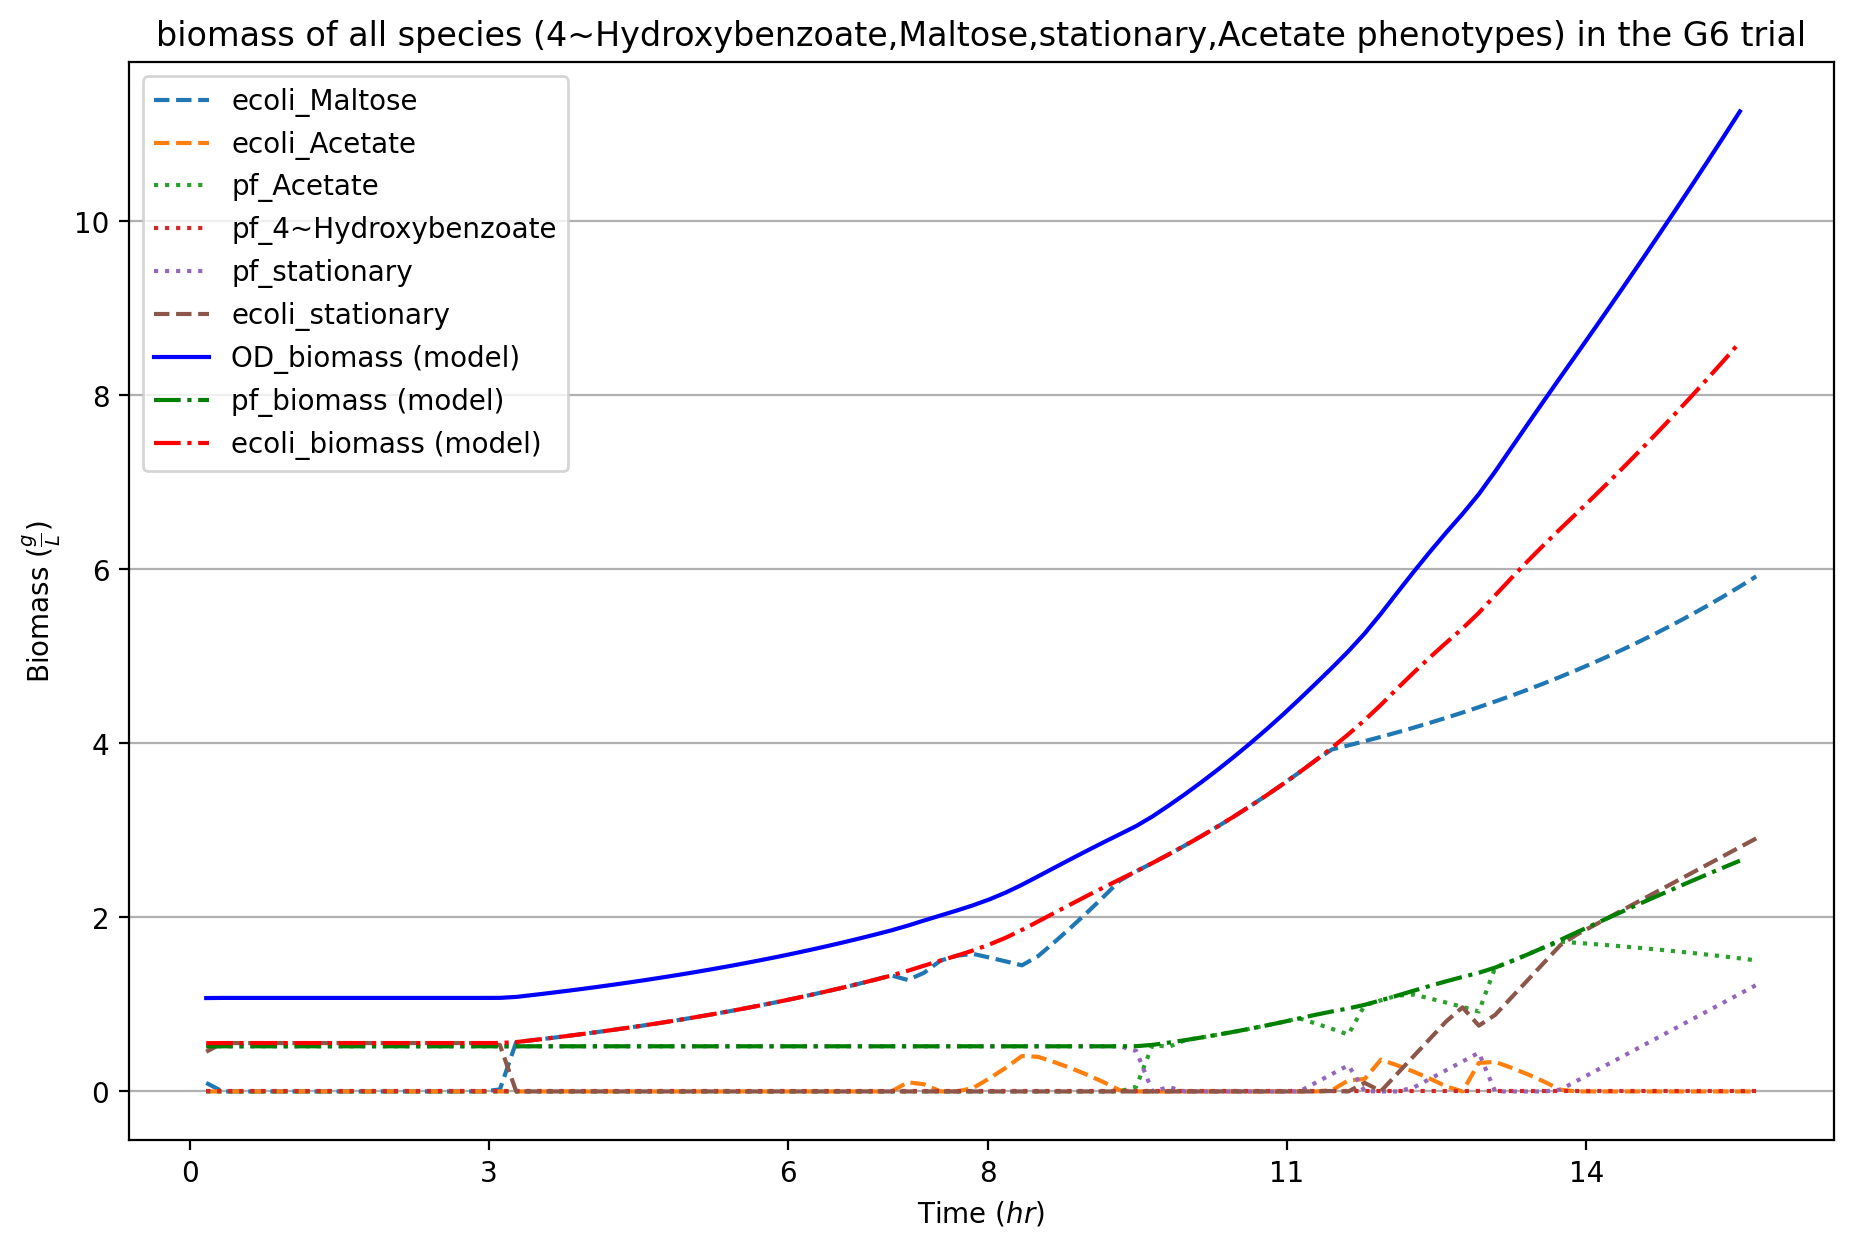

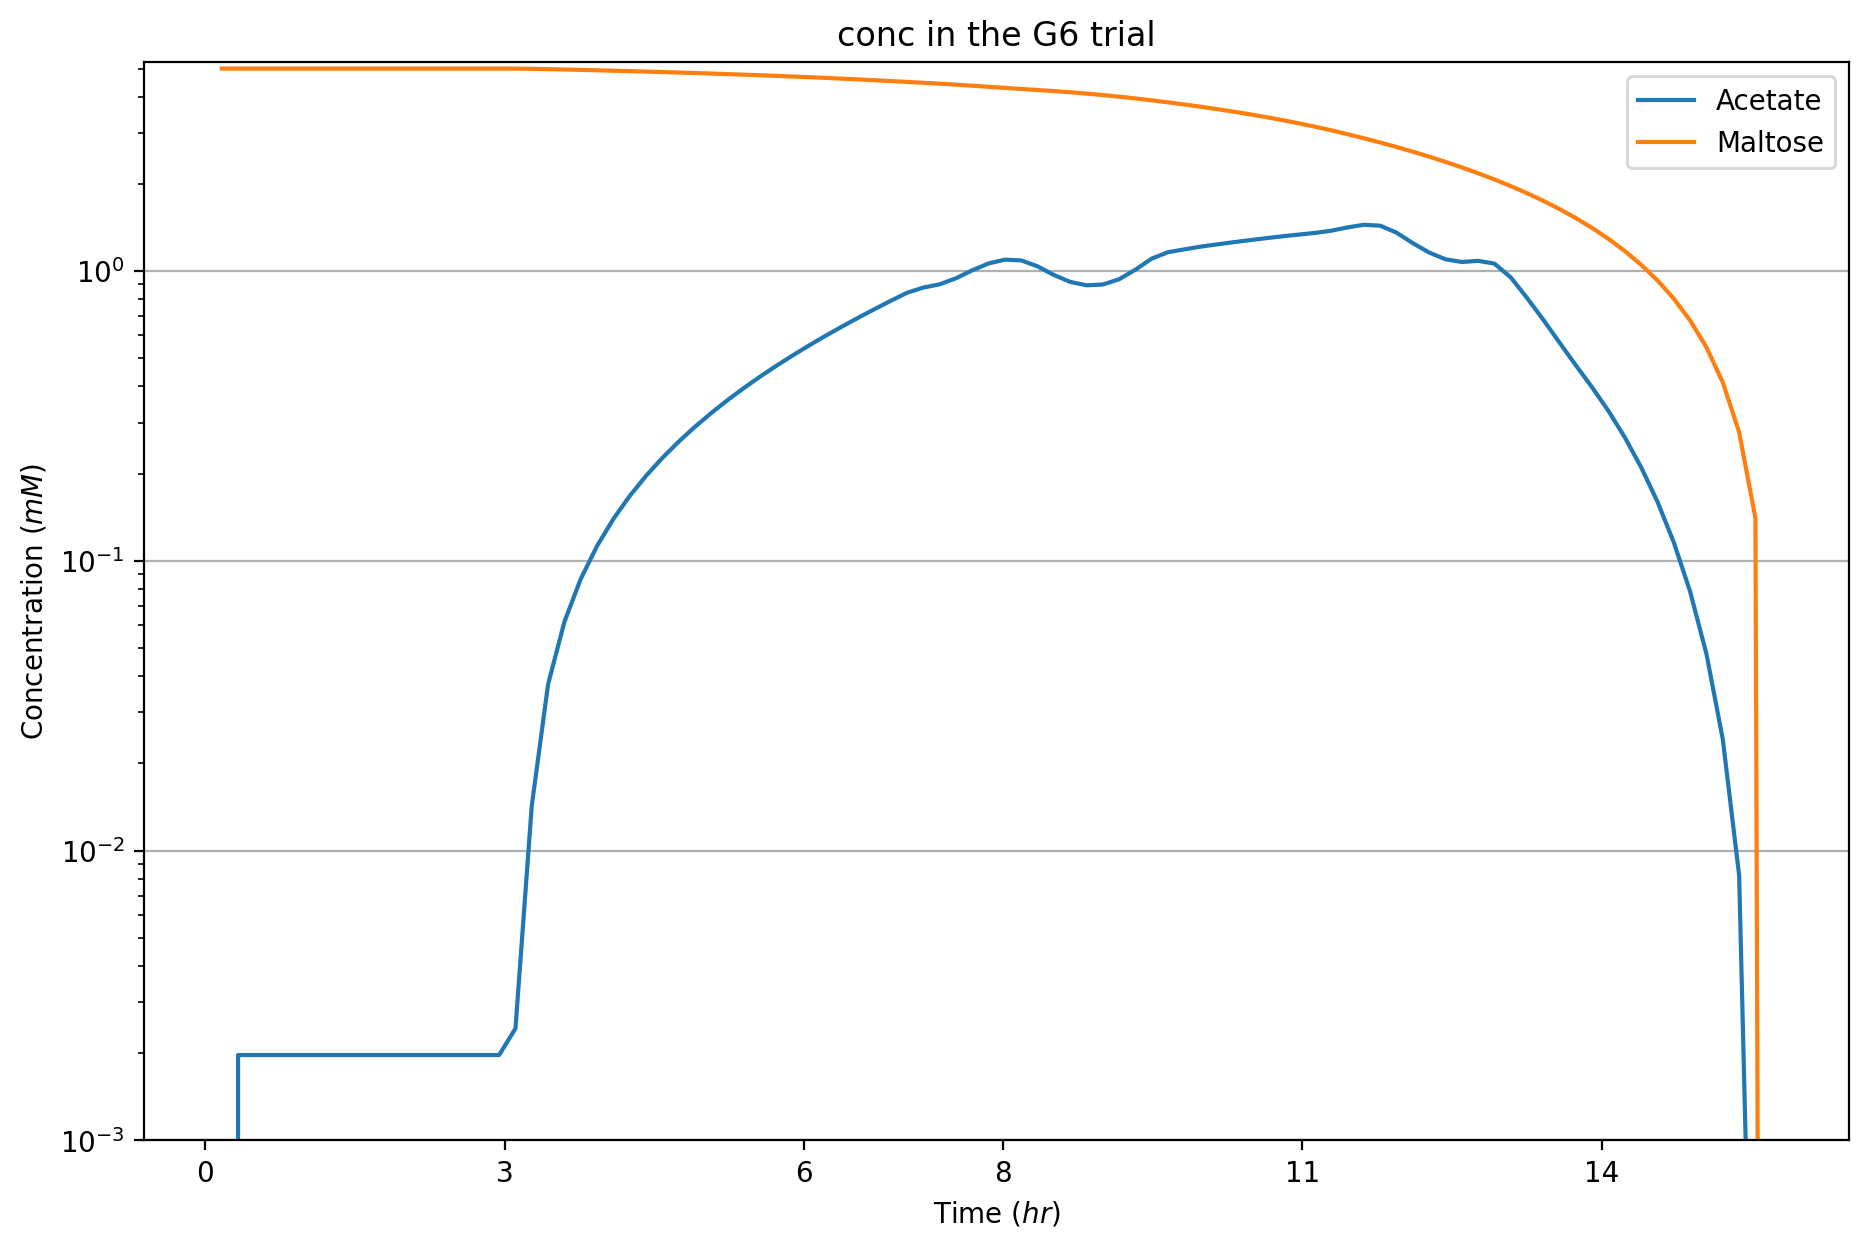

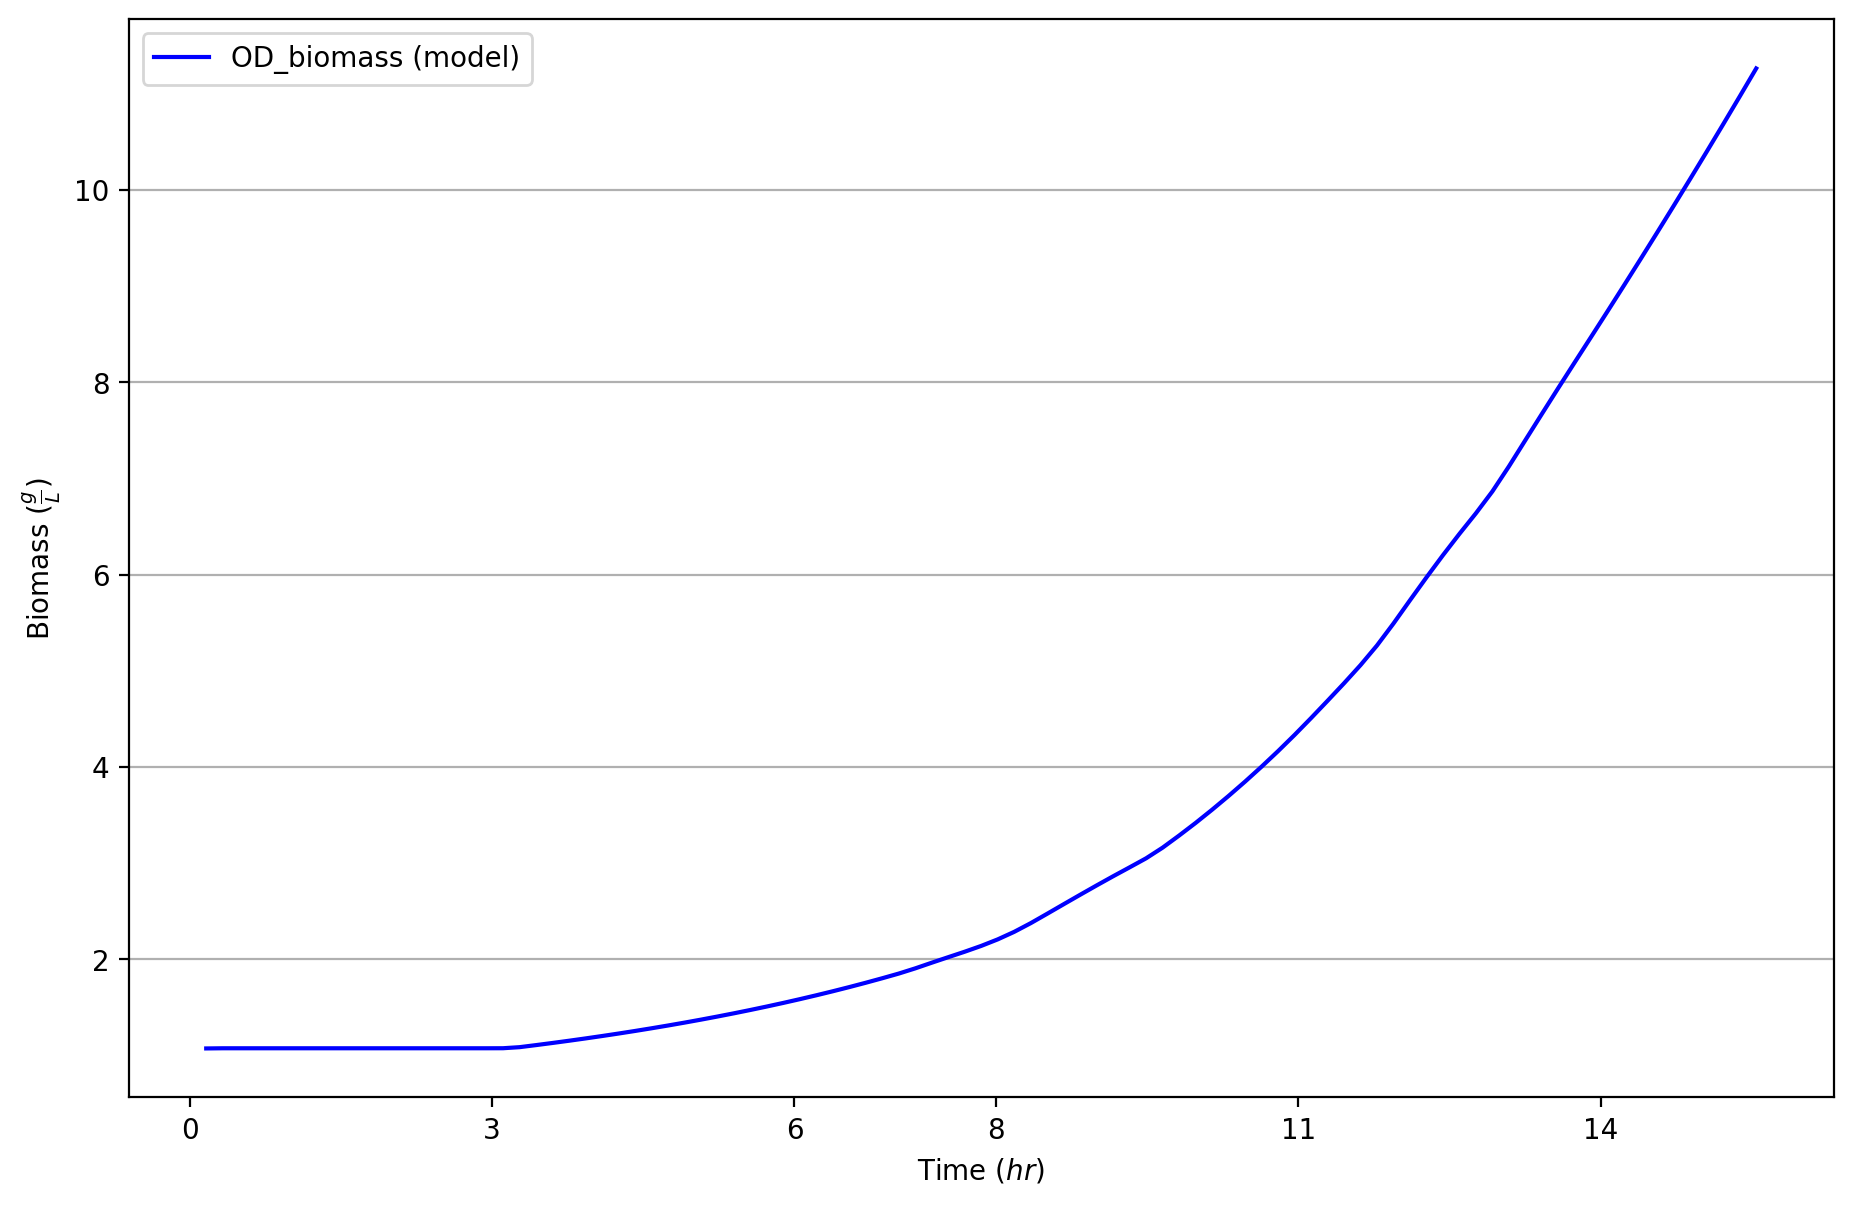

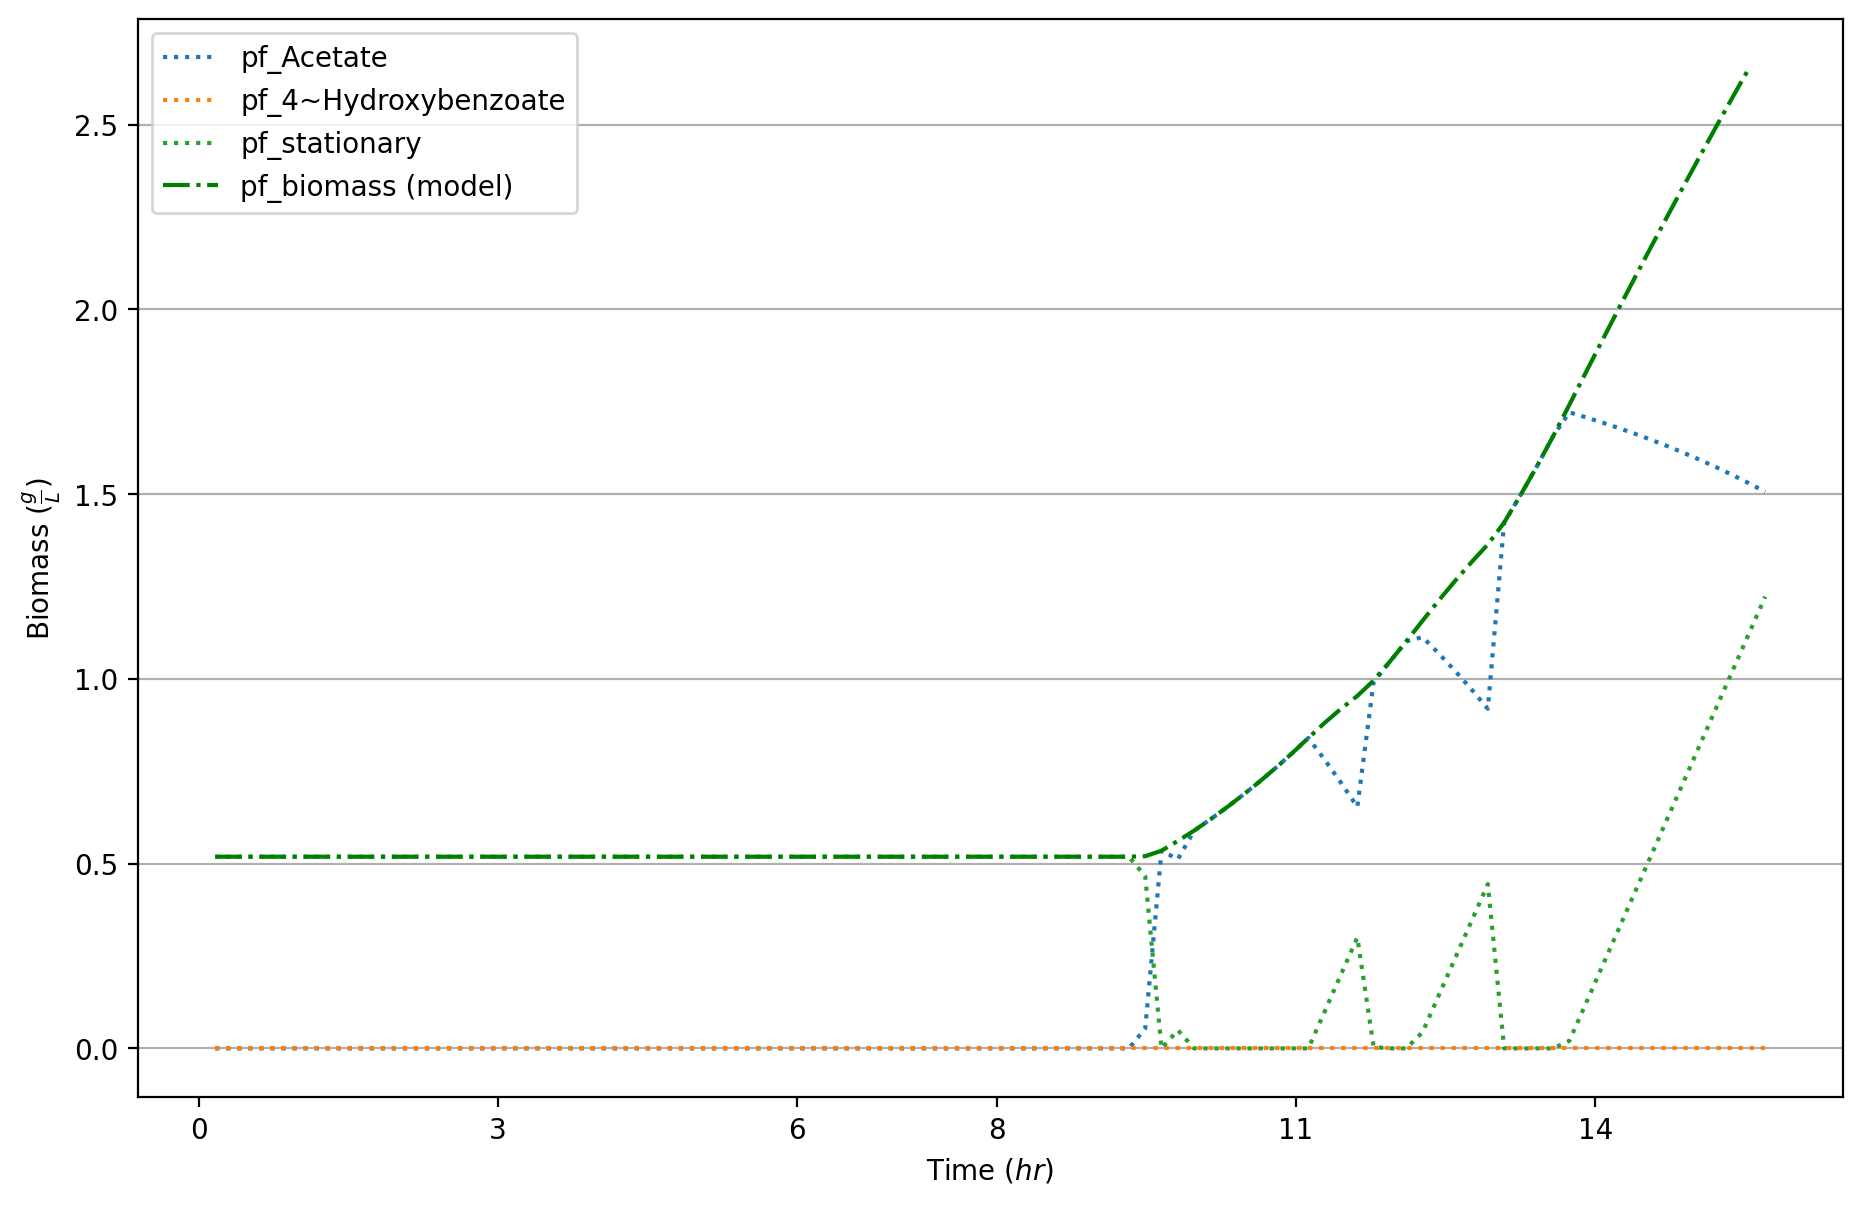

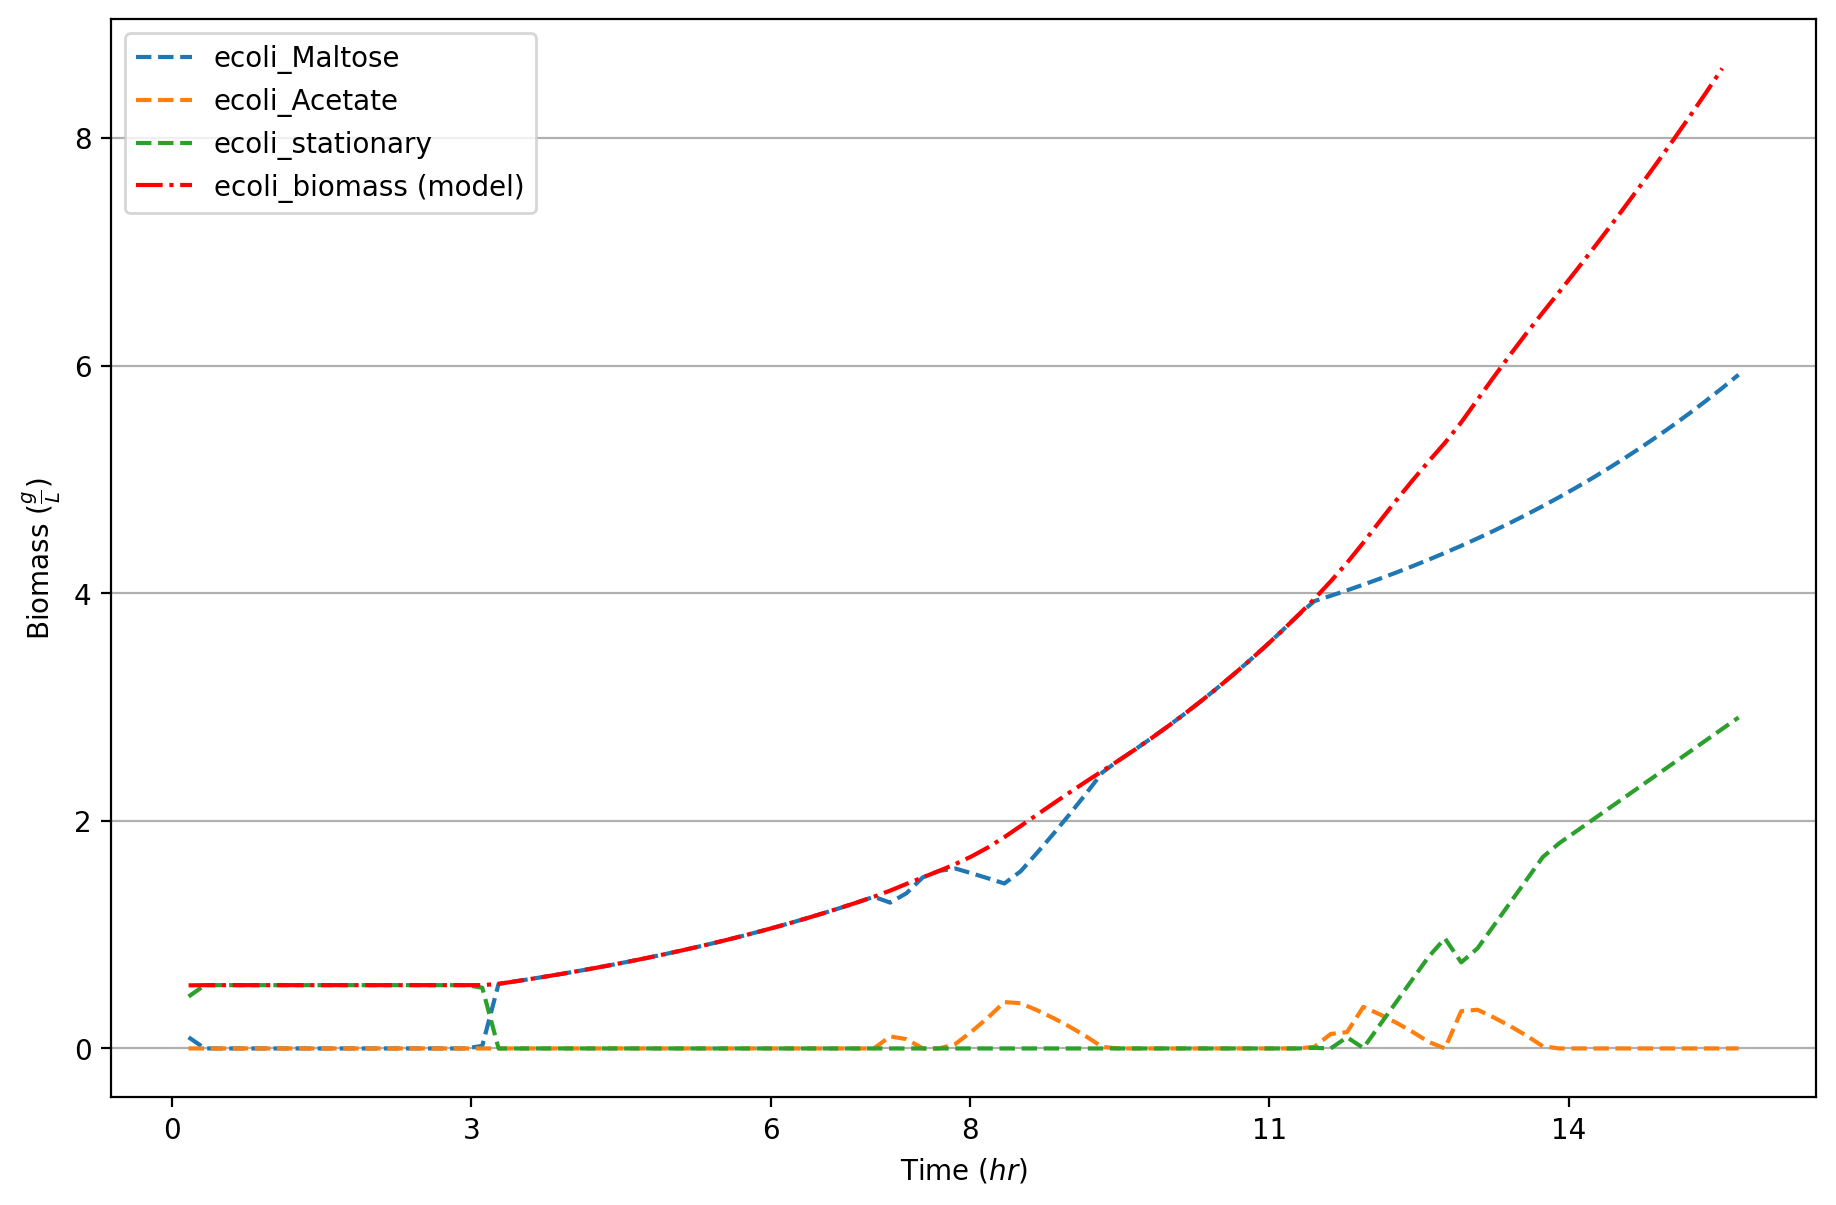

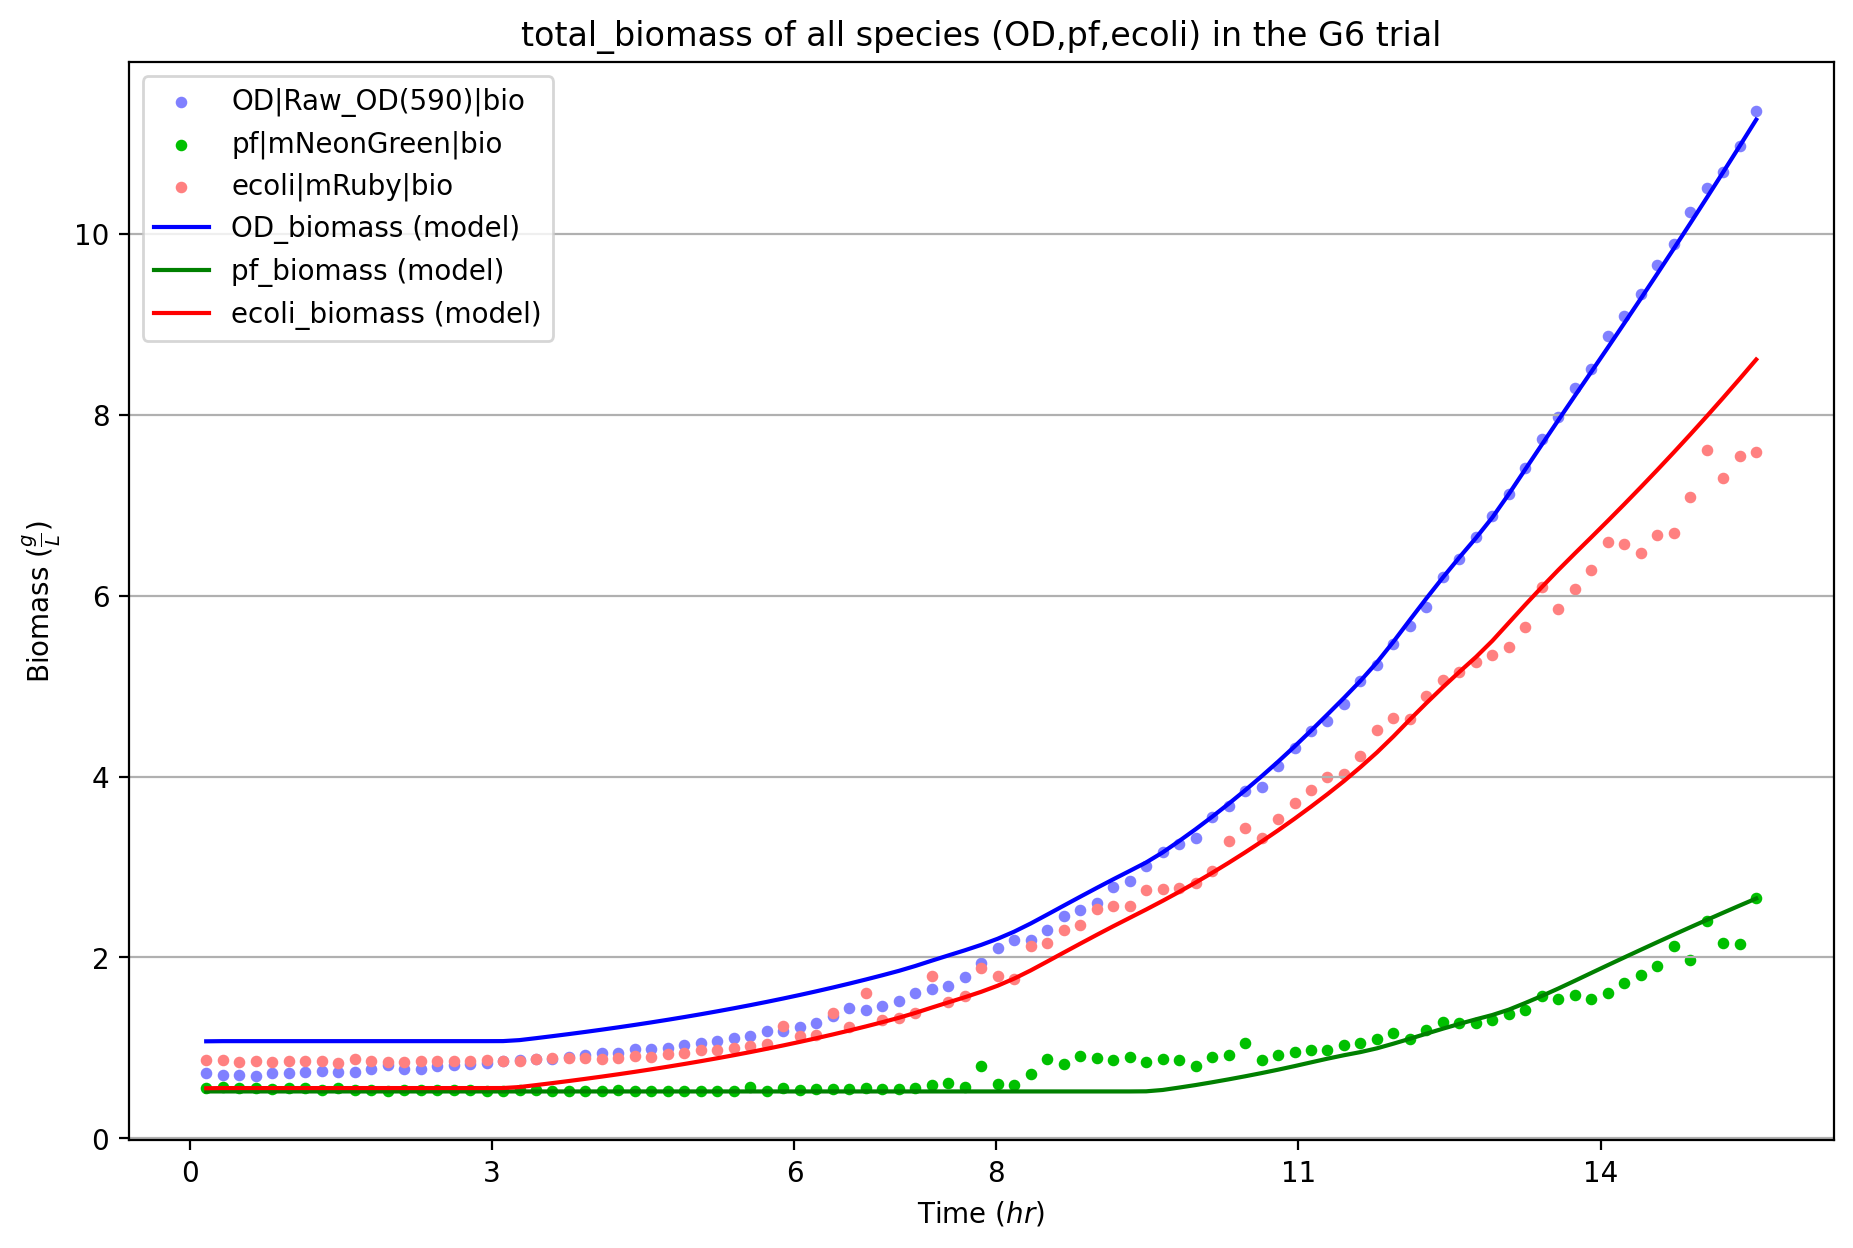

In [2]:
from modelseedpy import MSCommPhitting
# %run ../../../ModelSEED/ModelSEEDpy/modelseedpy/community/mscommphitting.py

test_com = MSCommPhitting('../../../ModelSEED/ModelSEEDDatabase',
                           community_members = {
                                ecoli: {
                                    'name': 'ecoli', 
                                    'phenotypes': {
                                        'Maltose': {"consumed":["cpd00179"],
                                                 "excreted":["cpd00029"]}, #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}   # !!! The phenotype name must align with the experimental IDs for the graphs to find the appropriate data
                                        'Acetate': {"consumed":["cpd00029"]}, #kbase_api.get_from_ws('93465/13/1'), 
                                        }
                                },
                                pf: {
                                    'name': 'pf',
                                    'phenotypes': {
                                        'Acetate': {"consumed":["cpd00029"]}, # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                                        '4-Hydroxybenzoate': {"consumed":["cpd00136"]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
                                        }
                                }
                            },
                            data_paths = {'path':"data/Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes.xlsx", 'Raw OD(590)':'OD', 'mNeonGreen':'pf', 'mRuby':'ecoli'},
                            species_abundances = species_abundances,
                            carbon_conc_series = carbon_conc_series,
                            ignore_trials = {'rows': ['C', 'D', 'E', 'F', 'G'], 'columns': [1,2,3,4,5,6,8,9,10,11,12]},
                            species_identities_rows = species_identities_rows)

test_com.fit(parameters = {'cvmin': .1, 'bcv': 0.0001, "stationary": 5e-3},
             mets_to_track = ["cpd00179","cpd00029"],
             rel_final_conc = {"cpd00179":0.1},
             zero_start = ["cpd00029", "cpd00136"],
             abs_final_conc = {"cpd00029":0}, # metabolomics data
             graphs=update_graphs("G6"),
             export_zip_name = 'maltose_co.zip',
             export_lp = "maltose_coculture_simple.lp",
             primals_export_path="test_primals_simple.json")

In [3]:
test_com.experimental_metadata

,trial_IDs,base_media,additional_compounds,strains,date
short_code,,,,,
G1,r1_pf-cpd00179:5,minimal components media,cpd00179:5:5,ecoli_mRuby:r0;pf:r1,"Apr 29, 22"
G2,r1_ecoli_mRuby-r50_pf-cpd00179:5,minimal components media,cpd00179:5:5,ecoli_mRuby:r1;pf:r50,"Apr 29, 22"
G3,r1_ecoli_mRuby-r20_pf-cpd00179:5,minimal components media,cpd00179:5:5,ecoli_mRuby:r1;pf:r20,"Apr 29, 22"
G4,r1_ecoli_mRuby-r10_pf-cpd00179:5,minimal components media,cpd00179:5:5,ecoli_mRuby:r1;pf:r10,"Apr 29, 22"
G5,r1_ecoli_mRuby-r3_pf-cpd00179:5,minimal components media,cpd00179:5:5,ecoli_mRuby:r1;pf:r3,"Apr 29, 22"
G6,r1_ecoli_mRuby-r1_pf-cpd00179:5,minimal components media,cpd00179:5:5,ecoli_mRuby:r1;pf:r1,"Apr 29, 22"
G7,r3_ecoli_mRuby-r1_pf-cpd00179:5,minimal components media,cpd00179:5:5,ecoli_mRuby:r3;pf:r1,"Apr 29, 22"
G8,r10_ecoli_mRuby-r1_pf-cpd00179:5,minimal components media,cpd00179:5:5,ecoli_mRuby:r10;pf:r1,"Apr 29, 22"
G9,r20_ecoli_mRuby-r1_pf-cpd00179:5,minimal components media,cpd00179:5:5,ecoli_mRuby:r20;pf:r1,"Apr 29, 22"



 GCF_000005845.2.RAST.mdl

 GCF_001612705.1.RAST.mdl
The ['B2', 'B3', 'B4', 'B5', 'B6', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
The [97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166] timesteps (with [1.12550559 1.12537038 1.12105398 1.11597471 1.11273534 1.12893569
 1.13334937 1.133368

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\zipfile.py:1514: UserWarning: Duplicate name: 'parameters.csv'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\zipfile.py:1514: UserWarning: Duplicate name: 'maltose_coculture_simple.lp'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\zipfile.py:1514: UserWarning: Duplicate name: 'CommPhitting.json'
  return self._open_to_write(zinfo, force_zip64=force_zip64)


Done exporting the content: 0.08385416666666666 min
starting optimization


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\zipfile.py:1514: UserWarning: Duplicate name: 'test_primals_simple.json'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\modelseedpy\community\mscommphitting.py:120: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


maltose_co.zip
graph_0
{'content': 'biomass',
 'experimental_data': False,
 'painting': {'OD': {'color': 'blue',
                     'linestyle': 'solid',
                     'name': 'Total biomass'},
              'ecoli': {'color': 'red',
                        'linestyle': 'dashed',
                        'name': 'E. coli'},
              'pf': {'color': 'green',
                     'linestyle': 'dotted',
                     'name': 'P. fluorescens'}},
 'parsed': False,
 'phenotype': {'Acetate', '4~Hydroxybenzoate', 'Maltose', 'stationary'},
 'species': ['OD', 'pf', 'ecoli'],
 'trial': 'G6'}


ic| mscommphitting.py:1210 in graph()- name: 'OD'
ic| mscommphitting.py:1210 in graph()- name: 'pf'
ic| mscommphitting.py:1210 in graph()- name: 'ecoli'


graph_1
{'content': 'conc',
 'experimental_data': False,
 'mets': ['cpd00179', 'cpd00029'],
 'painting': {'OD': {'color': 'blue',
                     'linestyle': 'solid',
                     'name': 'Total biomass'},
              'ecoli': {'color': 'red',
                        'linestyle': 'dashed',
                        'name': 'E. coli'},
              'pf': {'color': 'green',
                     'linestyle': 'dotted',
                     'name': 'P. fluorescens'}},
 'parsed': False,
 'trial': 'G6'}
graph_2
{'content': 'biomass',
 'experimental_data': False,
 'painting': {'OD': {'color': 'blue',
                     'linestyle': 'solid',
                     'name': 'Total biomass'},
              'ecoli': {'color': 'red',
                        'linestyle': 'dashed',
                        'name': 'E. coli'},
              'pf': {'color': 'green',
                     'linestyle': 'dotted',
                     'name': 'P. fluorescens'}},
 'parsed': True,
 'phenotype': {

ic| mscommphitting.py:1210 in graph()- name: 'OD'
ic| mscommphitting.py:1210 in graph()- name: 'pf'
ic| mscommphitting.py:1210 in graph()- name: 'ecoli'
ic| mscommphitting.py:1210 in graph()- name: 'OD'
ic| mscommphitting.py:1210 in graph()- name: 'pf'
ic| mscommphitting.py:1210 in graph()- name: 'ecoli'


graph_3
{'content': 'total_biomass',
 'experimental_data': True,
 'painting': {'OD': {'color': 'blue',
                     'linestyle': 'solid',
                     'name': 'Total biomass'},
              'ecoli': {'color': 'red',
                        'linestyle': 'dashed',
                        'name': 'E. coli'},
              'pf': {'color': 'green',
                     'linestyle': 'dotted',
                     'name': 'P. fluorescens'}},
 'parsed': False,
 'species': ['OD', 'pf', 'ecoli'],
 'trial': 'G6'}


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\zipfile.py:1514: UserWarning: Duplicate name: 'G6_cpd00179,cpd00029_c.jpg'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\zipfile.py:1514: UserWarning: Duplicate name: 'G6_all species_OD,pf,ecoli_total_biomass.jpg'
  return self._open_to_write(zinfo, force_zip64=force_zip64)


Optimization completed in 65.35989583333334 minutes
Graphing completed in 0.0203125 minutes


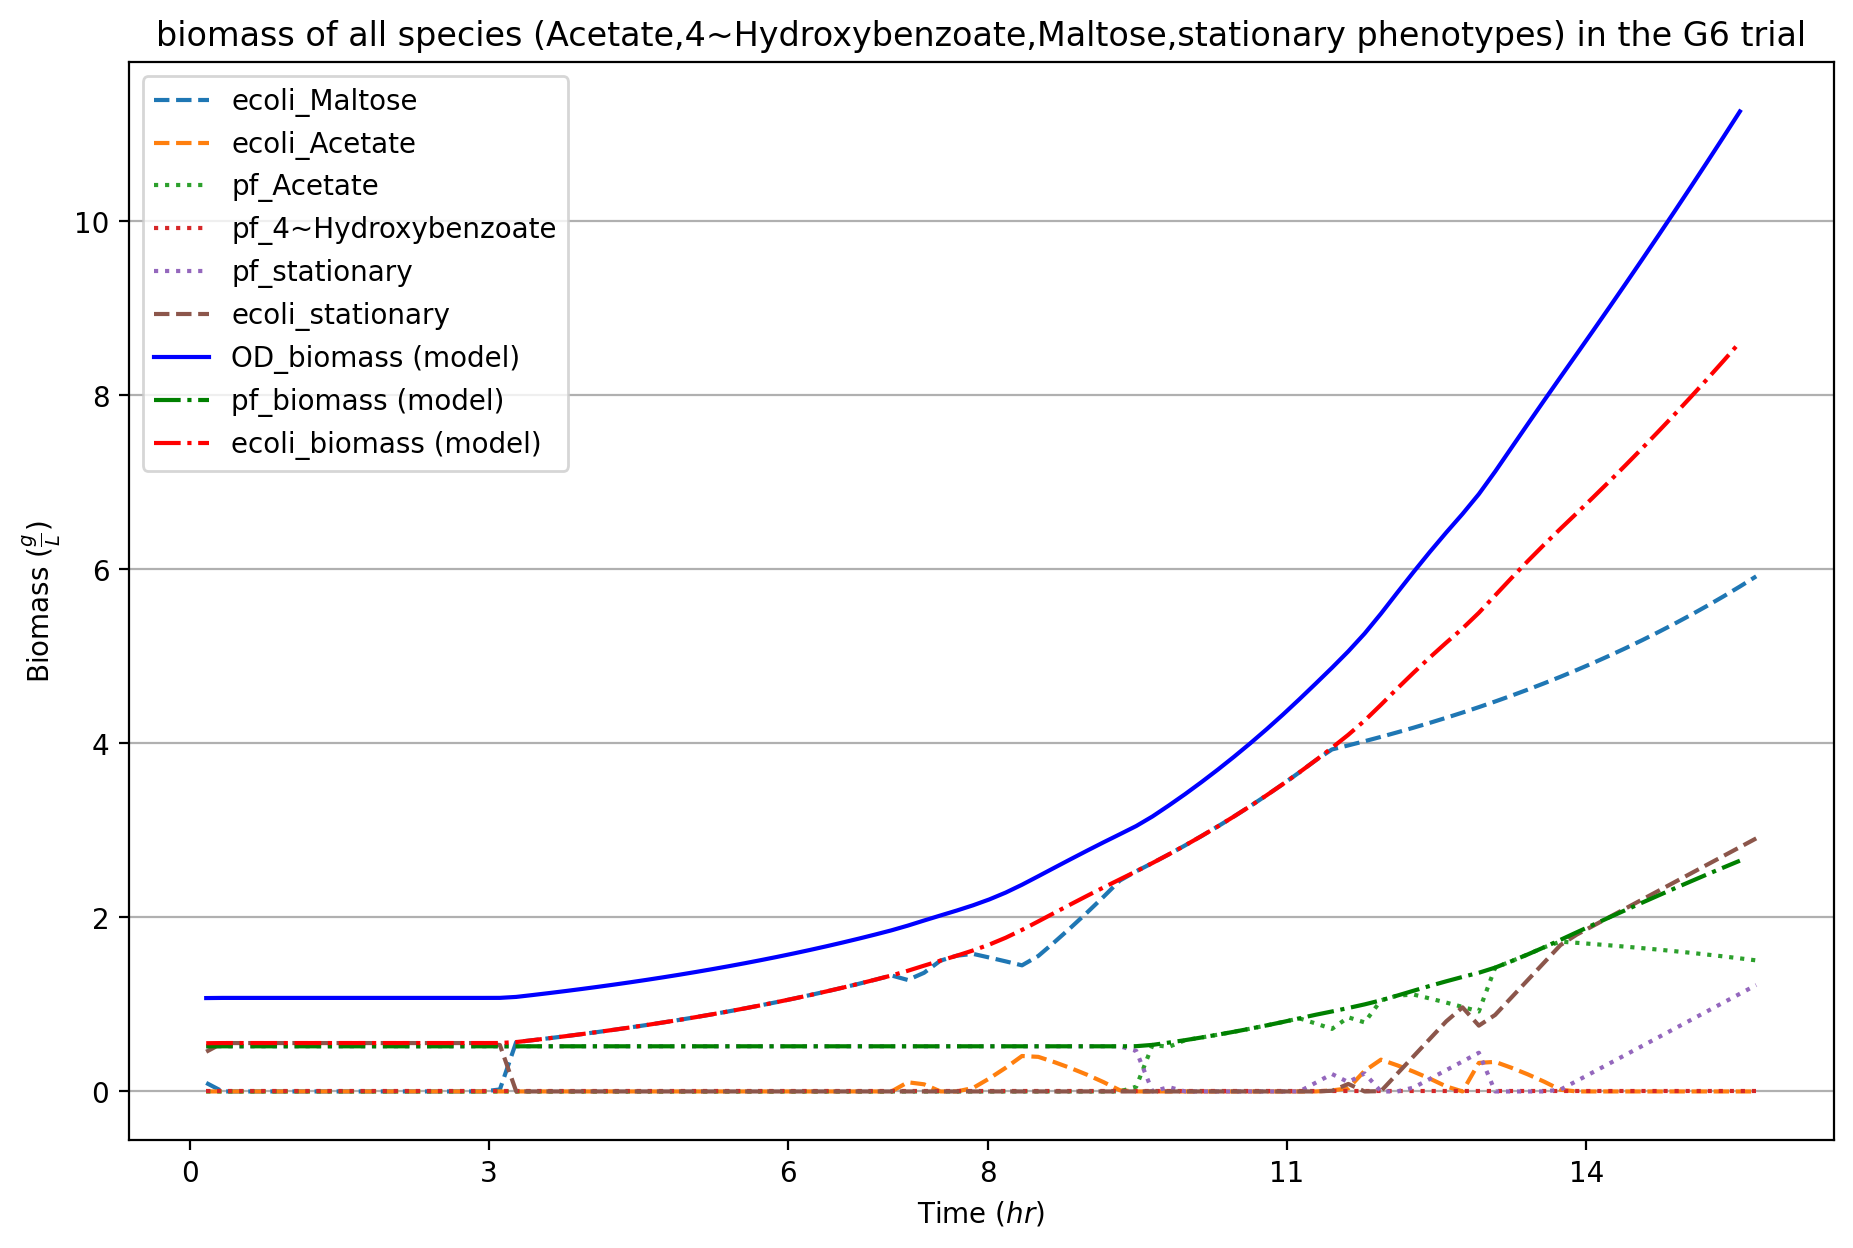

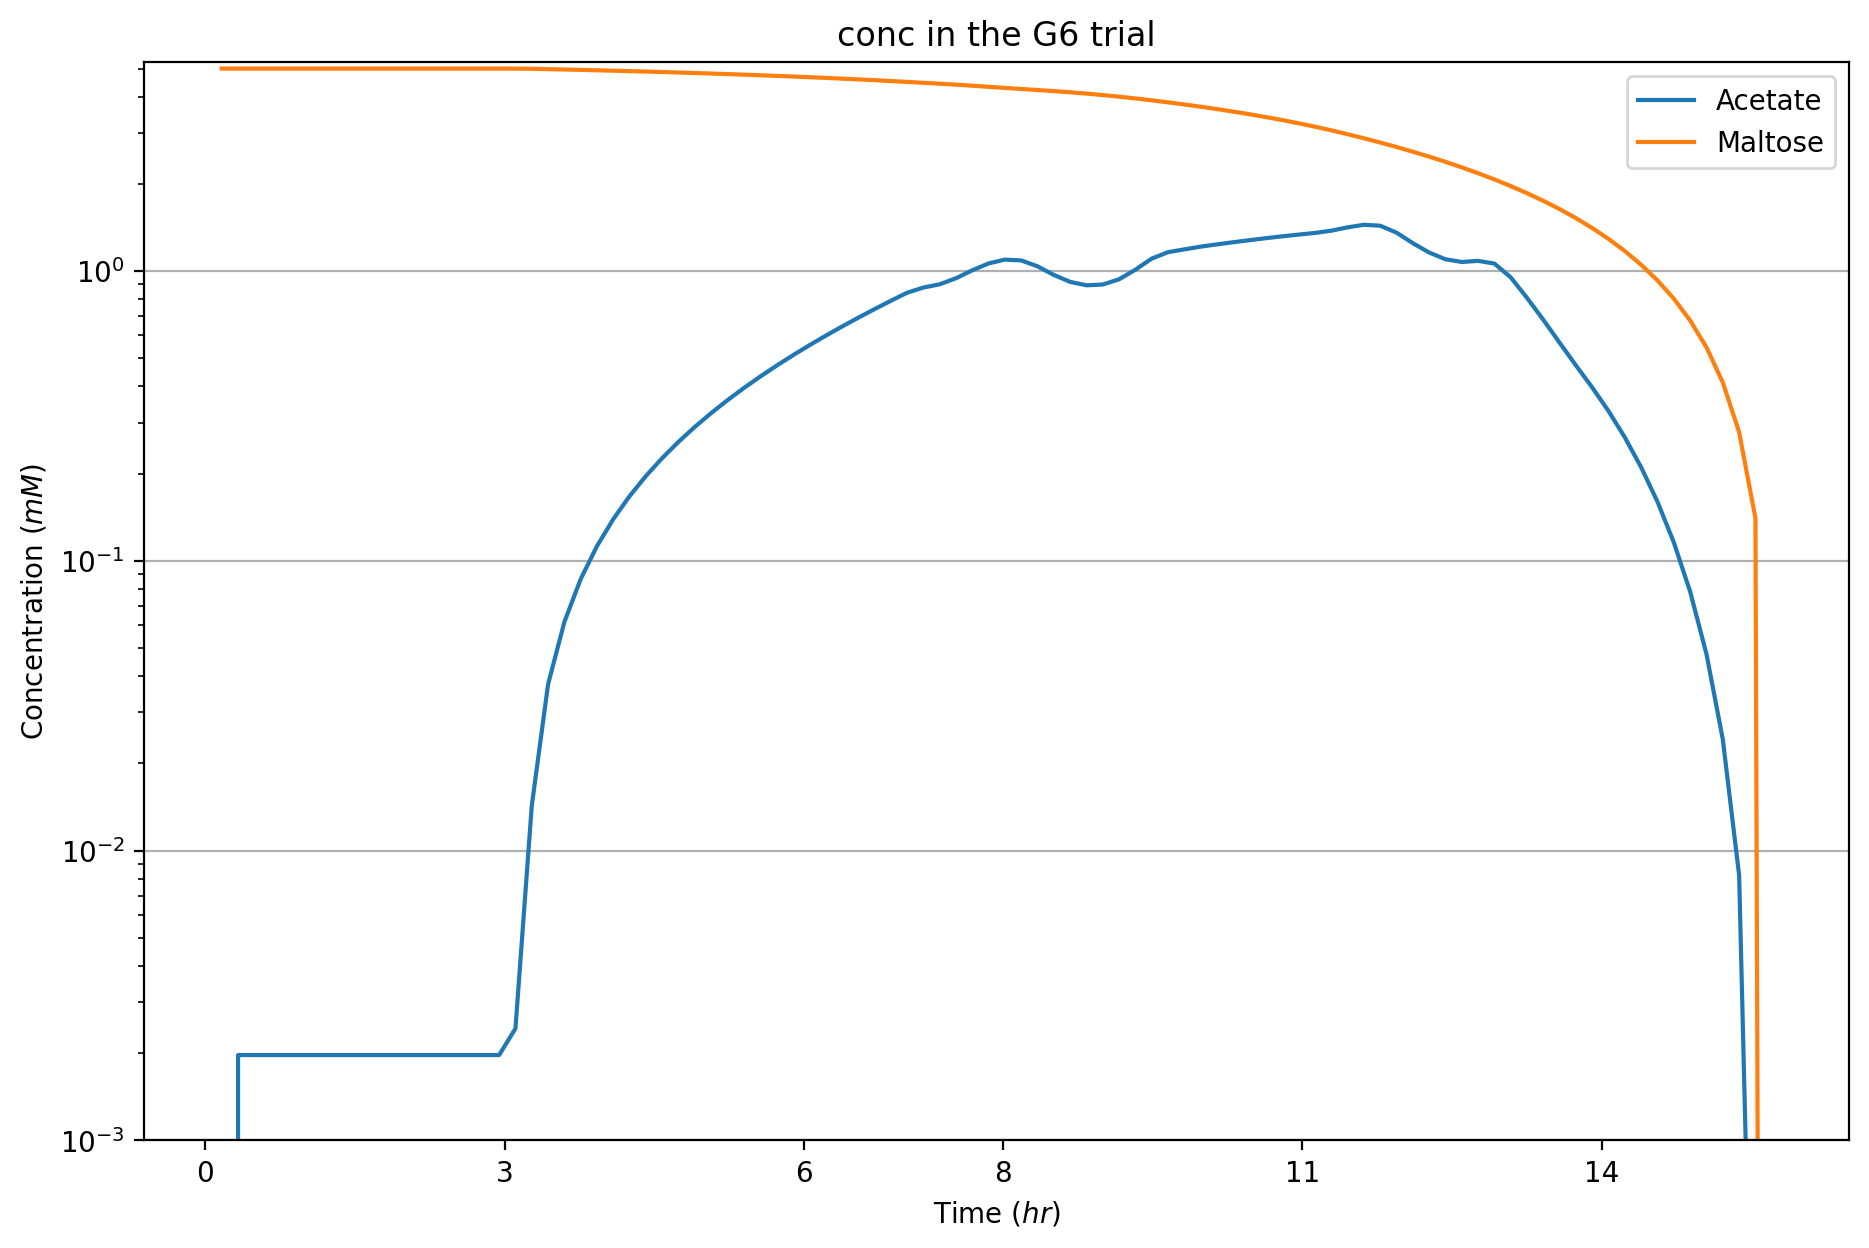

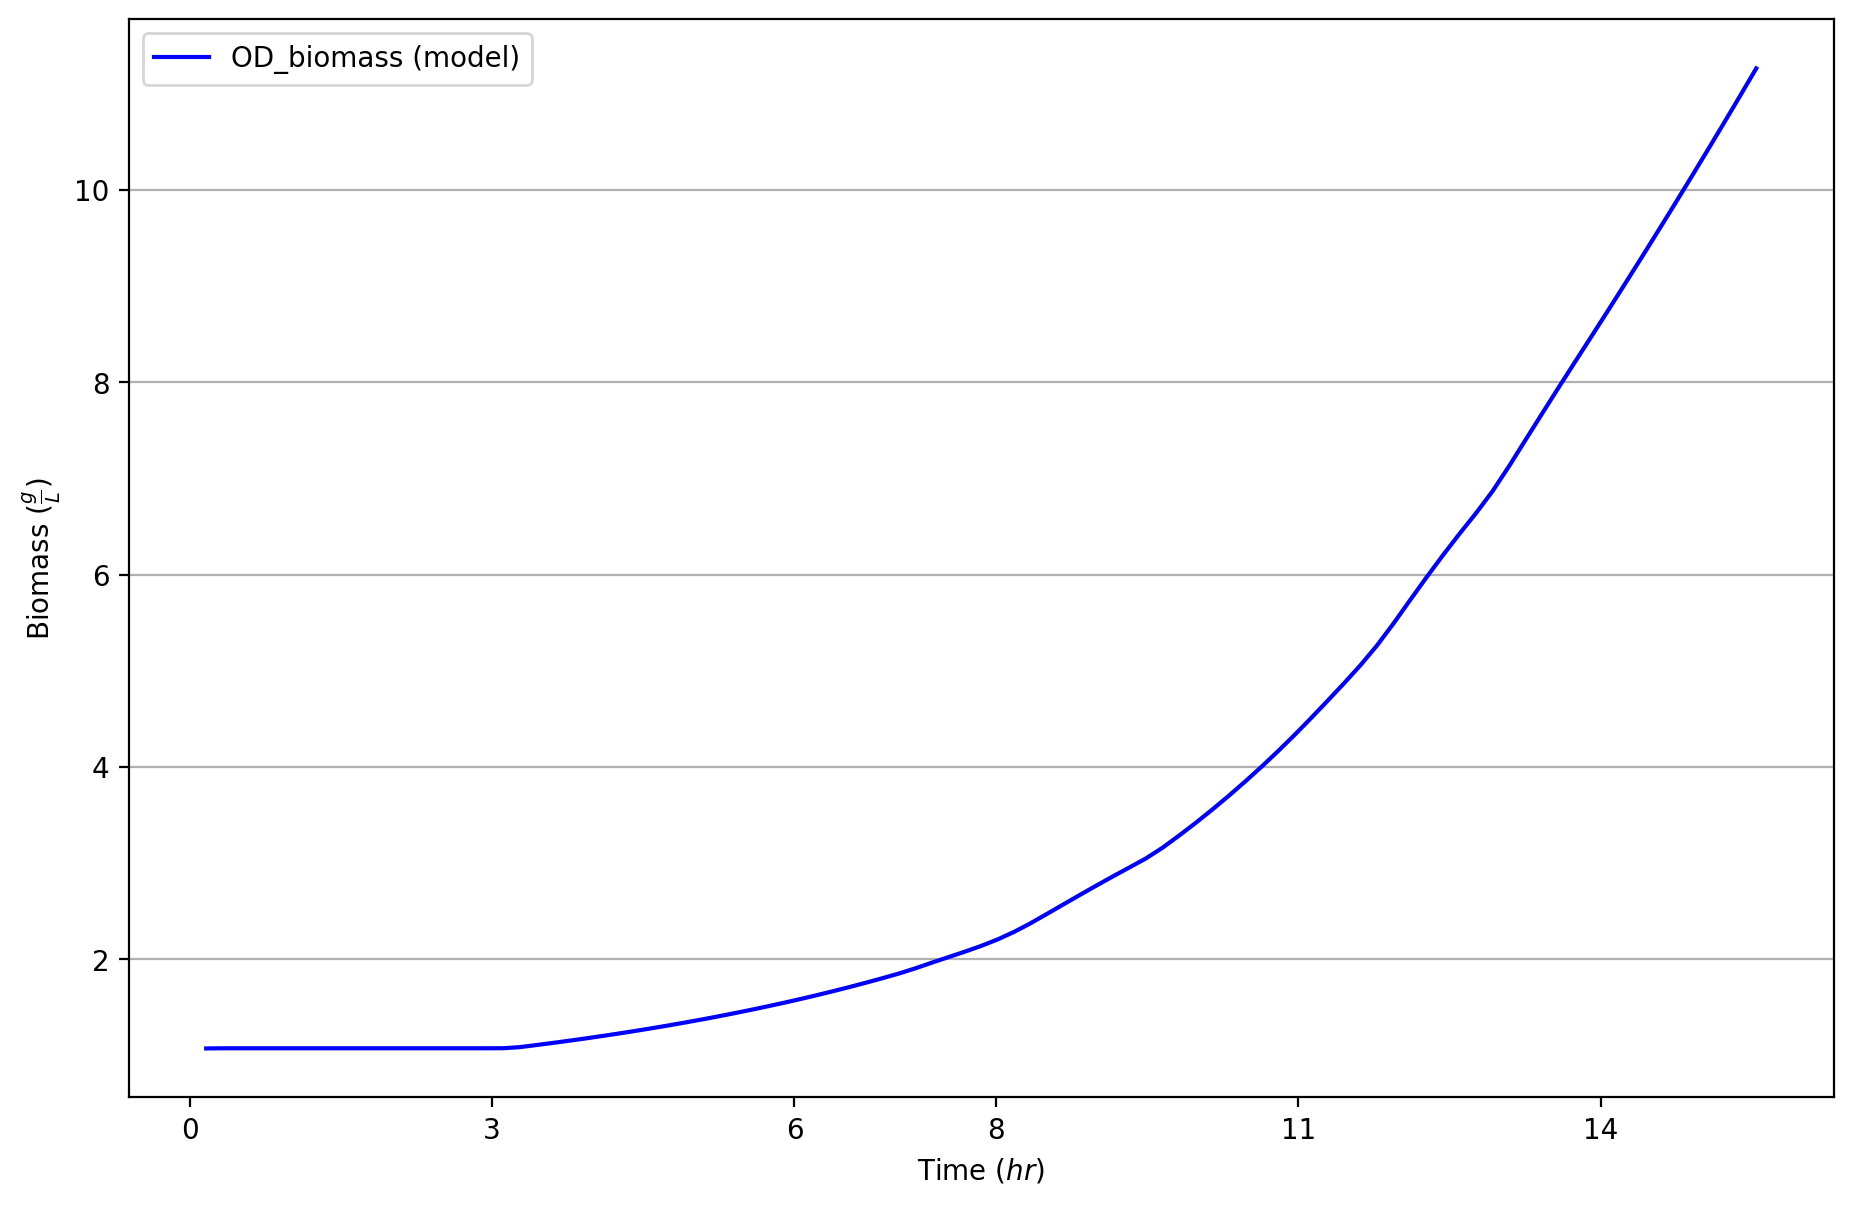

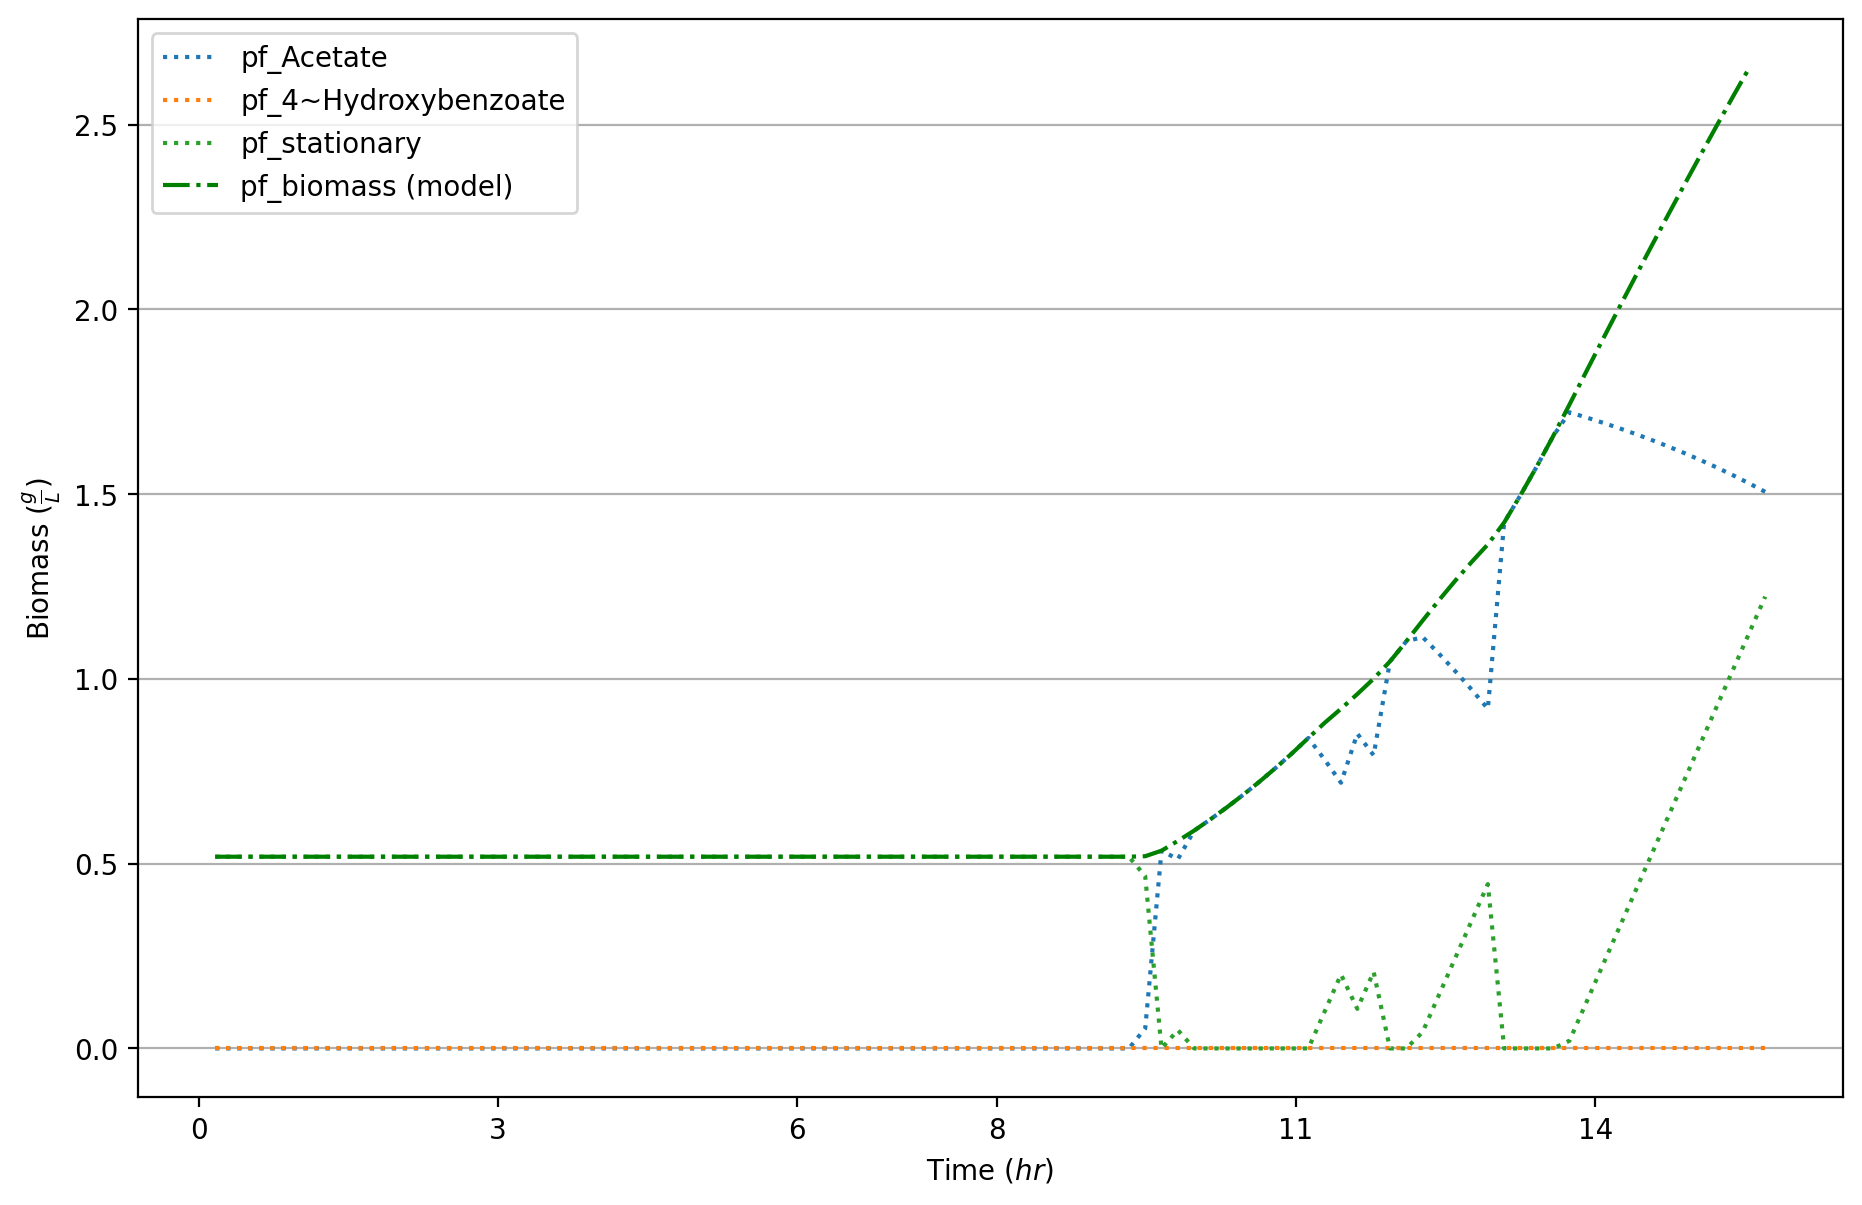

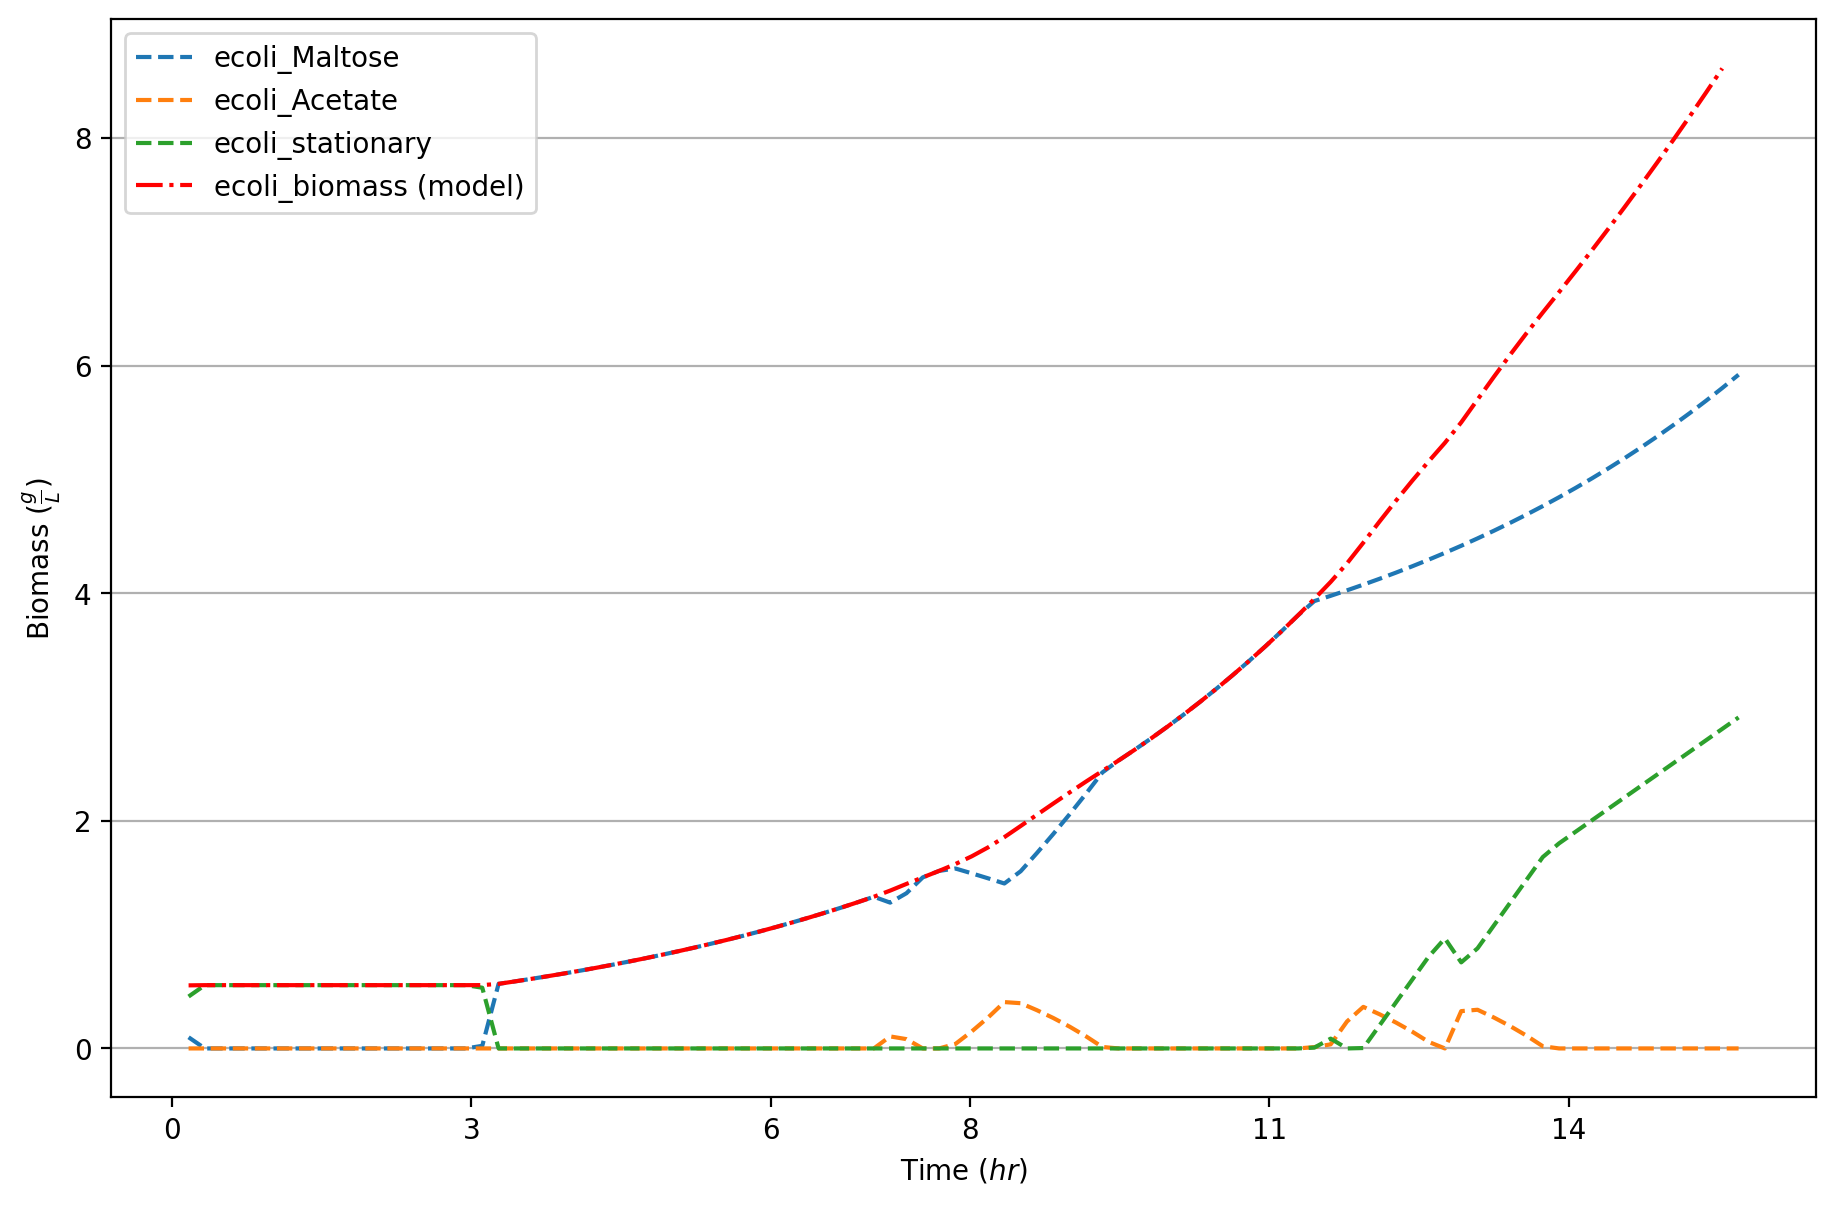

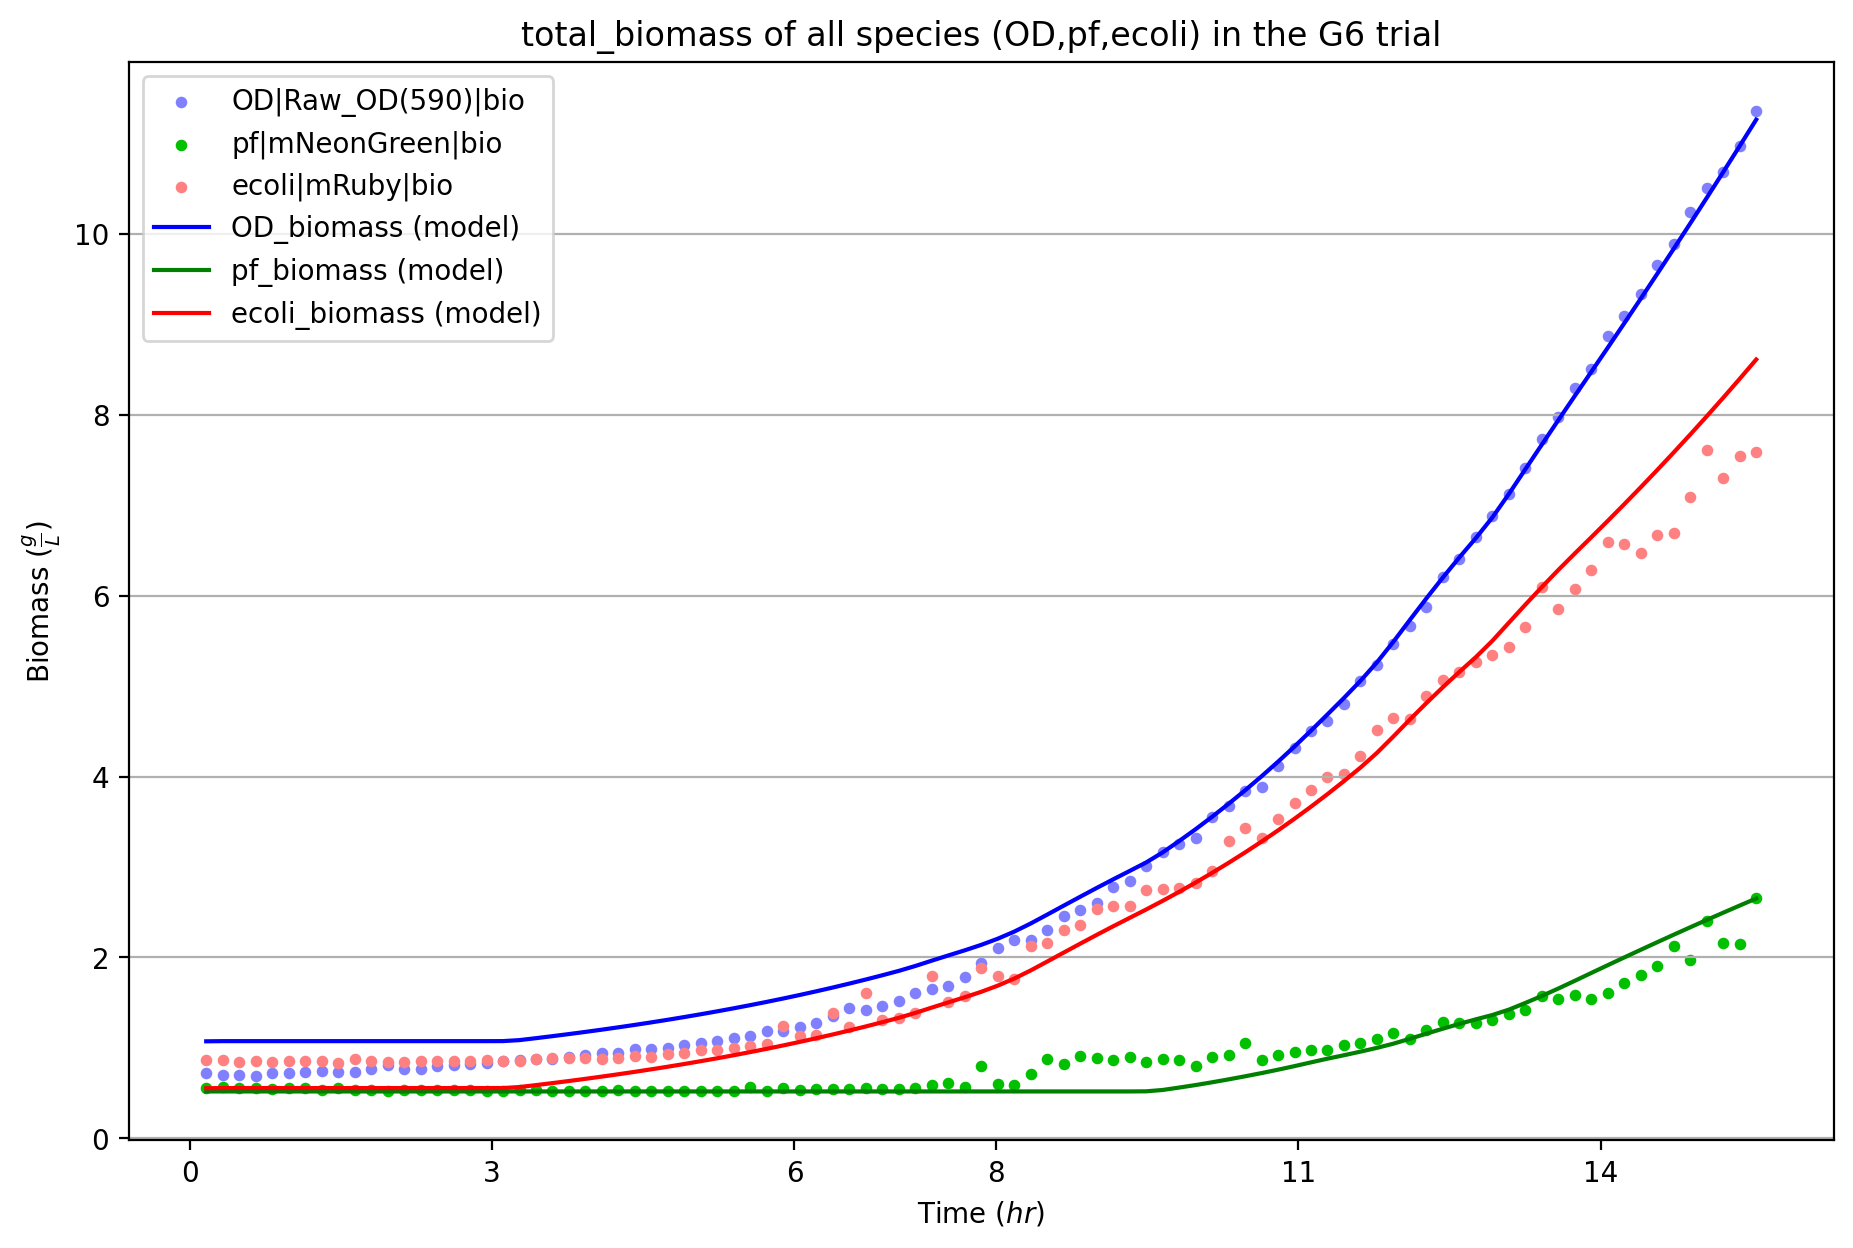

In [2]:
from modelseedpy import MSCommPhitting


test_com = MSCommPhitting('../../../ModelSEED/ModelSEEDDatabase',
                           community_members = {
                                ecoli: {
                                    'name': 'ecoli', 
                                    'phenotypes': {
                                        'Maltose': {"consumed":["cpd00179"],
                                                 "excreted":["cpd00029"]}, #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}   # !!! The phenotype name must align with the experimental IDs for the graphs to find the appropriate data
                                        'Acetate': {"consumed":["cpd00029"]}, #kbase_api.get_from_ws('93465/13/1'), 
                                        }
                                },
                                pf: {
                                    'name': 'pf',
                                    'phenotypes': {
                                        'Acetate': {"consumed":["cpd00029"]}, # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                                        '4-Hydroxybenzoate': {"consumed":["cpd00136"]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
                                        }
                                }
                            },
                            data_paths = {'path':"data/Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes.xlsx", 'Raw OD(590)':'OD', 'mNeonGreen':'pf', 'mRuby':'ecoli'},
                            species_abundances = species_abundances,
                            carbon_conc_series = carbon_conc_series,
                            ignore_trials = {'rows': ['C', 'D', 'E', 'F', 'G'], 'columns': [1,2,3,4,5,6,8,9,10,11,12]},
                            species_identities_rows = species_identities_rows)

test_com.fit(parameters = {'cvmin': .1, 'bcv': 0.0001, "stationary": 5e-3},
             mets_to_track = ["cpd00179","cpd00029"],
             rel_final_conc = {"cpd00179":0.1},
             zero_start = ["cpd00029", "cpd00136"],
             abs_final_conc = {"cpd00029":0}, # metabolomics data
             graphs=update_graphs("G6"),
             export_zip_name = 'maltose_co.zip',
             export_lp = "maltose_coculture_simple.lp",
             primals_export_path="test_primals_simple.json")

# Miscellaneous testing

In [ ]:
import numpy as np

ary = np.array([0,0,0,0,0,0])
if all(ary==0):
    print("yes")

In [ ]:
from pandas import DataFrame

df = DataFrame()

In [ ]:
import numpy as np
ary = np.array(["test", "test2", ":"])
print(np.where("test" in ary))
print(ary[True if ":" in ary else False])

In [ ]:
import sigfig
print(sigfig.round(3.123123, 3))

In [ ]:
twoD = {"test": [[1,2,3], [3,2,3,2,3]]}
for k, data in twoD.items():
    twoD[k] = []
    for ls in data:
        ls = ls[:3]
print(twoD)

In [ ]:
import numpy as np
twoD = [[1,2,3], [3,2,3,2,3]]
minVal = min(list(map(len, twoD)))
list_index = [len(ls) == minVal for ls in twoD]
min_list = np.array(twoD)[list_index]
## cleave excess data from each set
for data in twoD:
    data = data[:minVal+1]
print(min_list)

In [ ]:
# print(ecoli.metabolites.get_by_id("cpd21754").elements)

for met in ecoli.metabolites:
    print(not met.elements or "C" in met.elements)
    print(met.elements, "\n")

In [ ]:
print(dir(ecoli.solver))

In [ ]:
# print(*[f"{cons}\n" for cons in ecoli.constraints if "cpd00011" in cons.name])
for rxn in ecoli.exchanges:
    print(dir(rxn.reverse_variable))
    break

In [ ]:
sol.fluxes = sol.fluxes / sol.fluxes["EX_cpd00029_e0"]
print(sol.fluxes)

In [ ]:
from pandas import read_csv
fluxes = read_csv("fluxes.csv")
fluxes.index = fluxes['rxn']
# fluxes.loc[:,"ecoli_acetate"] = fluxes.loc[:,"ecoli_acetate"].div(-fluxes.loc["EX_cpd00029_e0","ecoli_acetate"])
# display(fluxes)
fake_sol = fluxes["ecoli_acetate"]
print(fake_sol.index)
fake_sol = fake_sol.div(-["EX_cpd00029_e0"])
display(fake_sol)

In [ ]:
test_dic = {"test":2}
test2_dic = {"test2":3, test_dic}
print(test2_dic)

In [ ]:
x = y = "test"
y = "re"
print(x)

In [ ]:
for rxn in ecoli.exchanges:
    for met in rxn.metabolites:
        print(dir(met))
        print(met.reactions)
        break
    break
print(dir(list(ecoli.constraints)[0]))
print(list(ecoli.constraints)[0])

In [ ]:
medium = {"cpd00012":102, "cpd00007":12}
new_medium = {cpd: min(flux, 100) for cpd, flux in medium.items()}
new_medium.update({cpd: min(flux, 2) for cpd, flux in new_medium.items() if cpd == "cpd00007"})
display(new_medium)

#### Explore the addition of experimental media to the community models

In [ ]:
# define the environment path 
import os
# local_cobrakbase_path = os.path.join('/Users/afreiburger/Documents')
local_cobrakbase_path = os.path.join('C:', 'Users', 'Andrew Freiburger','Documents','Argonne','cobrakbase')
os.environ["HOME"] = local_cobrakbase_path

# import the models
import cobrakbase
# with open("/Users/afreiburger/Documents/kbase_token.txt") as token_file:
with open("C:/Users/Andrew Freiburger/Documents/Argonne/kbase_token.txt") as token_file:
    kbase_api = cobrakbase.KBaseAPI(token_file.readline())
    
import warnings
warnings.filterwarnings(action='once')

from pandas import set_option
set_option("display.max_rows", None)

ecoli = kbase_api.get_from_ws("iML1515",76994)

In [ ]:
base_media = kbase_api.get_from_ws("93465/19/1")
ecoli = kbase_api.get_from_ws("iML1515",76994)
pf = kbase_api.get_from_ws("iSB1139.kb.gf",30650)

In [ ]:
# sol = ecoli.optimize()
for ex in ecoli.exchanges:
    reagents = [ex.reactants+ex.products][0]
    for reagent in reagents:
        print(dir(reagent))
    print([ex.reactants+ex.products][0])
    break

In [ ]:
from modelseedpy import MSModelUtil
ecoli_util = MSModelUtil(ecoli)
ecoli_util.add_kbase_media(base_media)
display(ecoli_util.model.optimize())

pf_util = MSModelUtil(ecoli)
pf_util.add_kbase_media(base_media)
display(pf_util.model.optimize())

In [ ]:
from math import inf
for rxn in ecoli.reactions:
    print(rxn.bounds)
    # print(dir(rxn))
    rxn.lower_bound = -inf
    print(rxn.bounds)
    break

In [ ]:
acetate = ecoli.metabolites.get_by_id("cpd00029_e0")
print(acetate.elements)


In [ ]:
import dis
dis.dis(compile('[line.split()[i] for i in indexes]', '', 'eval'))

In [ ]:
# for organism in ['ecoli_acetate', 'ecoli_malt', 'ecoli_stationary', 'pf_acetate', 'pf_4HB', 'pf_stationary']:
#     a,b = organism.split("_")
#     print(a,b)
#     for species, pheno in organism.split("_"):
#         print(species, pheno)

x = [(organism.split("_")[0], organism.split("_")[1]) for organism in ['ecoli_acetate', 'ecoli_malt', 'ecoli_stationary', 'pf_acetate', 'pf_4HB', 'pf_stationary']]
print(x)

In [ ]:
def dic_keys(dic):
    keys = []            
    if isinstance(dic, dict):
        for key, value in dic.items():
            keys.append(key)
            keys.extend(dic_keys(value))
    return keys

dic = {"test": {"test2": {"test3": 34}}}

print(dic_keys(dic))

In [ ]:
dic = {"test":12}
dic.update({})
dic

In [ ]:
from modelseedpy.biochem import from_local
modelseed = from_local('../../../ModelSEED/ModelSEEDDatabase')
for r in modelseed.reactions:
    print(r.delta_g, r.delta_g_error, type(r.delta_g), type(r.delta_g_error))
    break
ac = modelseed.compounds.get_by_id("cpd00029")
print(dir(ac))
ac.name

In [ ]:
x = [] or None or []
print(x)

In [ ]:
def dict_keys_exists(dic, *keys):
    result = keys[0] in dic
    if keys[0] in dic:
        remainingKeys = keys[1:]
        if len(remainingKeys) > 0:
            result = dict_keys_exists(dic[keys[0]], *remainingKeys)
        return result
    return result


dic = {'': {'B96': 0}, 'cpd11594': {'B2': 0}, 'cpd00179': {'B3': 0}, 'cpd00523': {'B4': 0}, 'cpd03844': {'B5': 0}, 'cpd05158': {'B6': 0}, 'cpd00076': {'B7': 0}, 'cpd20885': {'B8': 0}, 'cpd01133': {'B9': 0}, 'cpd00067': {'B12': 0.01}, 'cpd30716': {'B13': 0}, 'cpd01354': {'B14': 0}, 'cpd03198': {'B15': 0}, 'cpd00710': {'B16': 0}, 'cpd01030': {'B17': 0}, 'cpd00122': {'B18': 0}, 'cpd00492': {'B19': 0}, 'cpd00175': {'B20': 0}, 'cpd03885': {'B21': 0}, 'cpd00190': {'B25': 0}, 'cpd00138': {'B26': 0}, 'cpd00082': {'B27': 0}, 'cpd00709': {'B28': 0}, 'cpd00750': {'B30': 0}, 'cpd00751': {'B31': 0}, 'cpd00396': {'B32': 0}, 'cpd00246': {'B33': 0}, 'cpd00159': {'B76': 0}, 'cpd04095': {'B35': 0}, 'cpd00550': {'B45': 0}, 'cpd00588': {'B37': 0}, 'cpd00314': {'B38': 0}, 'cpd23223': {'B39': 0}, 'cpd02296': {'B40': 0}, 'cpd00100': {'B41': 0}, 'cpd00079': {'B43': 0}, 'cpd00320': {'B44': 0}, 'cpd09300': {'B46': 0}, 'cpd08835': {'B47': 0}, 'cpd04461': {'B48': 0}, 'cpd00129': {'B50': 0}, 'cpd00035': {'B51': 0}, 'cpd00051': {'B52': 0}, 'cpd00041': {'B53': 0}, 'cpd00023': {'B54': 0}, 'cpd00119': {'B55': 0}, 'cpd00054': {'B57': 0}, 'cpd04183': {'B58': 0}, 'cpd19240': {'B59': 0}, 'cpd11601': {'B61': 0}, 'cpd17605': {'B62': 0}, 'cpd14659': {'B63': 0}, 'cpd32827': {'B64': 0}, 'cpd00164': {'B65': 0}, 'cpd26269': {'B66': 0}, 'cpd00652': {'B67': 0}, 'cpd00248': {'B68': 0}, 'cpd00571': {'B69': 0}, 'cpd04090': {'B70': 0}, 'cpd22643': {'B71': 0}, 'cpd09447': {'B72': 0}, 'cpd19069': {'B73': 0}, 'cpd24420': {'B74': 0}, 'cpd24428': {'B75': 0}, 'cpd00137': {'B77': 0}, 'cpd00024': {'B78': 0}, 'cpd00386': {'B79': 0}, 'cpd00130': {'B80': 0}, 'cpd23859': {'B81': 0}, 'cpd03031': {'B82': 0}, 'cpd24417': {'B85': 0}, 'cpd00281': {'B86': 0}, 'cpd03561': {'B87': 0}, 'cpd29193': {'B88': 0}, 'cpd26078': {'B89': 0}, 'cpd00142': {'B90': 0}, 'cpd00141': {'B91': 0}, 'cpd00029': {'B92': 0}, 'cpd00047': {'B93': 0}, 'cpd04201': {'B94': 0}}

dict_keys_exists(dic, "cpd00029", "B1")

In [ ]:
# define the environment path 
import os
# local_cobrakbase_path = os.path.join('/Users/afreiburger/Documents')
local_cobrakbase_path = os.path.join('C:', 'Users', 'Andrew Freiburger','Documents','Argonne','cobrakbase')
os.environ["HOME"] = local_cobrakbase_path

# import the models
import cobrakbase
# with open("/Users/afreiburger/Documents/kbase_token.txt") as token_file:
with open("C:/Users/Andrew Freiburger/Documents/Argonne/kbase_token.txt") as token_file:
    kbase_api = cobrakbase.KBaseAPI(token_file.readline())

model = kbase_api.get_from_ws("iML1515",76994)
for rxn in model.reactions:
    print(rxn.id, rxn.metabolites)

In [ ]:
print(dir(model.solver))

In [ ]:
print(len([rxn for rxn in model.reactions if any(["_e0" in met.id for met in rxn.metabolites])]))
print(len([rxn for rxn in model.reactions if any(["e0" in met.compartment for met in rxn.metabolites])]))

In [ ]:
x = set()
x.add({"x":5})
x.add({"x":5})
display(x)

In [ ]:
max(list(map(len, [[1,2,3,4], [2,3,4,5], [5,6,7,8,1]])))

In [ ]:
print(":".split(":"))

In [ ]:
print(list(range(1)))

In [ ]:
list(map(print, [1,2,3,3,3,3,4,4,4,4,5,5,5,5]));

In [ ]:
import numpy as np
np.array(list(map(float, [1,2,3,3,3,3,4,4,4,4,5,5,5,5])))/np.array(list(map(float, [1,2,3,3,3,3,4,4,4,4,5,5,5,5])))

In [ ]:
import numpy as np
np.mean(np.diff(np.array([1,2,3,3,3,3,4,4,4,4,5,5,5,5])))/3600

In [ ]:
ary2 = ary[numpy.in1d(ary, ['1','2','3'])]
print(ary2)

In [ ]:
import numpy
ary = numpy.array(list(map(str, [1,2,3,3,3,3,4,4,4,4,5,5,5,5])))
tup = (1,2,3,3,3,3,4,4,4,4,5,5,5,5)
matches = [ele == 3 for ele in tup]
print(ary[matches])

In [ ]:
content = ['A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 
           'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 
           'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 
           'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 
           'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A26', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 
           'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 
           'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 
           'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 
           'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 
           'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A14', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 
           'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 
           'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 
           'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 
           'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A41', 'A41', 
           'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 
           'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 
           'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 
           'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 
           'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A41', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 
           'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 
           'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 
           'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 
           'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 
           'A42', 'A42', 'A42', 'A42', 'A42', 'A42', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 
           'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 
           'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 
           'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 
           'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A37', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 
           'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 
           'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 
           'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 
           'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 
           'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 
           'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52',
           'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52', 'A52']

unique = set(content)
let_num_parsed = numpy.array([[obj[0], int(obj[1:])] for obj in unique])
print(type(let_num_parsed[0,1]))
sorted_unique = let_num_parsed[numpy.array(let_num_parsed[:, 1]).argsort()]
print(sorted_unique)
unique_short_codes = ["".join(map(str, couple)) for couple in sorted_unique]
print(unique_short_codes)

In [ ]:
import numpy
twoD = numpy.array([[1,2,3], [3,4,5], [5,6,7], [5,6,7]])
print(numpy.unique(twoD[:,2]))

In [ ]:
import sigfig
sigfig.round(265252859812191058636308480000000, sigfigs=2, format="sci")

In [ ]:
from math import prod

In [ ]:
len({}) or 12

In [ ]:
import numpy
a = [[1,2,3,4],
    [4,3,2,1],
    [5,5,5,5]]
numpy.mean(a, axis=0)


In [ ]:
conc_dict = {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4}
conc_dict[sorted(list(conc_dict.keys()), reverse=True)[0]]

In [ ]:
monthNames = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
monthNums = [1,2,3,4,5,6,7,8,9,10,11,12] # [f"{num}-" for num in [1,2,3,4,5,6,7,8,9,10,11,12]]+[f"{num}/" for num in [1,2,3,4,5,6,7,8,9,10,11,12]]
days = list(range(31,0,-1)) # [f"{num}-" for num in list(range(31,0,-1))]+[f"{num}/" for num in list(range(31,0,-1))]
years = list(range(2010, 2025))+list(range(10,25)) # [f"-{num}" for num in list(range(2000, 2100))]+[f"/{num}" for num in list(range(2000, 2100))]
month = day = year = ""
americanDates = [f"{mon}-{day}-{year}" for mon in monthNums for day in days for year in years]
print(americanDates)

In [ ]:
for month in ["test"]:
    break
print(month)

In [ ]:
import numpy as np
import re
def isDated(string):
    monthNames = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    monthNums = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    days = list(range(31, 0, -1))  # [f"{num}-" for num in list(range(31,0,-1))]+[f"{num}/" for num in list(range(31,0,-1))]
    years = list(range(2010, 2025))+list(range(10,25))  # [f"-{num}" for num in list(range(2000, 2100))]+[f"/{num}" for num in list(range(2000, 2100))]
    month = day = year = ""
    americanDates = [f"{mon}-{day}-{year}" for mon in monthNums for day in days for year in years]

    for date in americanDates:
        if re.search(date, string):
            return date

isDated("Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes (1).xlsx")

In [ ]:
from numpy import array
ls = [1,2,1,1,1,2,1]
aryls = array(ls)
aryls[array(ls) != None]

In [ ]:
class test:
    test_list = []
    
    @staticmethod
    def method():
        test.test_list.append(12)
        print(test.test_list)
        
        
test.method()
test.method()
test.method()
test.method()

In [ ]:
test = [1,2,32,4]
new = test[:]
print(new)

In [ ]:
from numpy import array
from math import isclose

ary = array([1,2,3,4])
if isclose(ary, 0):
    print("yup")

In [ ]:
test = {'Bacteroides_thetaiotaomicron_VPI-5482.fbamdl.23': None, 'iML1515': None}
from numpy import array
all(array(list(test.values())) != None)

In [ ]:
def remove_media_compounds(media_dict, compounds, printing=True):
    for cpd in compounds:
        if cpd in media_dict:
            media_dict.pop(cpd)
            if printing:
                print(f"{cpd} removed")
        else:
            print(f"ERROR: The {cpd} is not located in the media.")
    return media_dict

print(remove_media_compounds(dic, ["values_changed"]))

In [ ]:
from itertools import combinations
ls = [1,2,3]
print([com for com in combinations(ls, len(ls))])

In [ ]:
from pprint import pprint
test = 12
if "test" in locals():
    print(locals()["test"])

In [ ]:
import os
local_cobrakbase_path = os.path.join('C:', 'Users', 'Andrew Freiburger','Documents','Argonne','cobrakbase')
os.environ["HOME"] = local_cobrakbase_path
import cobrakbase
with open("C:/Users/Andrew Freiburger/Documents/Argonne/kbase_token.txt") as token_file:
    kbase_api = cobrakbase.KBaseAPI(token_file.readline())

In [ ]:
from itertools import chain

dic = {'dictionary_item_removed': ["root['EX_cpd00028_e0']", "root['EX_cpd10515_e0']", "root['EX_cpd00104_e0']", "root['EX_cpd00048_e0']", "root['EX_cpd01570_e0']"],
      'values_changed': {"root['EX_cpd00009_e0']": {'new_value': 1.9414490264533844, 'old_value': 0.17640199998493244}, "root['EX_cpd10515_e0']": {'new_value': 9.42943009409891, 'old_value': 0.0009336000000000001}}}

flattened_list = list(chain(*[v for v in list(dict(dic).values())]))
print(flattened_list)

In [ ]:
print(f"{len([set()]) if set() else 0}")

In [ ]:
def isnumber(string):
    try:
        float(string)
    except:
        return False
    return True

def find_dic_number(dic):
    for k, v in dic.items():
        if isnumber(v):
            return v
        num = find_dic_number(dic[k])
    return num
test_dic = {"tet":{"test":1}}
print(find_dic_number(test_dic))

In [ ]:
from itertools import chain
community_members = {"test": {'name': 'ecoli', 
                              'phenotypes': {'malt': {"cpd00179":[-1,-1]}}
                        },
                     "test2": {'name': 'pf',
                               'phenotypes': {'acetate': {"cpd00029":[-1,-1]}, '4HB': {"cpd00136":[-1,-1]}}
                        }}

x = {content["name"]:list(v.keys()) for content in community_members.values() for k,v in content["phenotypes"].items()}
print(list(chain(*x.values())))

In [ ]:
print(int(None or "5"))

In [ ]:
ls = [1,2,3,4]
print(ls[:-1])

In [ ]:
ls = []
print(dir(ls))

In [ ]:
def dict_keys_exists(dic, *keys):
    if keys[0] in dic:
        remainingKeys = keys[1:]
        if len(remainingKeys) > 0:
            dict_keys_exists(dic[keys[0]], keys[1:])
        return True
    return False

In [ ]:
test_dic = {"test":{"as":1}}
dict_keys_exists(test_dic, "test", "as")

In [ ]:
parameters, bad_data_timesteps = 12 or {}, 12 or {}
print(parameters, bad_data_timesteps)

In [ ]:
if []:
    print("es")